### Project Motivation

The aim of this project is to determine the Telecom customer churn prediction. The data consists of 100 features and 100,000 records. There are variety of features being numerical and categorical, while the target variable is "Churn" which explains whether a customer will churn or not.

This jupyter notebook demonstrates the data analysis, insight building, data wrangling, feature selection, model development and model tuning. Also, the reasoning for steps is given to understand the process better.

### Methodology

1. Importing Libraries
2. Reading dataset and preliminary analysis
3. Checking target class imbalance
4. Checking missing values
5. Missing values imputation
6. Exploratory data analysis (EDA)
7. Feature selection methods
8. Feature engineering
9. Model Building - Iteration 1
10. Model Building with feature selection & Model Tuning - Iteration 2
12. Summary

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Reading dataset and preliminary analysis

In [2]:
data = pd.read_csv("Telecom_customer churn.csv")
data.head(20)

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0    23.9975    219.25       22.500   0.2475         0.00        0.000   
1    57.4925    482.75       37.425   0.2475        22.75        9.100   
2    16.9900     10.25       16.990   0.0000         0.00        0.000   
3    38.0000      7.50       38.000   0.0000         0.00        0.000   
4    55.2300    570.50       71.980   0.0000         0.00        0.000   
5    82.2750   1312.25       75.000   1.2375         0.00        0.000   
6    17.1450      0.00       16.990   0.0000         0.00        0.000   
7    38.0525    682.50       52.490   0.2475         0.00        0.000   
8    97.3375   1039.00       50.000   4.9500       419.50       41.950   
9    31.6625     25.50       29.990   0.2475         0.00        0.000   
10   62.1275     97.50       65.985   2.4750         0.00        0.000   
11   35.2950     24.25       34.980   0.0000         0.00        0.000   
12   81.0000   1056.25       75.000   0.0000         0.00        0.000   
13   25.2250      2.50       25.000   0.0000         0.00        0.000   
14  212.5150   1971.50       84.990   2.2275       249.50       99.800   
15   42.5650    270.50       37.480   0.2475         6.00        1.500   
16   63.0175    440.25       59.980   0.0000         5.75        1.725   
17   35.5900    153.00       29.990   0.0000        16.00        5.600   
18   55.2700   1212.75       49.990   0.7425         0.00        0.000   
19   50.9650    162.00       69.990   0.0000         2.50        0.975   

    vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0         0.000        0.000     0.0000     -157.25  ...       0.0       N   
1         9.100        0.000     0.0000      532.25  ...       0.0       Z   
2         0.000        0.000     0.0000       -4.25  ...       0.0       N   
3         0.000        0.000     0.0000       -1.50  ...       0.0       U   
4         0.000        0.000     0.0000       38.50  ...       0.0       I   
5         0.000        0.000     0.0000      156.75  ...       0.0       U   
6         0.000        0.000     0.0000        0.00  ...       0.0       N   
7         0.000        0.000     0.0000      147.50  ...       1.0       S   
8        41.950        0.000     0.0000      198.00  ...       0.0       F   
9         0.000        0.000     0.0000       59.50  ...       1.0       N   
10        0.000        0.000     0.0000       23.50  ...       0.0       N   
11        0.000        0.000     0.0000       19.75  ...       0.0       N   
12        0.000        0.000     0.0000       42.75  ...       0.0       J   
13        0.000        0.000     0.0000       -2.50  ...       0.0       N   
14       99.800        0.000    35.4975     -200.50  ...       0.0       N   
15        1.500        0.000     0.0000      201.50  ...       0.0       N   
16        1.725        0.000     1.3125      -16.25  ...       0.0       N   
17        5.600        0.000     0.0000       30.00  ...       0.0       N   
18        0.000        0.000     1.2850      169.25  ...       0.0       N   
19        0.000        0.975     0.0000      -58.00  ...       0.0       S   

    kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
0        U       U        U         U         U         Y    361.0   
1        U       U        U         U         U         Y    240.0   
2        U       Y        U         U         U         Y   1504.0   
3        Y       U        U         U         U         Y   1812.0   
4        U       U        U         U         U         Y    434.0   
5        U       U        U         U         U         Y    458.0   
6        U       U        U         U         U         Y    852.0   
7        U       U        U         U         U         Y    231.0   
8        U       U        U         U         U         N    700.0   
9        U       U        U         U         U         Y    601.0   
10       Y       U        U         U   

In [3]:
data.shape

(100000, 100)

In [4]:
data.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

### Feature Description

- 1 rev_Mean: Mean monthly revenue (charge amount)
- 2 mou_Mean: Mean number of monthly minutes of use
- 3 totmrc_Mean: Mean total monthly recurring charge
- 4 da_Mean: Mean number of directory assisted calls
- 5 ovrmou_Mean: Mean overage minutes of use
- 6 ovrrev_Mean: Mean overage revenue
- 7 vceovr_Mean: Mean revenue of voice overage
- 8 datovr_Mean: Mean revenue of data overage
- 9 roam_Mean: Mean number of roaming calls
- 10 change_mou: Percentage change in monthly minutes of use vs previous three month average
- 11 change_rev: Percentage change in monthly revenue vs previous three month average
- 12 drop_vce_Mean: Mean number of dropped (failed) voice calls
- 13 drop_dat_Mean: Mean number of dropped (failed) data calls
- 14 blck_vce_Mean: Mean number of blocked (failed) voice calls
- 15 blck_dat_Mean: Mean number of blocked (failed) data calls
- 16 unan_vce_Mean: Mean number of unanswered voice calls
- 17 unan_dat_Mean: Mean number of unanswered data calls
- 18 plcd_vce_Mean: Mean number of attempted voice calls placed
- 19 plcd_dat_Mean: Mean number of attempted data calls placed
- 20 recv_vce_Mean: Mean number of received voice calls
- 21 recv_sms_Mean: Mean number of received sms
- 22 comp_vce_Mean: Mean number of completed voice calls
- 23 comp_dat_Mean: Mean number of completed data calls
- 24 custcare_Mean: Mean number of customer care calls
- 25 ccrndmou_Mean: Mean rounded minutes of use of customer care calls
- 26 cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
- 27 inonemin_Mean: Mean number of inbound calls less than one minute
- 28 threeway_Mean: Mean number of three way calls
- 29 mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
- 30 mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
- 31 mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
- 32 owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
- 33 mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
- 34 iwylis_vce_Mean: NA
- 35 mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
- 36 peak_vce_Mean: Mean number of inbound and outbound peak voice calls
- 37 peak_dat_Mean: Mean number of peak data calls
- 38 mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
- 39 mou_pead_Mean: Mean unrounded minutes of use of peak data calls
- 40 opk_vce_Mean: Mean number of off-peak voice calls
- 41 opk_dat_Mean: Mean number of off-peak data calls
- 42 mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
- 43 mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
- 44 drop_blk_Mean: Mean number of dropped or blocked calls
- 45 attempt_Mean: Mean number of attempted calls
- 46 complete_Mean: Mean number of completed calls
- 47 callfwdv_Mean: Mean number of call forwarding calls
- 48 callwait_Mean: Mean number of call waiting calls
- 49 churn: Instance of churn 0 or 1 (Target Feature)
- 50 months: Total number of months in service
- 51 uniqsubs: Number of unique subscribers in the household
- 52 actvsubs: Number of active subscribers in household
- 53 new_cell: New cell phone user
- 54 crclscod: Credit class code
- 55 asl_flag: Account spending limit
- 56 totcalls: Total number of calls over the life of the customer
- 57 totmou: Total minutes of use over the life of the cus
- 58 totrev: Total revenue
- 59 adjrev: Billing adjusted total revenue over the life of the customer
- 60 adjmou: Billing adjusted total minutes of use over the life of the customer
- 61 adjqty: Billing adjusted total number of calls over the life of the customer
- 62 avgrev: Average monthly revenue over the life of the customer
- 63 avgmou: Average monthly minutes of use over the life of the customer
- 64 avgqty: Average monthly number of calls over the life of the customer
- 65 avg3mou: Average monthly minutes of use over the previous three months
- 66 avg3qty: Average monthly number of calls over the previous three months
- 67 avg3rev: Average monthly revenue over the previous three months
- 68 avg6mou: Average monthly minutes of use over the previous six months
- 69 avg6qty: Average monthly number of calls over the previous six months
- 70 avg6rev: Average monthly revenue over the previous six months
- 71 prizm_social_one: Social group letter only
- 72 area: Geogrpahic area
- 73 dualband: Dualband
- 74 refurb_new: Handset: refurbished or new
- 75 hnd_price: Current handset price
- 76 phones: Number of handsets issued
- 77 models: Number of models issued
- 78 hnd_webcap: Handset web capability
- 79 truck: Truck indicator
- 80 rv: RV indicator
- 81 ownrent: Home owner/renter status
- 82 lor: Length of residence
- 83 dwlltype: Dwelling Unit type
- 84 marital: Marital Status
- 85 adults: Number of adults in household
- 86 infobase: InfoBase match
- 87 income: Estimated income
- 88 numbcars: Known number of vehicles
- 89 HHstatin: Premier household status indicator
- 90 dwllsize: Dwelling size
- 91 forgntvl: Foreign travel dummy variable
- 92 ethnic: Ethnicity roll-up code
- 93 kid0_2: Child 0 - 2 years of age in household
- 94 kid3_5: Child 3 - 5 years of age in household
- 95 kid6_10: Child 6 - 10 years of age in household
- 96 kid11_15: Child 11 - 15 years of age in household
- 97 kid16_17: Child 16 - 17 years of age in household
- 98 creditcd: Credit card indicator
- 99 eqpdays: Number of days (age) of current equipment
- 100 Customer_ID: Customer ID

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [6]:
# Grouping by datatypes
dtype_groups = data.columns.to_series().groupby(data.dtypes).groups
dtype_groups

{int64: ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev', 'Customer_ID'], float64: ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'av

In [7]:
for key, value in dtype_groups.items():
    print(key, len([item for item in value if item]))

int64 10
float64 69
object 21


###### Insight: 
The dataset contains 100000 rows and 100 columns. Of those 100 columns, 10 are integer, 69 are float and 21 are object data type. 

### 3. Checking target class if imbalance

In [8]:
data['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn')

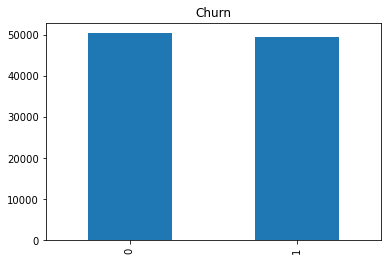

In [9]:
data['churn'].value_counts().plot(kind='bar').set_title('Churn')

#### Insight:
As we can see the target variable "churn" has 50.4 % "0" (zero) class and 49.6% "1" class. By this, we can confidently say the data is well balanced and doesn't require any class imbalance handling techniques like over sampling, under sampling or K fold cross validation

### 4. Checking missing values

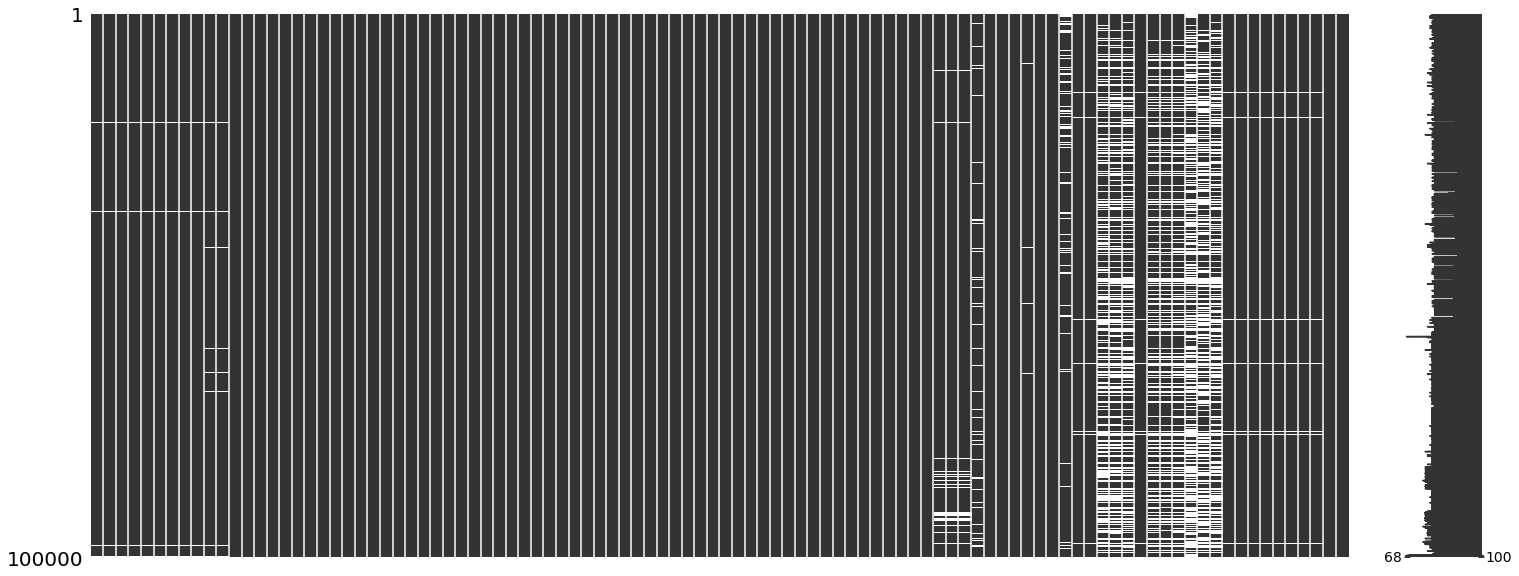

In [10]:
msno.matrix(data,color=(0.20, 0.20, 0.20));

In [11]:
columns_missing_data = data.columns[data.isna().any()].tolist()
len(columns_missing_data)

43

In [12]:
print(columns_missing_data)

['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital', 'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays']


In [13]:
columns_missing_data_df = data[columns_missing_data]
columns_missing_data_df

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0       23.9975    219.25       22.500   0.2475         0.00          0.0   
1       57.4925    482.75       37.425   0.2475        22.75          9.1   
2       16.9900     10.25       16.990   0.0000         0.00          0.0   
3       38.0000      7.50       38.000   0.0000         0.00          0.0   
4       55.2300    570.50       71.980   0.0000         0.00          0.0   
...         ...       ...          ...      ...          ...          ...   
99995       NaN       NaN          NaN      NaN          NaN          NaN   
99996       NaN       NaN          NaN      NaN          NaN          NaN   
99997       NaN       NaN          NaN      NaN          NaN          NaN   
99998       NaN       NaN          NaN      NaN          NaN          NaN   
99999       NaN       NaN          NaN      NaN          NaN          NaN   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  dwllsize  \
0              0.0          0.0        0.0     -157.25  ...         A   
1              9.1          0.0        0.0      532.25  ...         A   
2              0.0          0.0        0.0       -4.25  ...         A   
3              0.0          0.0        0.0       -1.50  ...         D   
4              0.0          0.0        0.0       38.50  ...         O   
...            ...          ...        ...         ...  ...       ...   
99995          NaN          NaN        NaN         NaN  ...         A   
99996          NaN          NaN        NaN         NaN  ...         A   
99997          NaN          NaN        NaN         NaN  ...       NaN   
99998          NaN          NaN        NaN         NaN  ...       NaN   
99999          NaN          NaN        NaN         NaN  ...         A   

       forgntvl  ethnic  kid0_2 kid3_5 kid6_10 kid11_15 kid16_17  creditcd  \
0           0.0       N       U      U       U        U        U         Y   
1           0.0       Z       U      U       U        U        U         Y   
2           0.0       N       U      Y       U        U        U         Y   
3           0.0       U       Y      U       U        U        U         Y   
4           0.0       I       U      U       U        U        U         Y   
...         ...     ...     ...    ...     ...      ...      ...       ...   
99995       0.0       S       U      U       U        Y        U         Y   
99996       0.0       N       U      U       Y        Y        Y         Y   
99997       0.0       U       Y      Y       U        U        U         N   
99998       0.0       S       U      U       U        U        U         N   
99999       0.0       H       U      U       U        U        U         N   

       eqpdays  
0        361.0  
1        240.0  
2       1504.0  
3       1812.0  
4        434.0  
...        ...  
99995    773.0  
99996    835.0  
99997    433.0  
99998     75.0  
99999      5.0  

[100000 rows x 43 columns]

In [14]:
print(columns_missing_data_df.isnull().sum(axis=0).sort_values(ascending=False))

numbcars            49366
dwllsize            38308
HHstatin            37923
ownrent             33706
dwlltype            31909
lor                 30190
income              25436
adults              23019
infobase            22079
hnd_webcap          10189
prizm_social_one     7388
avg6rev              2839
avg6qty              2839
avg6mou              2839
kid16_17             1732
ethnic               1732
creditcd             1732
truck                1732
forgntvl             1732
kid11_15             1732
marital              1732
kid6_10              1732
kid3_5               1732
kid0_2               1732
rv                   1732
change_mou            891
change_rev            891
hnd_price             847
mou_Mean              357
ovrrev_Mean           357
ovrmou_Mean           357
da_Mean               357
totmrc_Mean           357
datovr_Mean           357
vceovr_Mean           357
rev_Mean              357
roam_Mean             357
area                   40
dualband    

#### Insight:
Top 9 columns with missing values has atleast 22% of the data missing. Hence, we are dropping those columns from churn modelling

In [15]:
data.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','infobase'],axis=1,inplace=True)

### 5. Missing value imputation

In [16]:
# splitting categorical columns and numerical columns

cols = data.columns
numeric_cols = data._get_numeric_data().columns
categorical_cols = list(set(cols) - set(numeric_cols))

In [17]:
numeric_cols

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avg

In [18]:
categorical_cols

['new_cell',
 'kid16_17',
 'kid11_15',
 'crclscod',
 'creditcd',
 'hnd_webcap',
 'kid6_10',
 'kid3_5',
 'kid0_2',
 'asl_flag',
 'prizm_social_one',
 'dualband',
 'ethnic',
 'marital',
 'area',
 'refurb_new']

#### Categorical Missing value imputation

In [19]:
data_categorical =data[categorical_cols]

In [20]:
print("Categorical features containing Null:\n")
print(data_categorical.isnull().sum(axis=0).sort_values(ascending=False))

Categorical features containing Null:

hnd_webcap          10189
prizm_social_one     7388
marital              1732
ethnic               1732
kid0_2               1732
kid3_5               1732
kid6_10              1732
creditcd             1732
kid11_15             1732
kid16_17             1732
area                   40
refurb_new              1
dualband                1
asl_flag                0
crclscod                0
new_cell                0
dtype: int64


#### Note: 
As we can see the null values are not much for the categorical features except hnd_webcap (10.2% missing) and prizm_social_one (7.4% missing). Lets explore if we can fill in these categorical variables.

In [21]:
## Checking unique values for each categorical feature
for col in data_categorical.columns:
    print(col, data_categorical[col].unique())

new_cell ['U' 'N' 'Y']
kid16_17 ['U' 'Y' nan]
kid11_15 ['U' 'Y' nan]
crclscod ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
creditcd ['Y' 'N' nan]
hnd_webcap ['WCMB' 'WC' nan 'UNKW']
kid6_10 ['U' 'Y' nan]
kid3_5 ['U' 'Y' nan]
kid0_2 ['U' 'Y' nan]
asl_flag ['N' 'Y']
prizm_social_one ['S' 'U' 'T' 'C' nan 'R']
dualband ['Y' 'N' 'T' 'U' nan]
ethnic ['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' nan 'R' 'B' 'P' 'X' 'C']
marital ['S' 'M' 'A' 'U' 'B' nan]
area ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/V

#### Note:

From the unique values of each features above, we can fill in 'hnd_webcap' as it has class 'UNKW' i.e. unknown. Apart from that all other categorical missing values are hard to determine and impute. For example, features like 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15' and 'kid16_17' are customer centric and can't be imputed. So, we'll drop these records.

In [22]:
## Filling in null values for 'hnd_webcap'
data['hnd_webcap']=data['hnd_webcap'].fillna('UNKW')

#### Numerical Missing value imputation

In [23]:
numeric_cols = data._get_numeric_data().columns
data_numerical = data[numeric_cols]
columns_missing_data = data_numerical.columns[data_numerical.isna().any()].tolist()
data_numerical_missing = data[columns_missing_data]
print("Numerical features containing Null:\n")
print(data_numerical_missing.isnull().sum(axis=0).sort_values(ascending=False))

Numerical features containing Null:

avg6rev        2839
avg6qty        2839
avg6mou        2839
rv             1732
truck          1732
forgntvl       1732
change_rev      891
change_mou      891
hnd_price       847
ovrrev_Mean     357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
rev_Mean        357
vceovr_Mean     357
datovr_Mean     357
roam_Mean       357
phones            1
models            1
eqpdays           1
dtype: int64


As we can see most of the numerical features containing null are having "_Mean" or is a "avg" feature we can do mean imputation to get rid of null values.  

In [24]:
data['avg6rev']=data['avg6rev'].fillna(data['avg6rev'].mean())
data['avg6qty']=data['avg6qty'].fillna(data['avg6qty'].mean())
data['avg6mou']=data['avg6mou'].fillna(data['avg6mou'].mean())
data['change_mou']=data['change_mou'].fillna(data['change_mou'].mean())
data['change_rev']=data['change_rev'].fillna(data['change_rev'].mean())
data['rev_Mean']=data['rev_Mean'].fillna(data['rev_Mean'].mean())
data['totmrc_Mean']=data['totmrc_Mean'].fillna(data['totmrc_Mean'].mean())
data['da_Mean']=data['da_Mean'].fillna(data['da_Mean'].mean())
data['ovrmou_Mean']=data['ovrmou_Mean'].fillna(data['ovrmou_Mean'].mean())
data['ovrrev_Mean']=data['ovrrev_Mean'].fillna(data['ovrrev_Mean'].mean())
data['vceovr_Mean']=data['vceovr_Mean'].fillna(data['vceovr_Mean'].mean())
data['mou_Mean']=data['mou_Mean'].fillna(data['mou_Mean'].mean())
data['datovr_Mean']=data['datovr_Mean'].fillna(data['datovr_Mean'].mean())
data['roam_Mean']=data['roam_Mean'].fillna(data['roam_Mean'].mean())

We can now drop all the records which were not able to impute and get a cleaner set of the data

In [25]:
data.dropna(inplace=True)

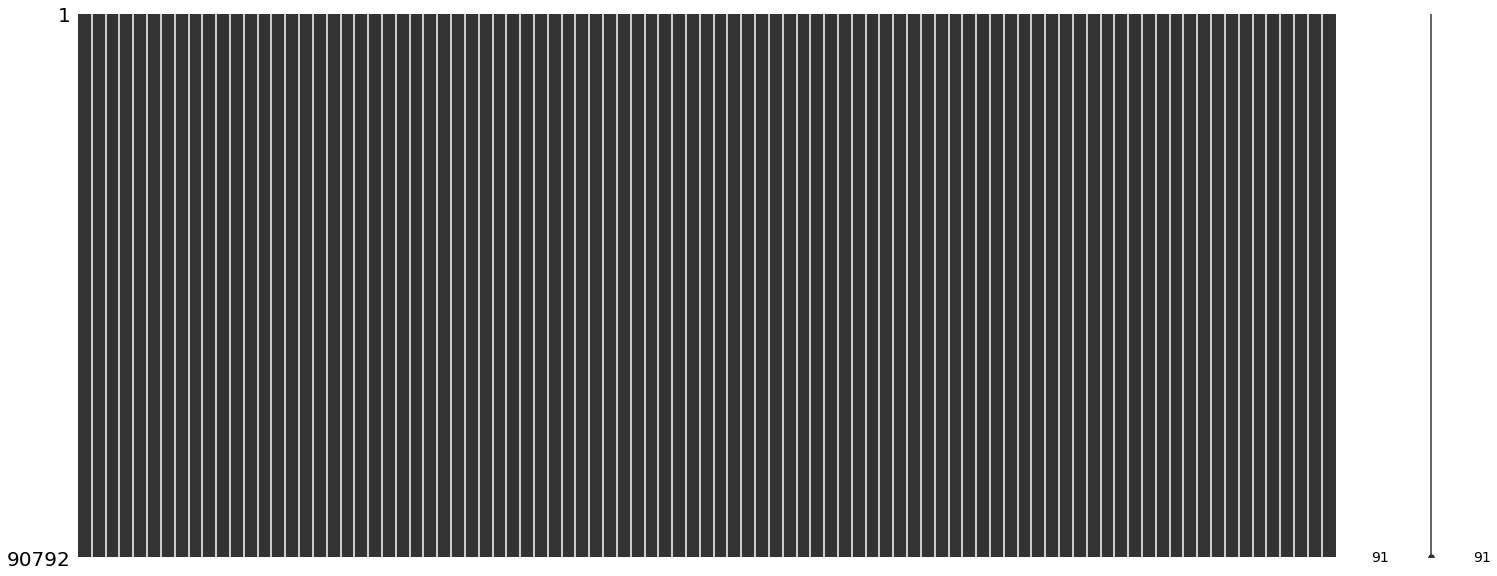

In [26]:
msno.matrix(data,color=(0.20, 0.20, 0.20));

In [27]:
data.shape

(90792, 91)

##### Note:
After cleaning the data, from the above chart we can see theres are 90792 rows and 91 columns with no missing values left.

In [28]:
#rechecking target class imbalance

data['churn'].value_counts()

0    45833
1    44959
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn')

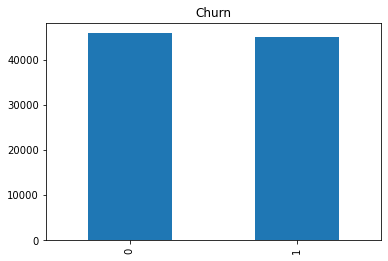

In [29]:
data['churn'].value_counts().plot(kind='bar').set_title('Churn')

#### Insight:
As we can see the target variable "churn" still has 50.5 % "0" (zero) class and 49.5% "1" ("churned customers") class even after dropping the null records. By this, we can confidently say the data is well balanced and doesn't require any class imbalance handling techniques like over sampling, under sampling or K fold cross validation

### 6. Exploratory data analysis

In [30]:
# As Customer_ID is unique - therefore it does not provides us information we need for Churn modelling.
data.drop(["Customer_ID"], axis = 1, inplace=True)

#### Categorical Feature vs Churn

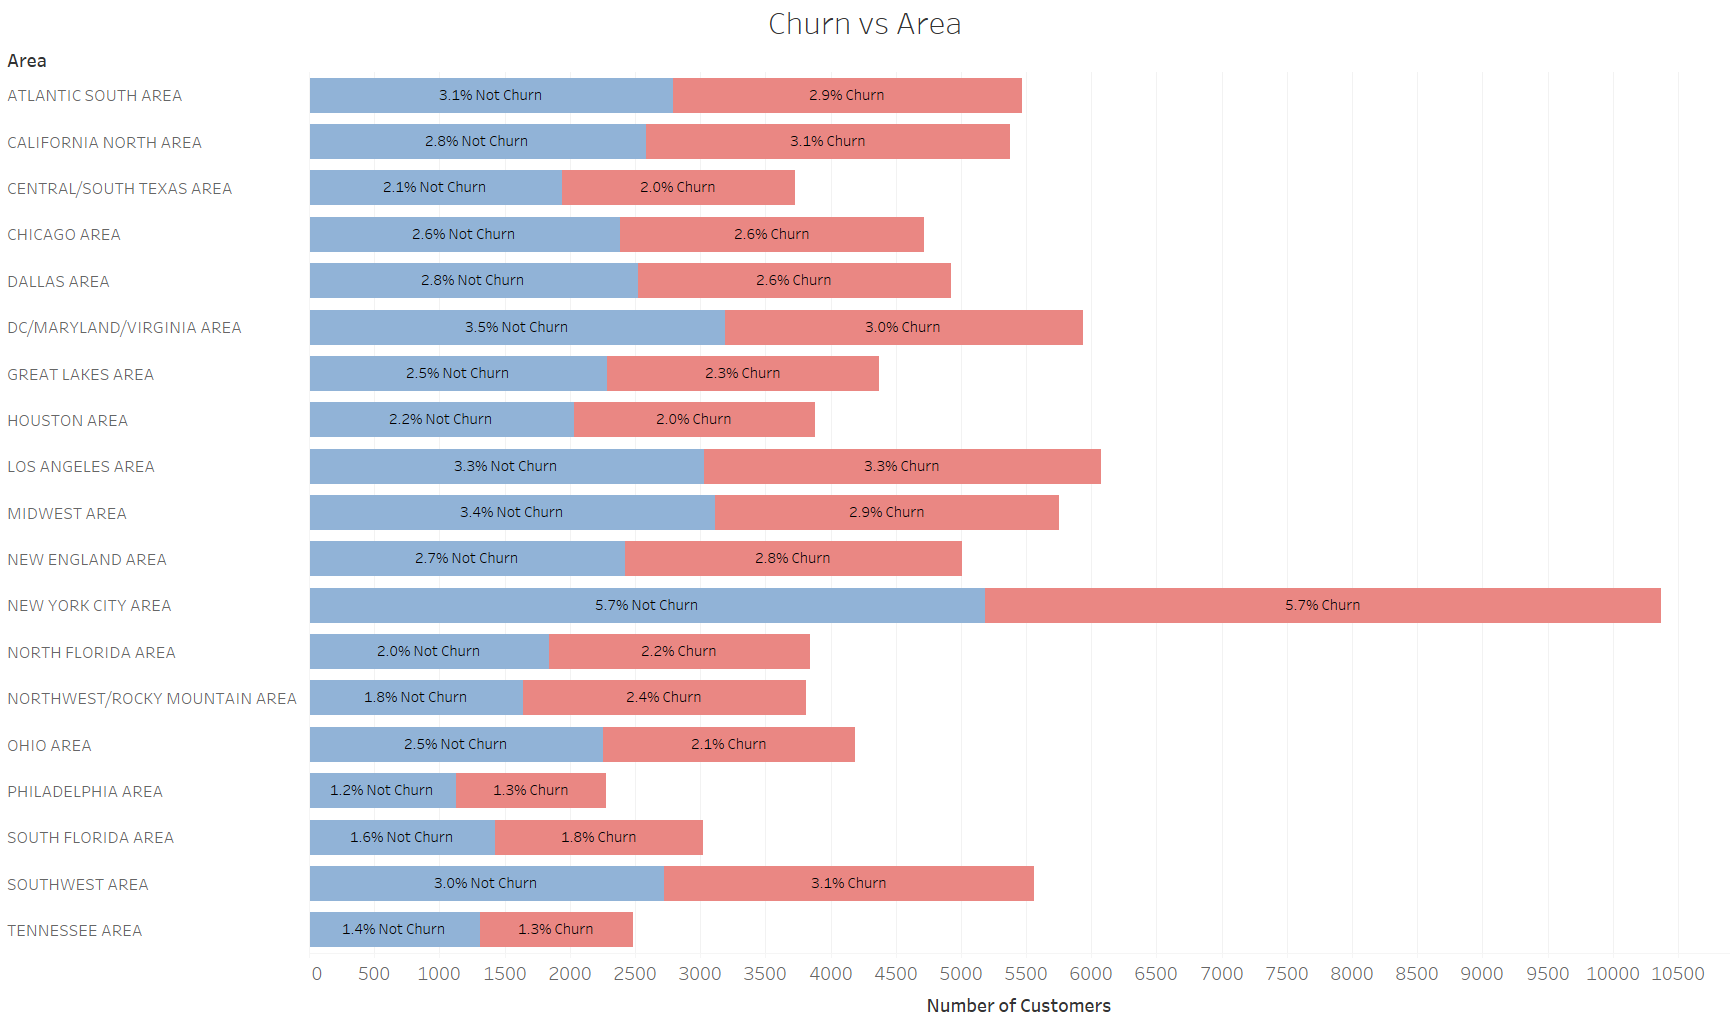

#### Insight (Churn vs Area):

- Newyork city area holds majority of the customers and has equal churn and not churn (retention) rate.
- Area that has significant churn rate than retention are Los Angeles, New york city, DC/Maryland/Virginia, California and Soutwest.

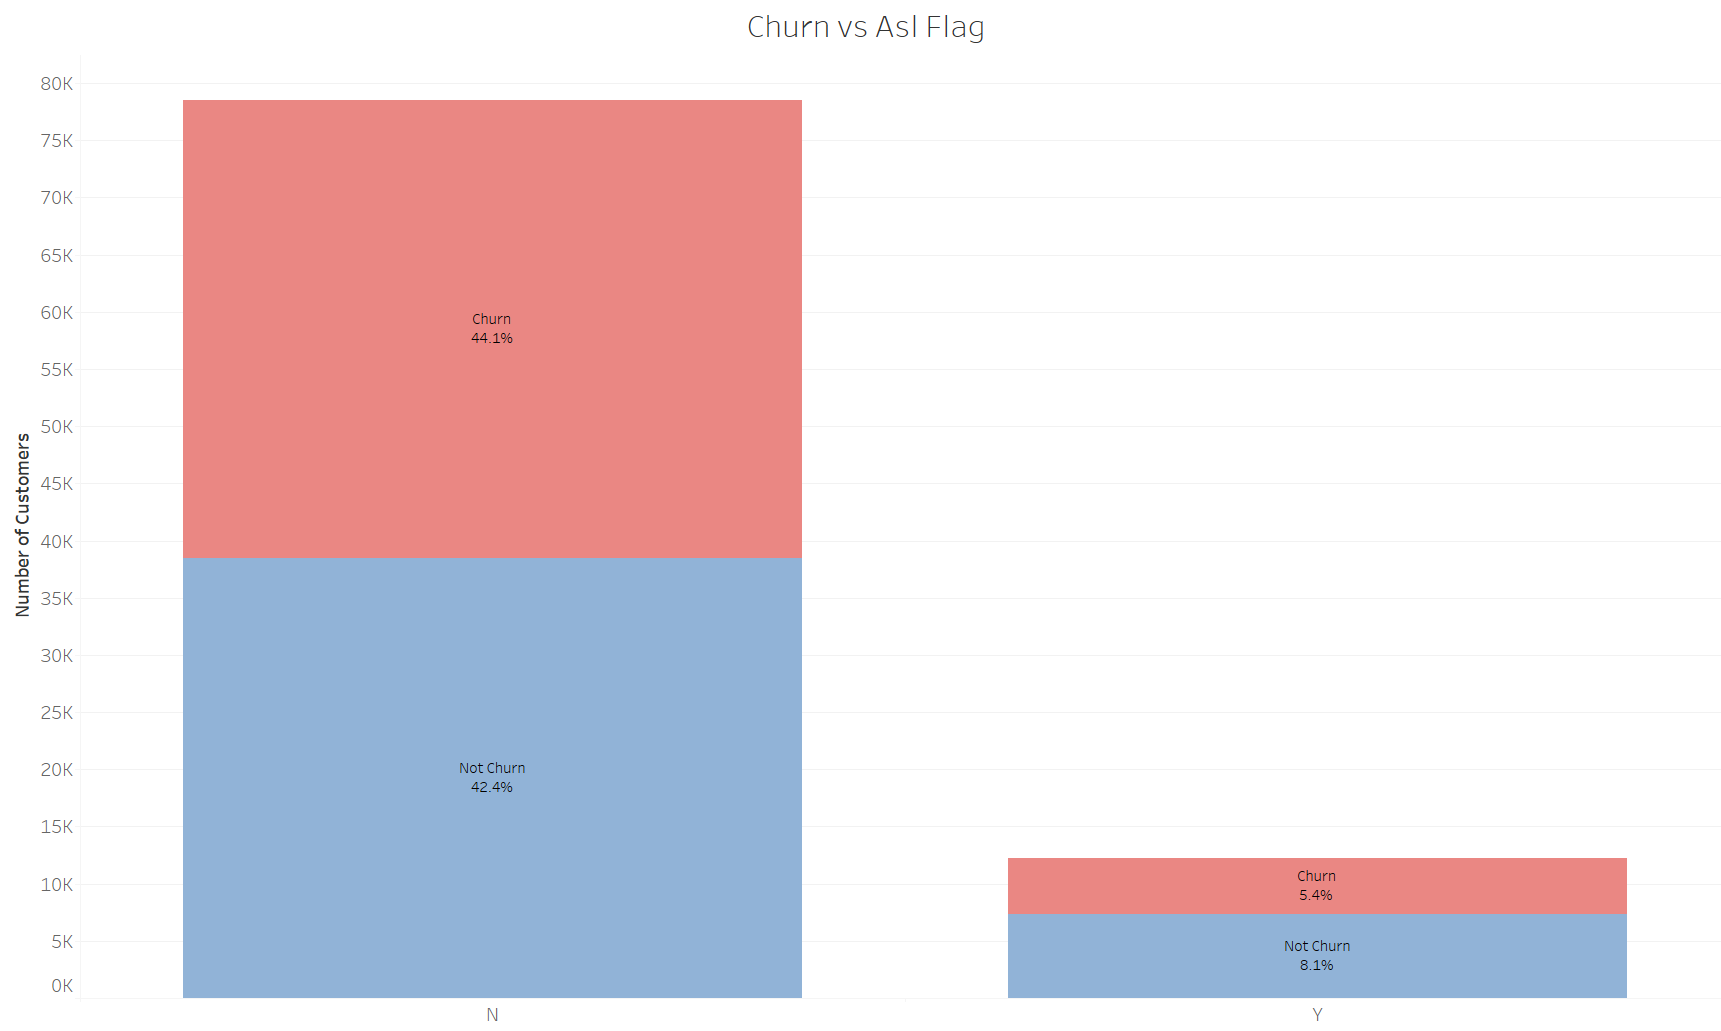

#### Insight (Chrun vs Asl Flag (account spending limit flag)):

-  "N" class holds 86.5% of the customers which dont have account spending limit flag. Of this 86.5% customers 44.1% have churned.
- "Y" class holds only 13.5% of the customers and 5.4% of these have chured.

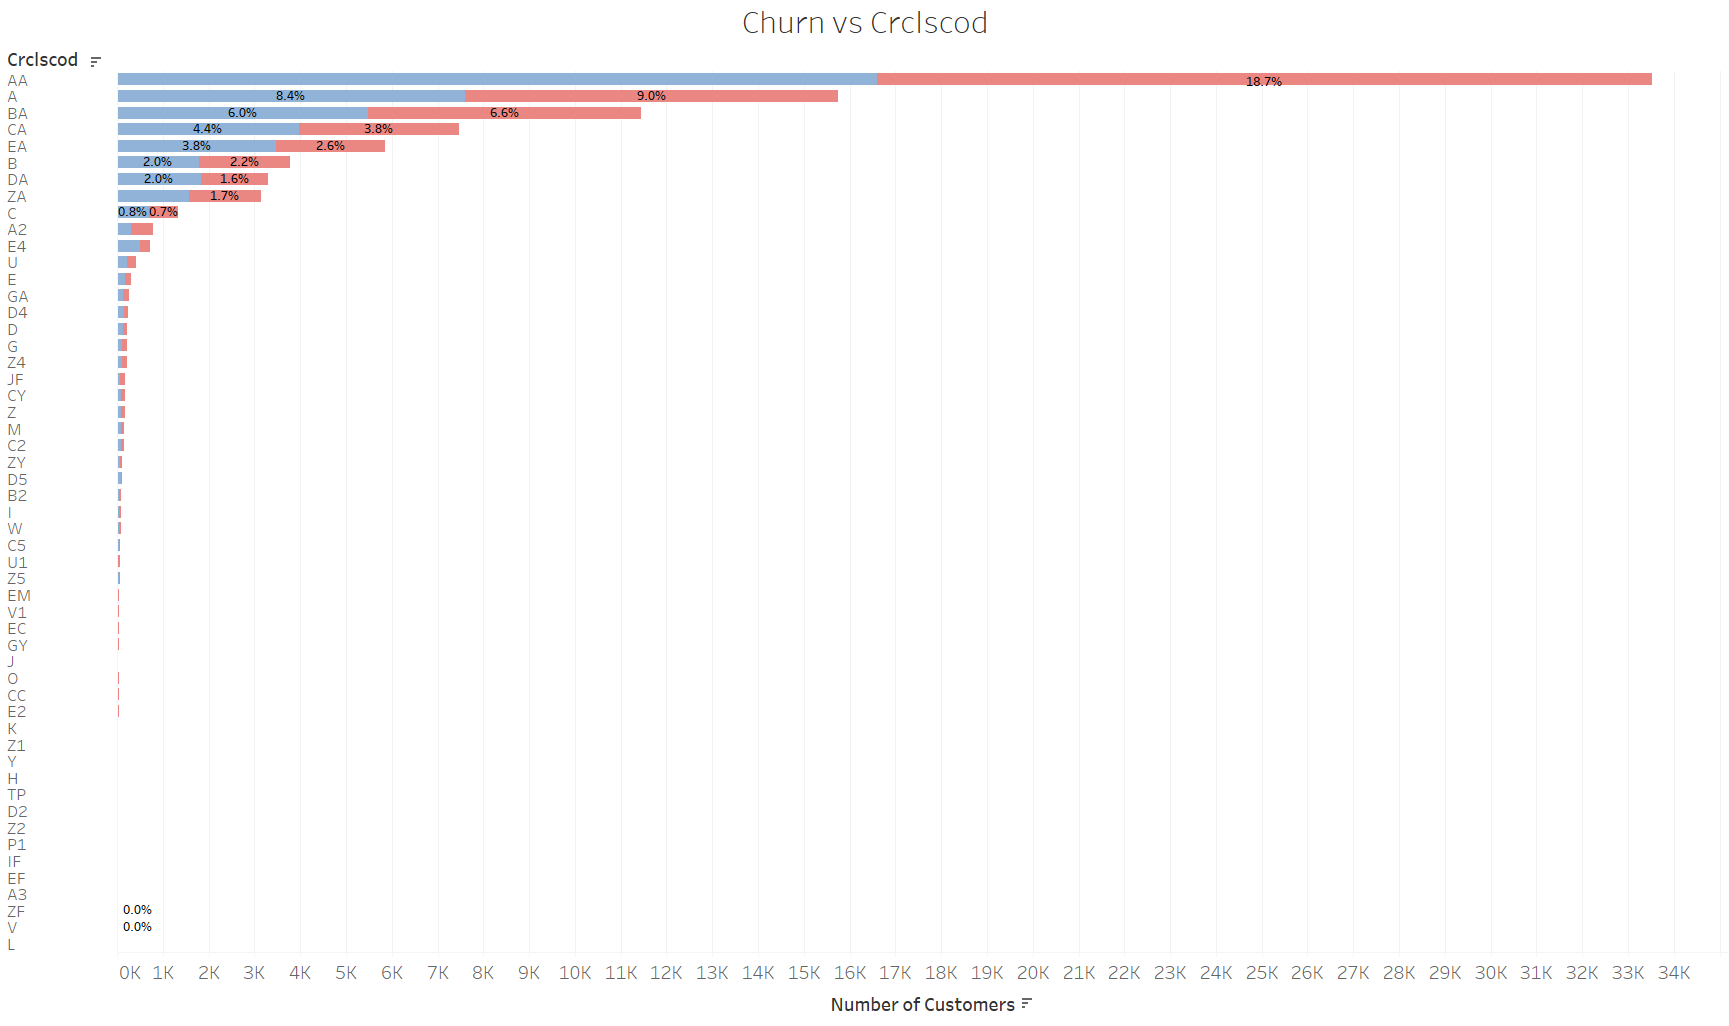

#### Insight (Chrun vs Crclscod):

-  Top 10 classes holds more than 90% of the customers. Of this approximately 43% customers have churned.

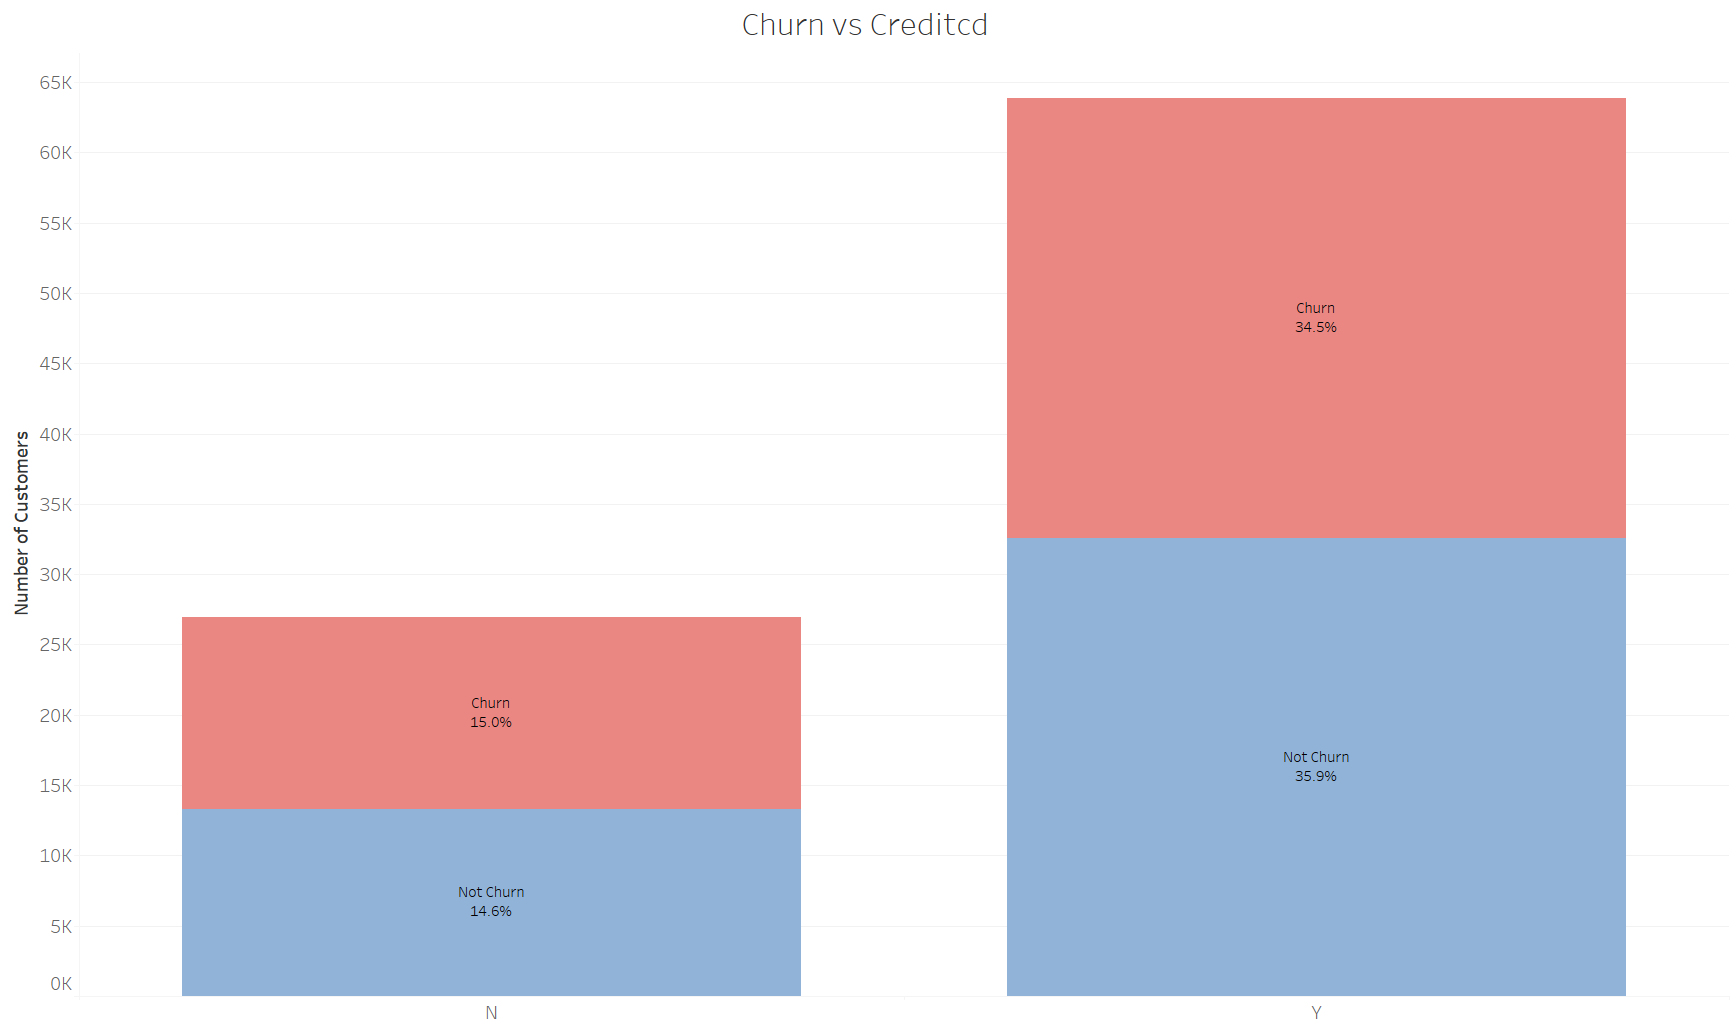

#### Insight (Chrun vs Creditcd):

-  "N" class holds 29.6% of the customers which dont have credit cards. Of these, 15% customers have churned.
- "Y" class holds 70.4% of the customers and of these, 34.5% of these have chured.
- So it can be said, customers havinf credit cards are more likely to churn.

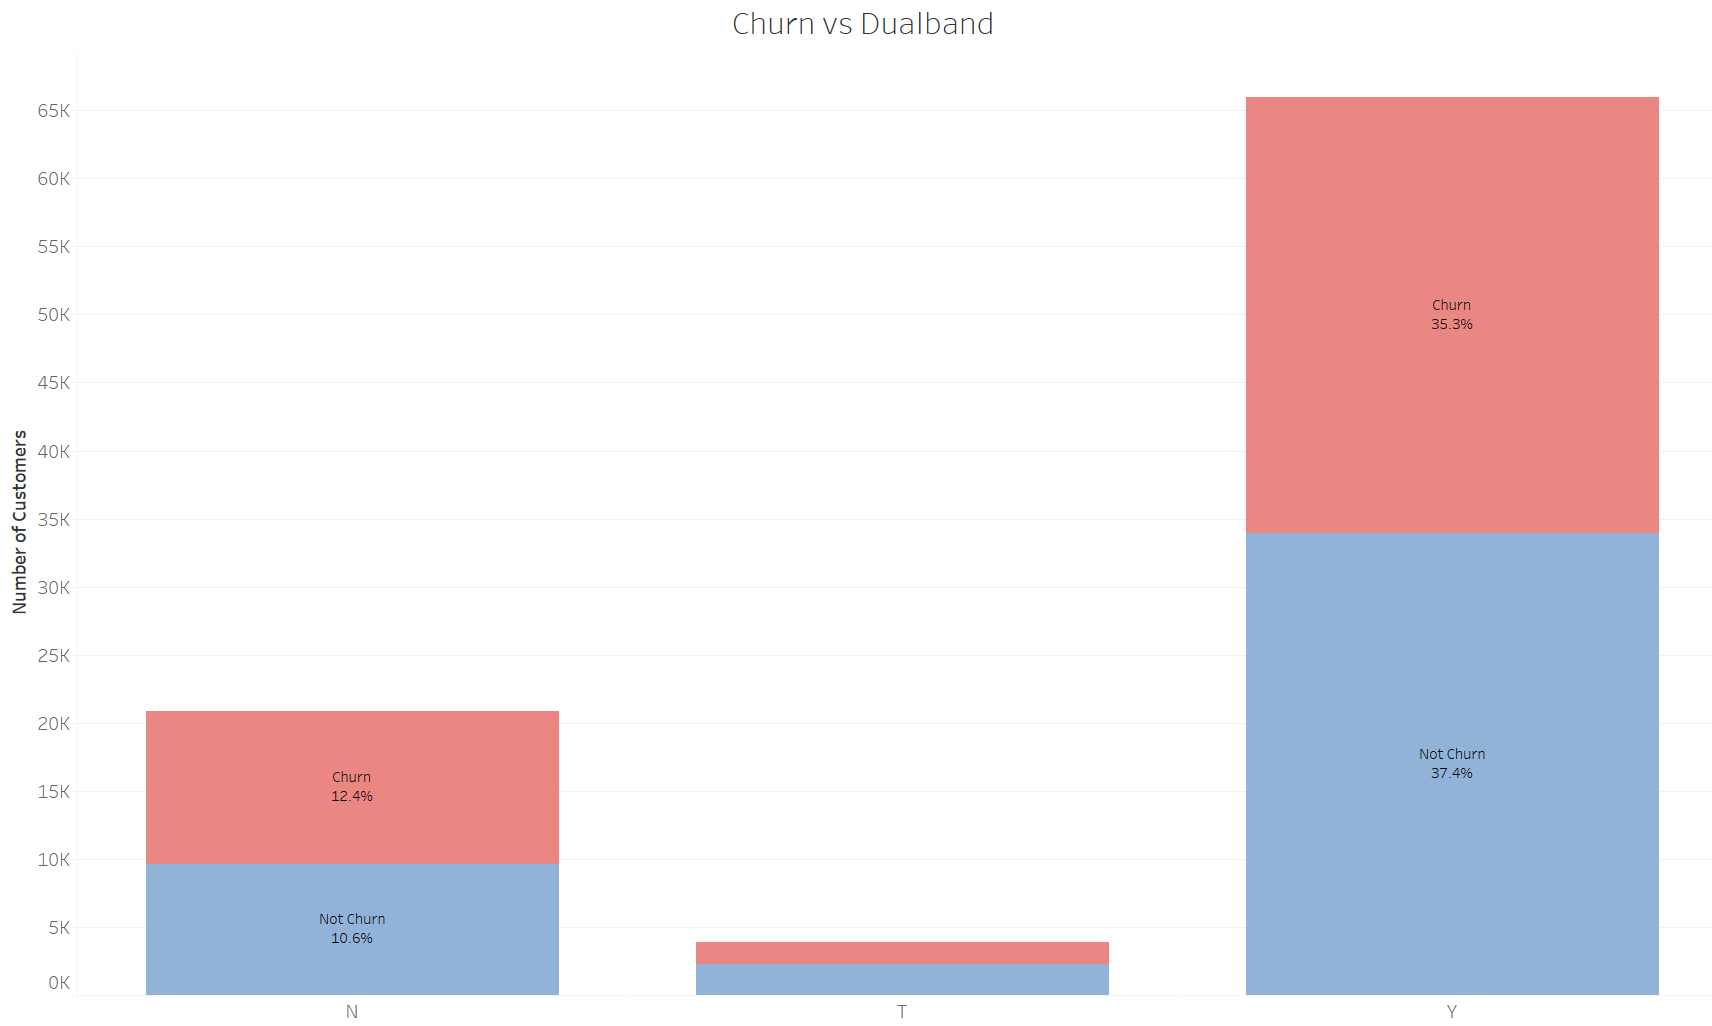

#### Insight (Chrun vs Daul baand):

-  "N" class holds 23% of the customers which dont have dual band. Of which 12.4% customers have churned.
- "Y" class holds marjority with 72.7% of the customers that have dual band. 35.3% are likely to churn if they have dual band.

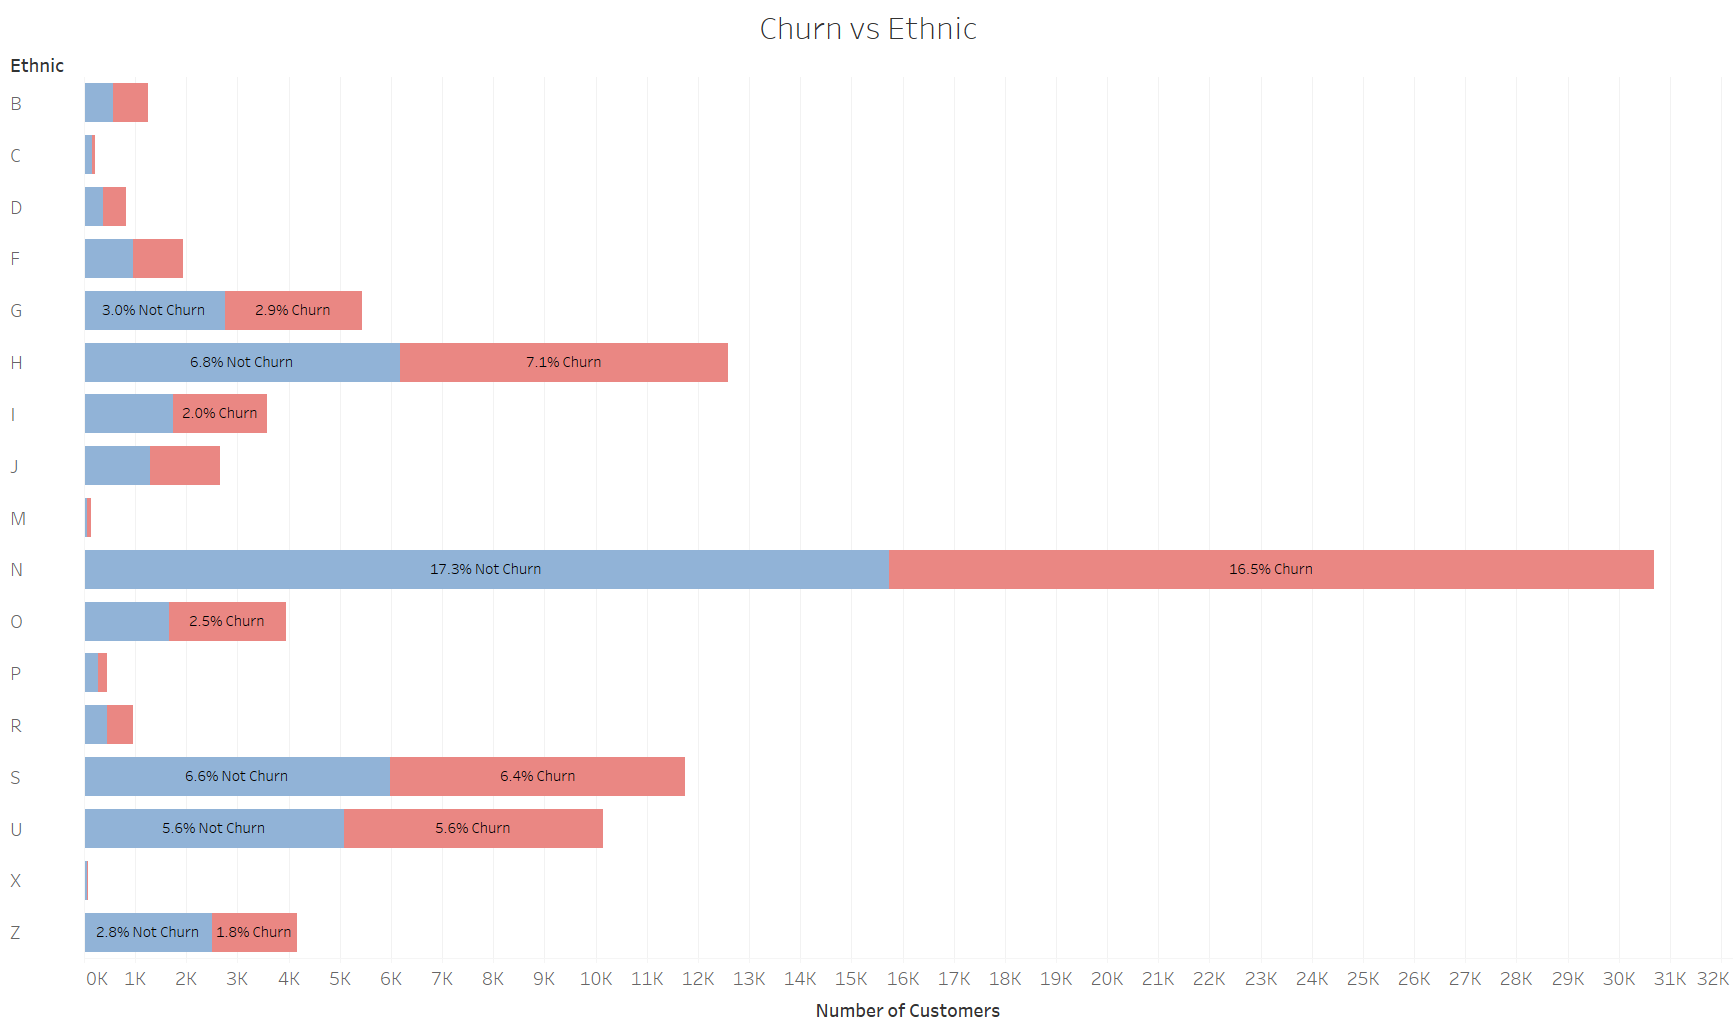

#### Insight (Chrun vs Ethnic):

- Class H(13.9%), N(33.8%), S(13%) and U(11.2%) holds majority of the customers
- Of these top 4 classes, Customers of Ethnic class N tends to have more churn rate comparatively.

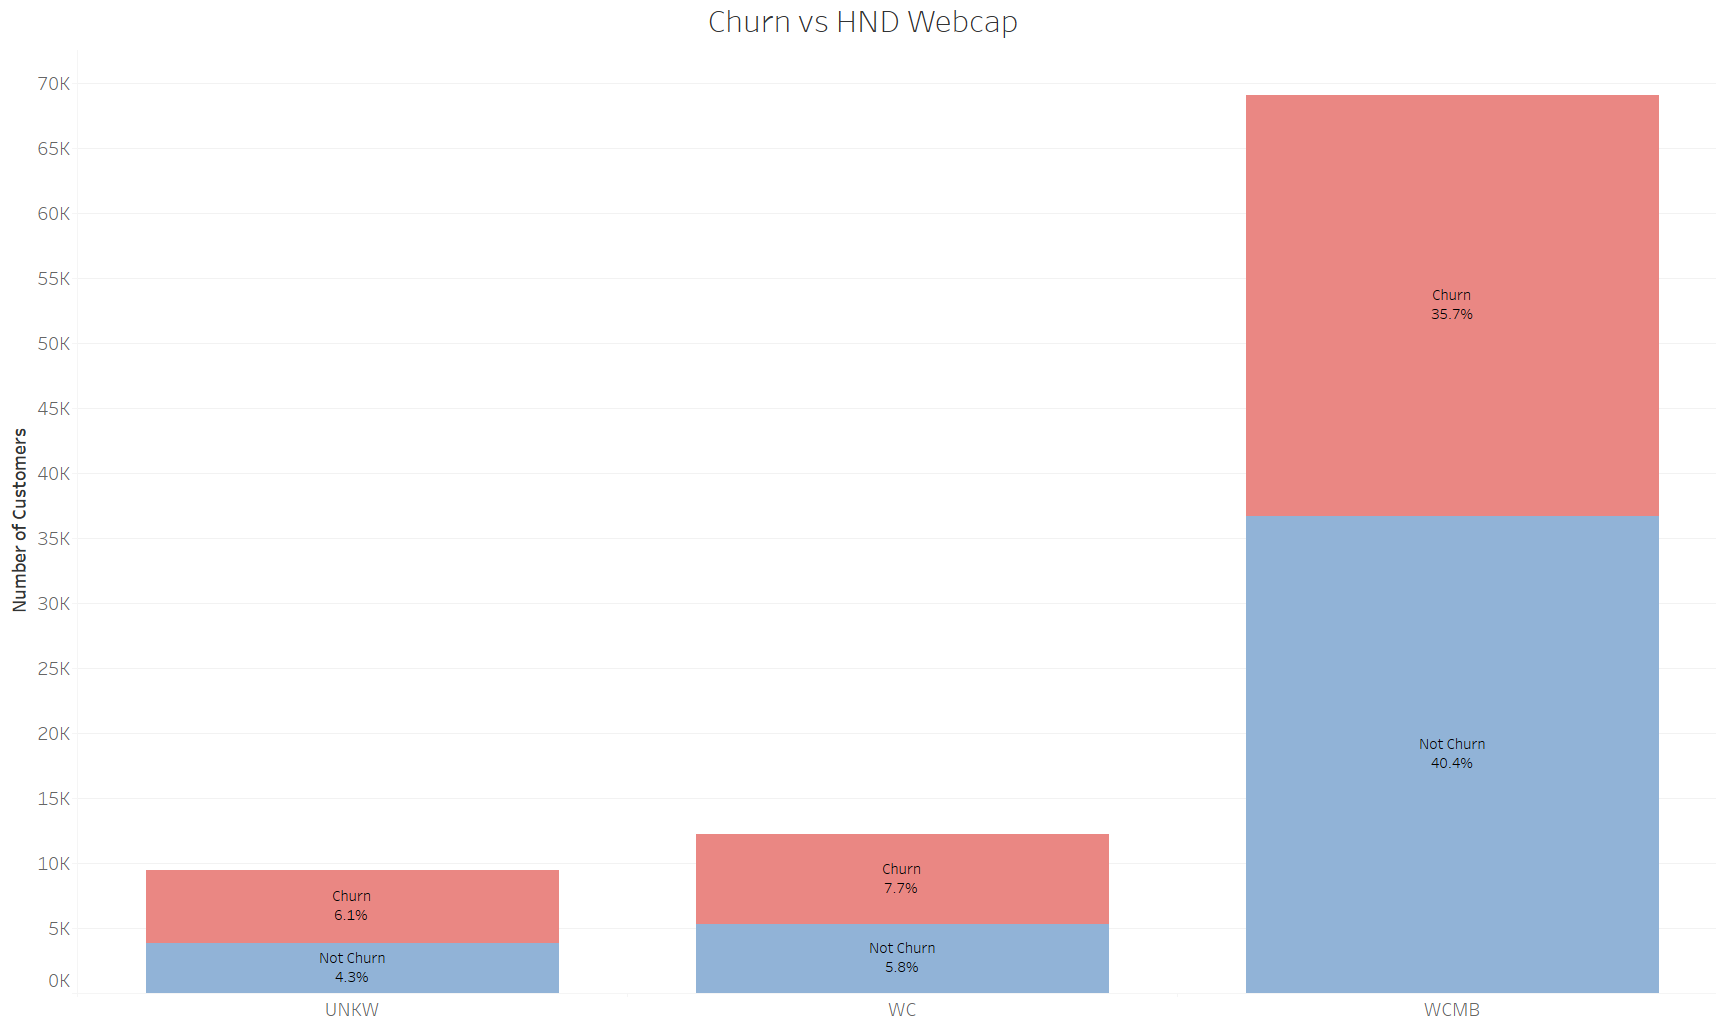

#### Insight (Chrun vs HND Webcap (Current handset price)):

- Class WCMB accounts for majority of 76.1% of the customers of which 35.7% have churned.

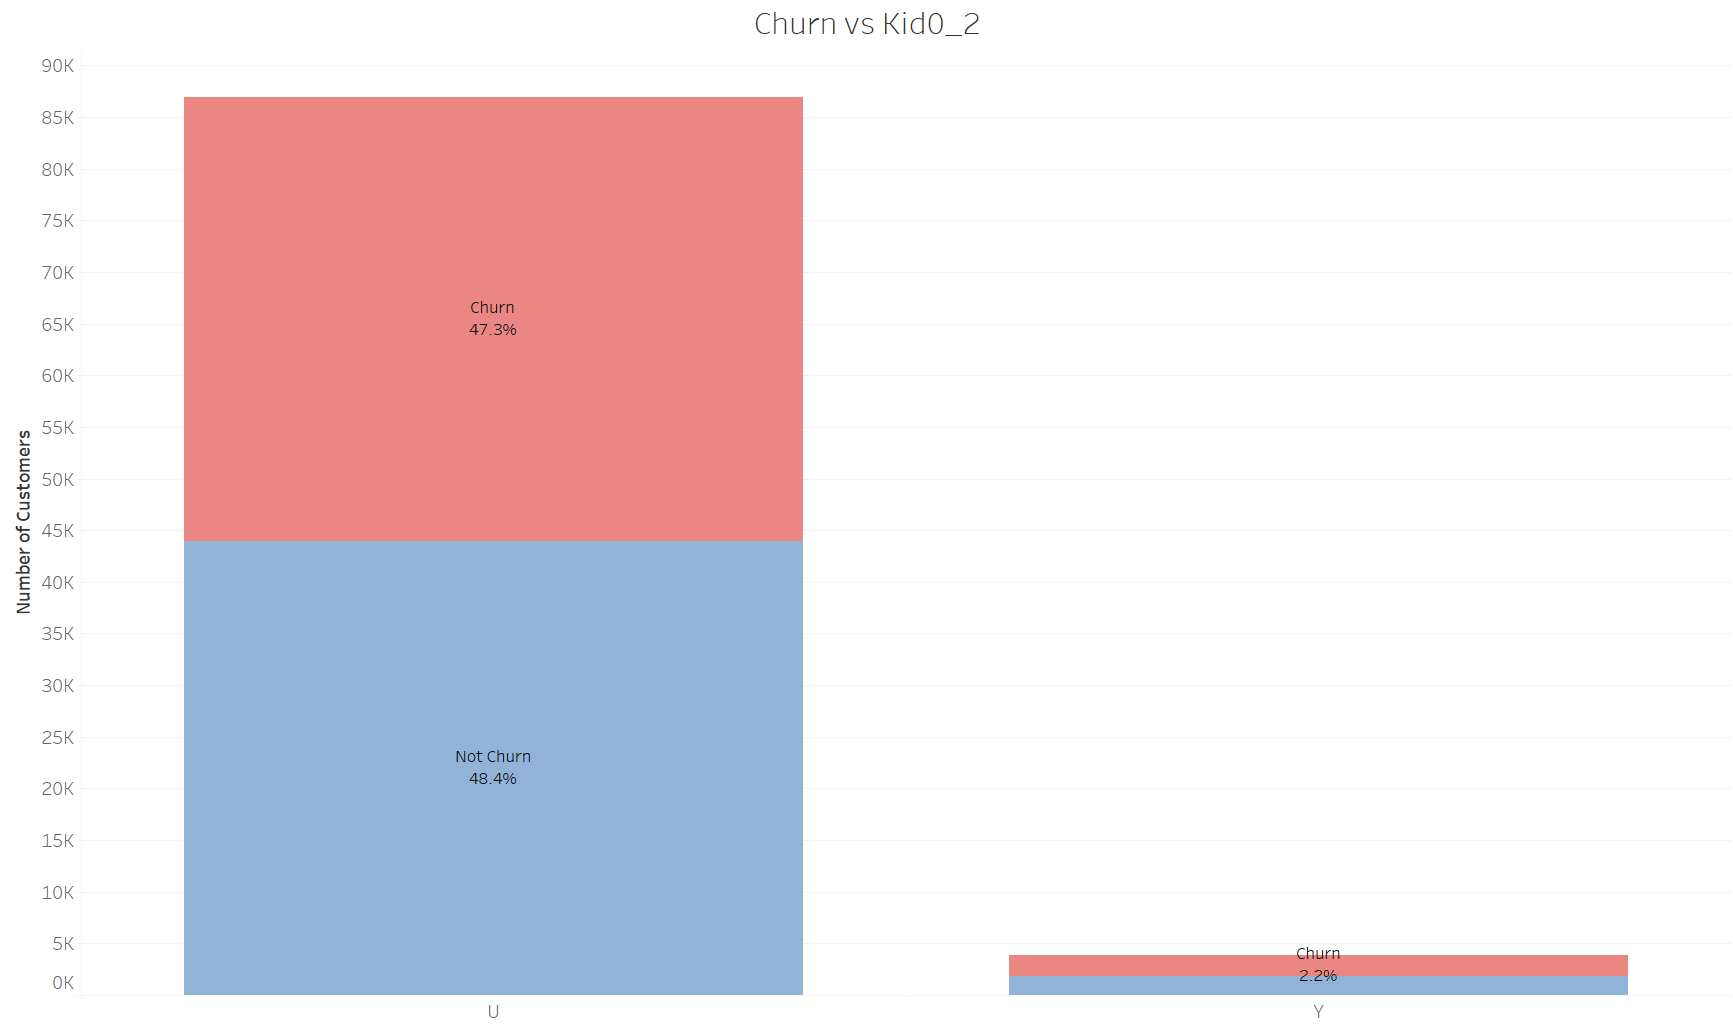

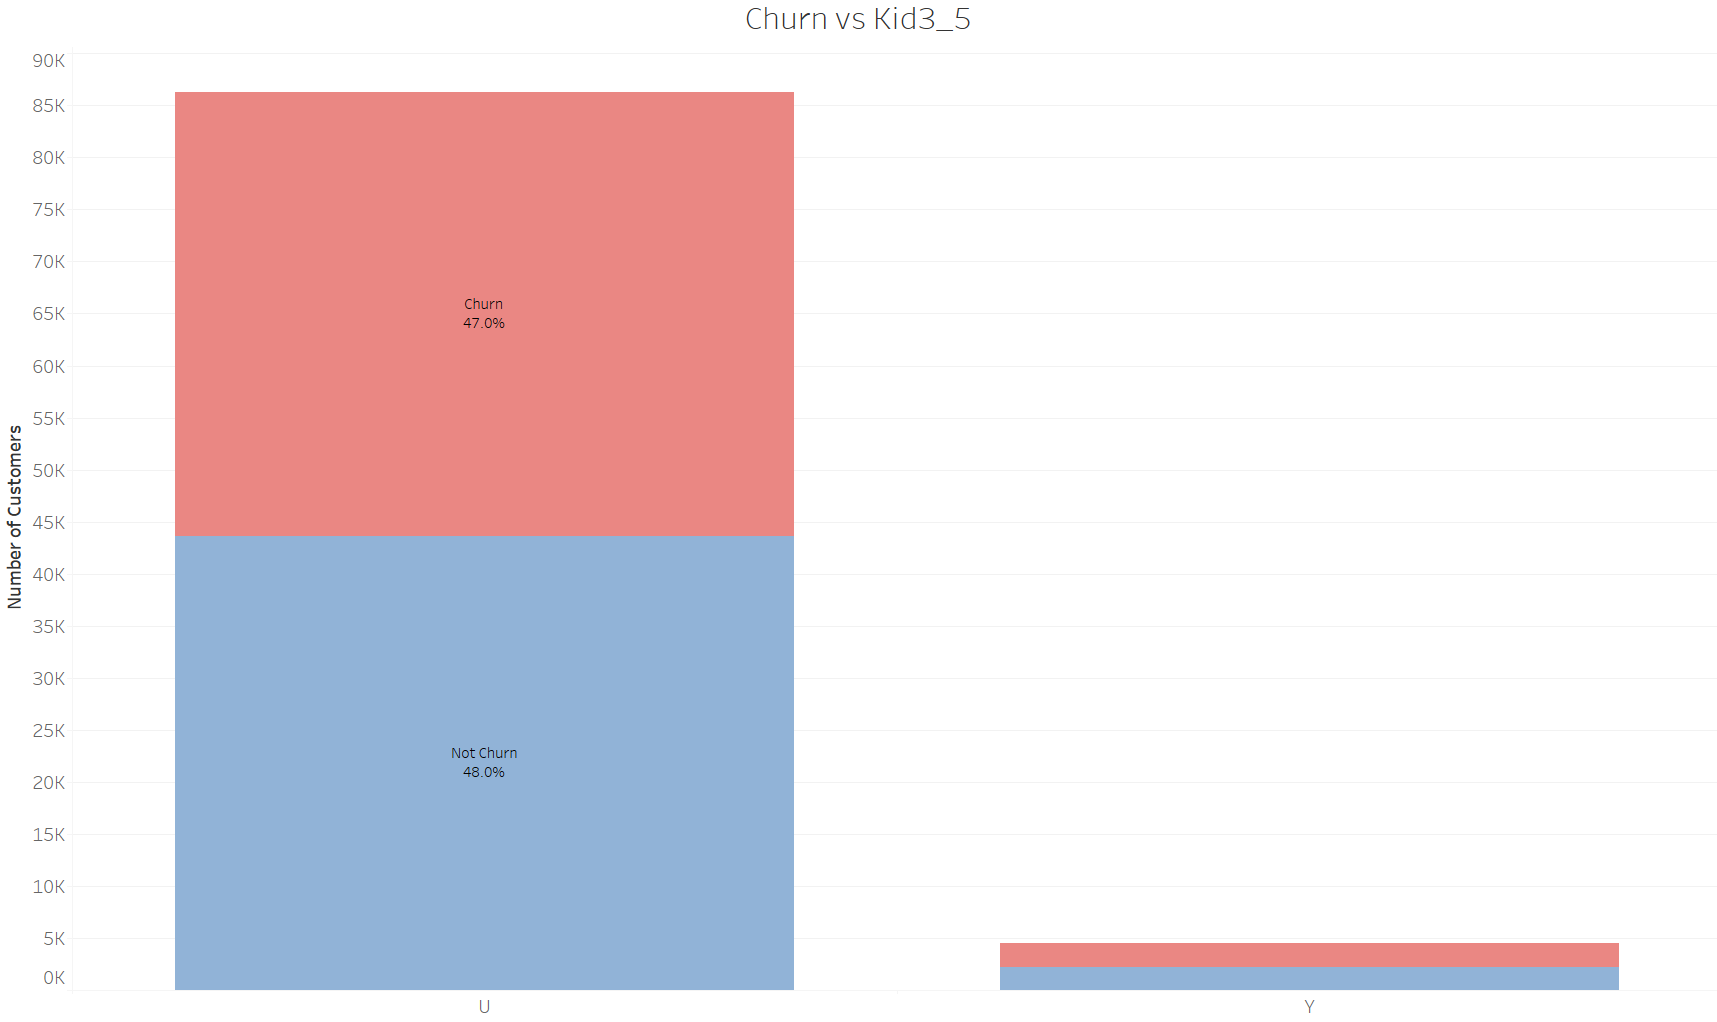

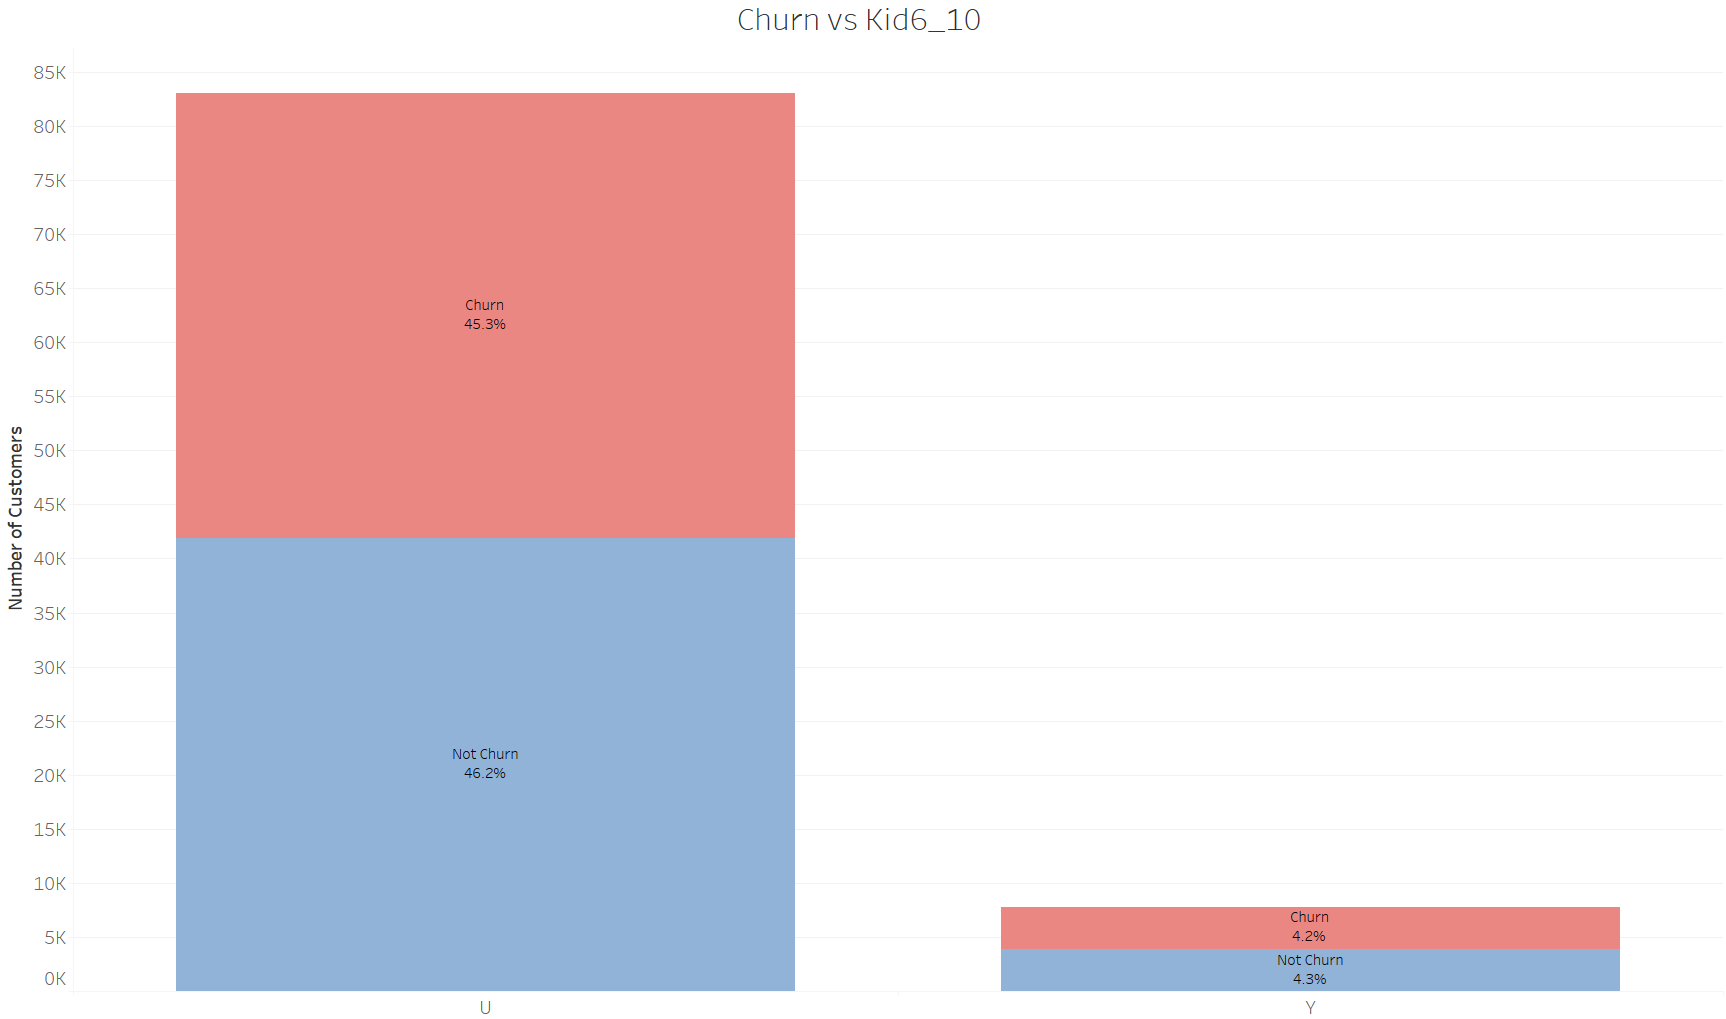

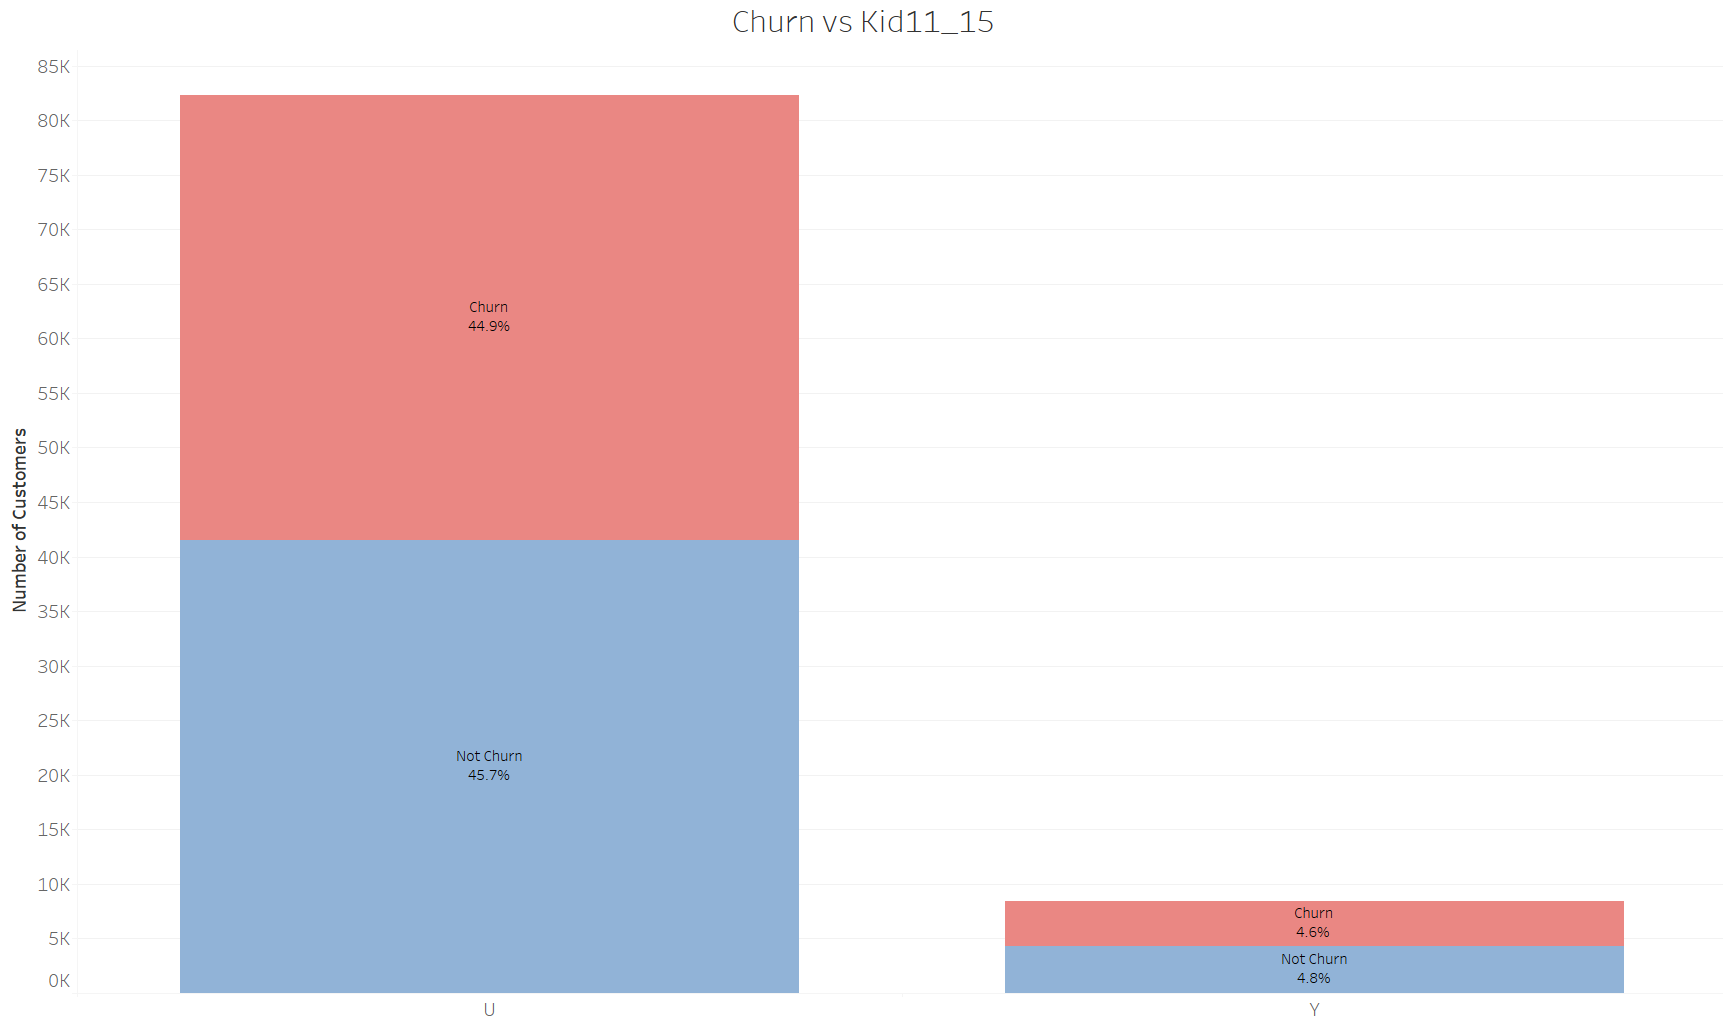

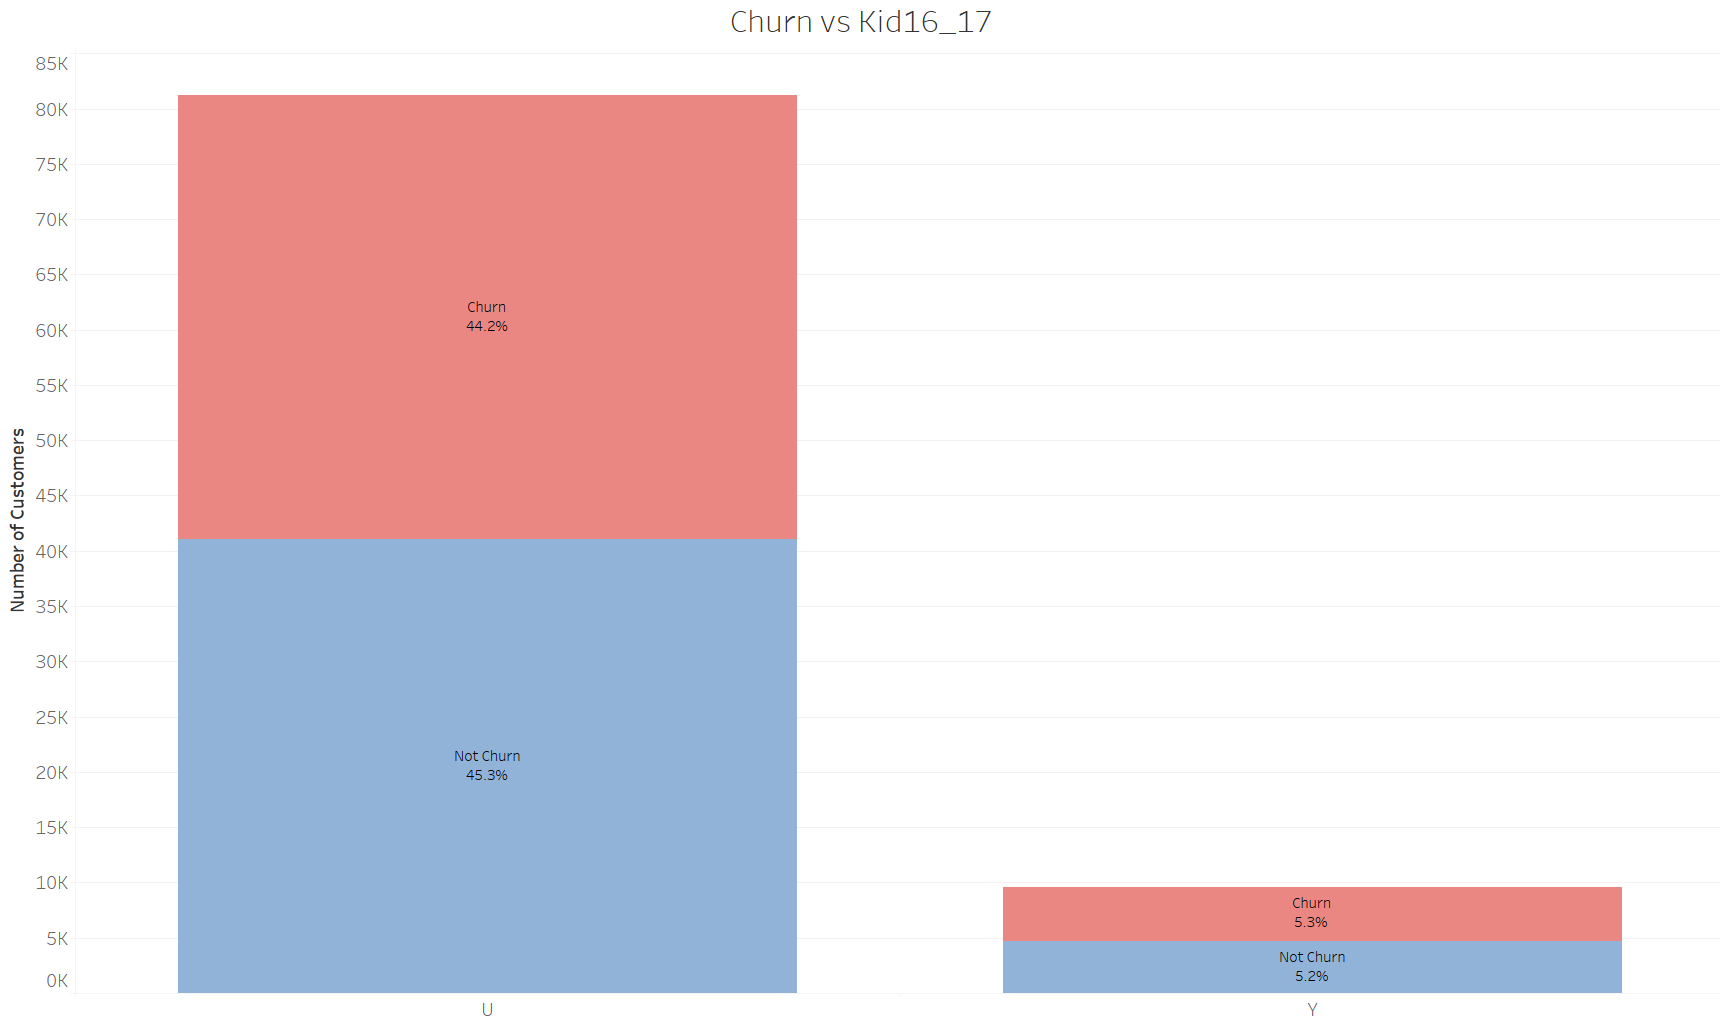

#### Insight (Chrun vs All Kid features):

- All the kid related features Kid0_2, Kid3_5, Kid6_10, Kid11_15 and Kid16_17 have significant "U" customer then "Y" which means cutomer that have kids are low.
- Also the churn rate for both the clasess U and Y is nearly equal to retention rate.

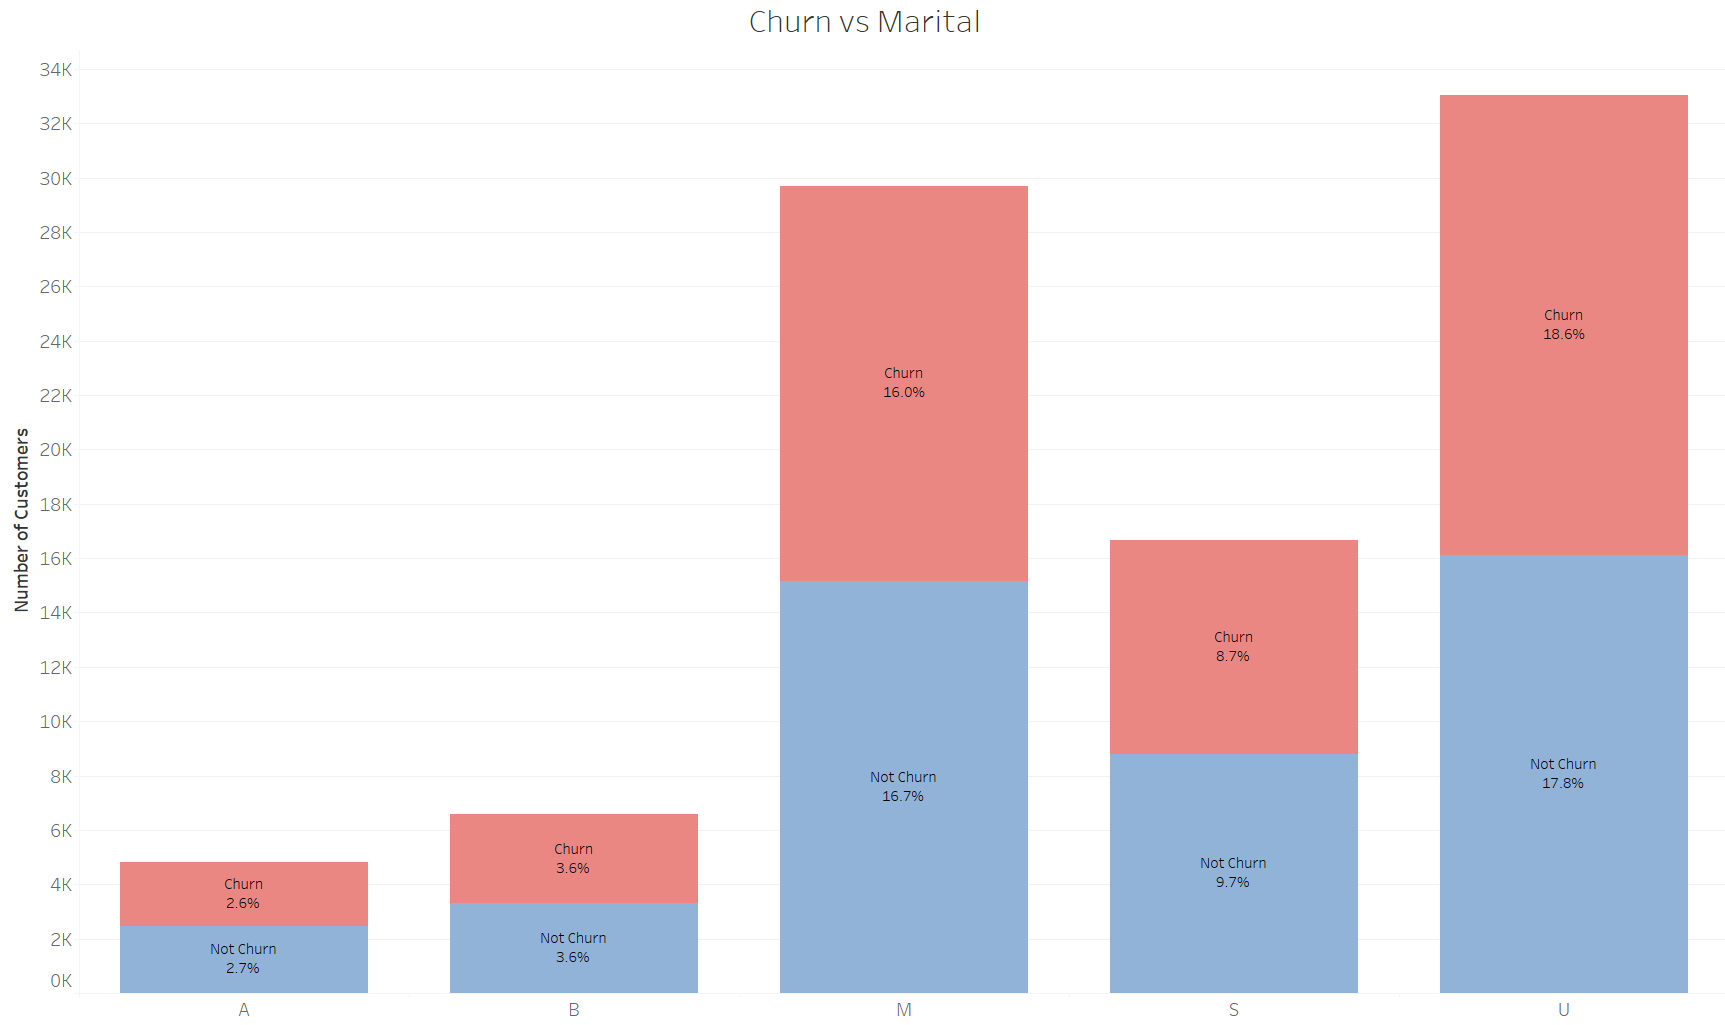

#### Insight (Chrun vs Marital):

- Class M i.e. married customers acconts for 32.7% of the total customers, of these 16% have churned.
- Class U accouts for 37.2% of the customers and have 18.6% churn rate.
- Class S i.e. single customers have more retention rate than churn.

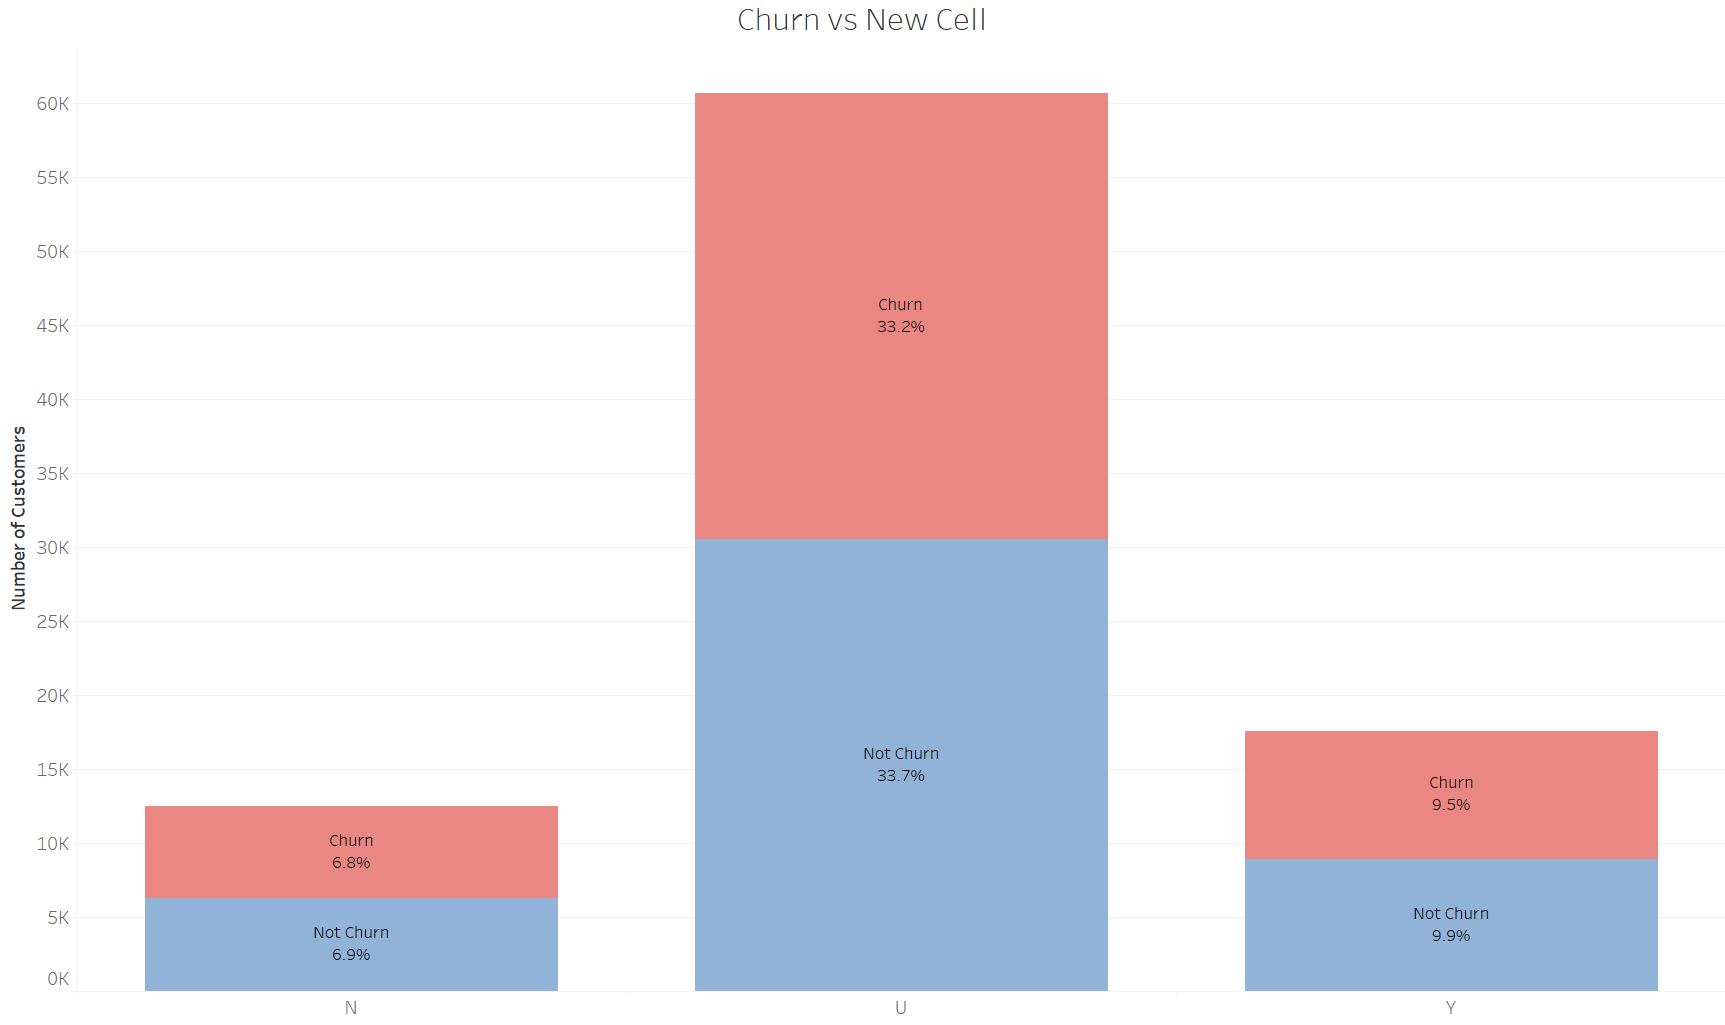

#### Insight (Chrun vs New Cell):

- Class U holds the majority of customers i.e. 66.9% and of these 33.2% have churned.
- CLass N & Y has near similar churn and retention rates.

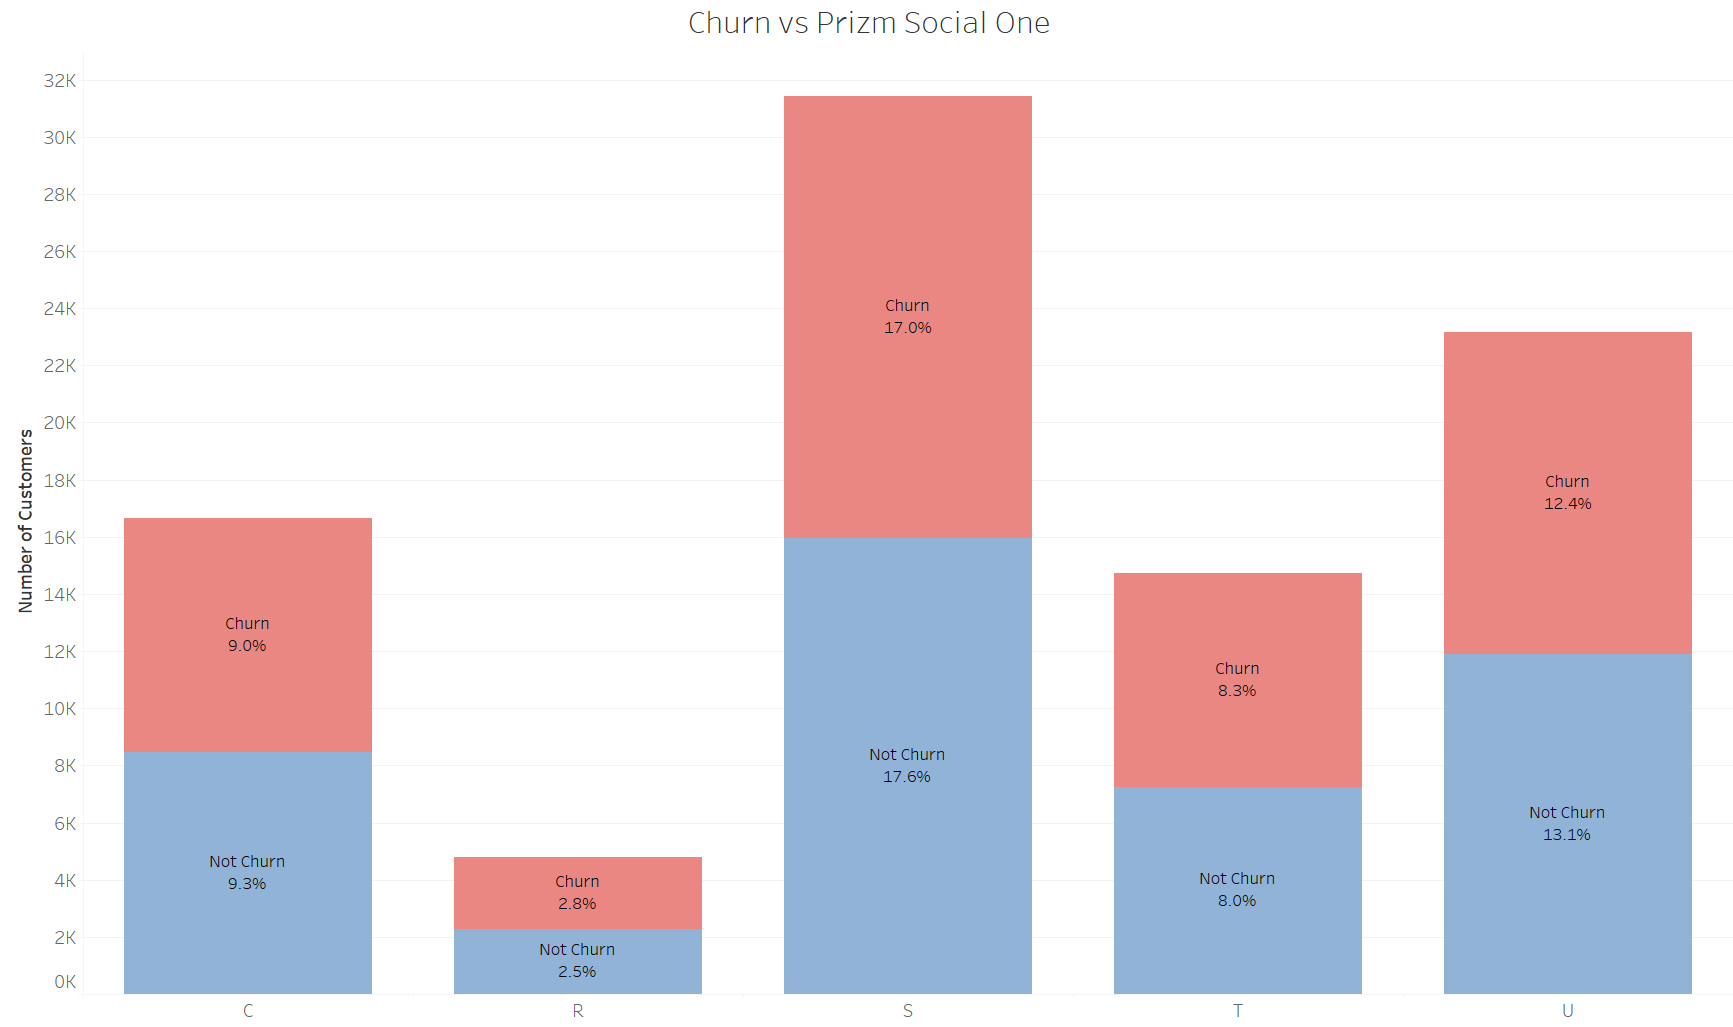

#### Insight (Chrun vs Prizm Social One):

- Class S accounts for majority of 34.6% of the customers of which 17% have churned.
- Class U holds 25.5% of the customers, of which 12.4% have churned.
- Clss C, R and T have near similar churn rate and retention rate.

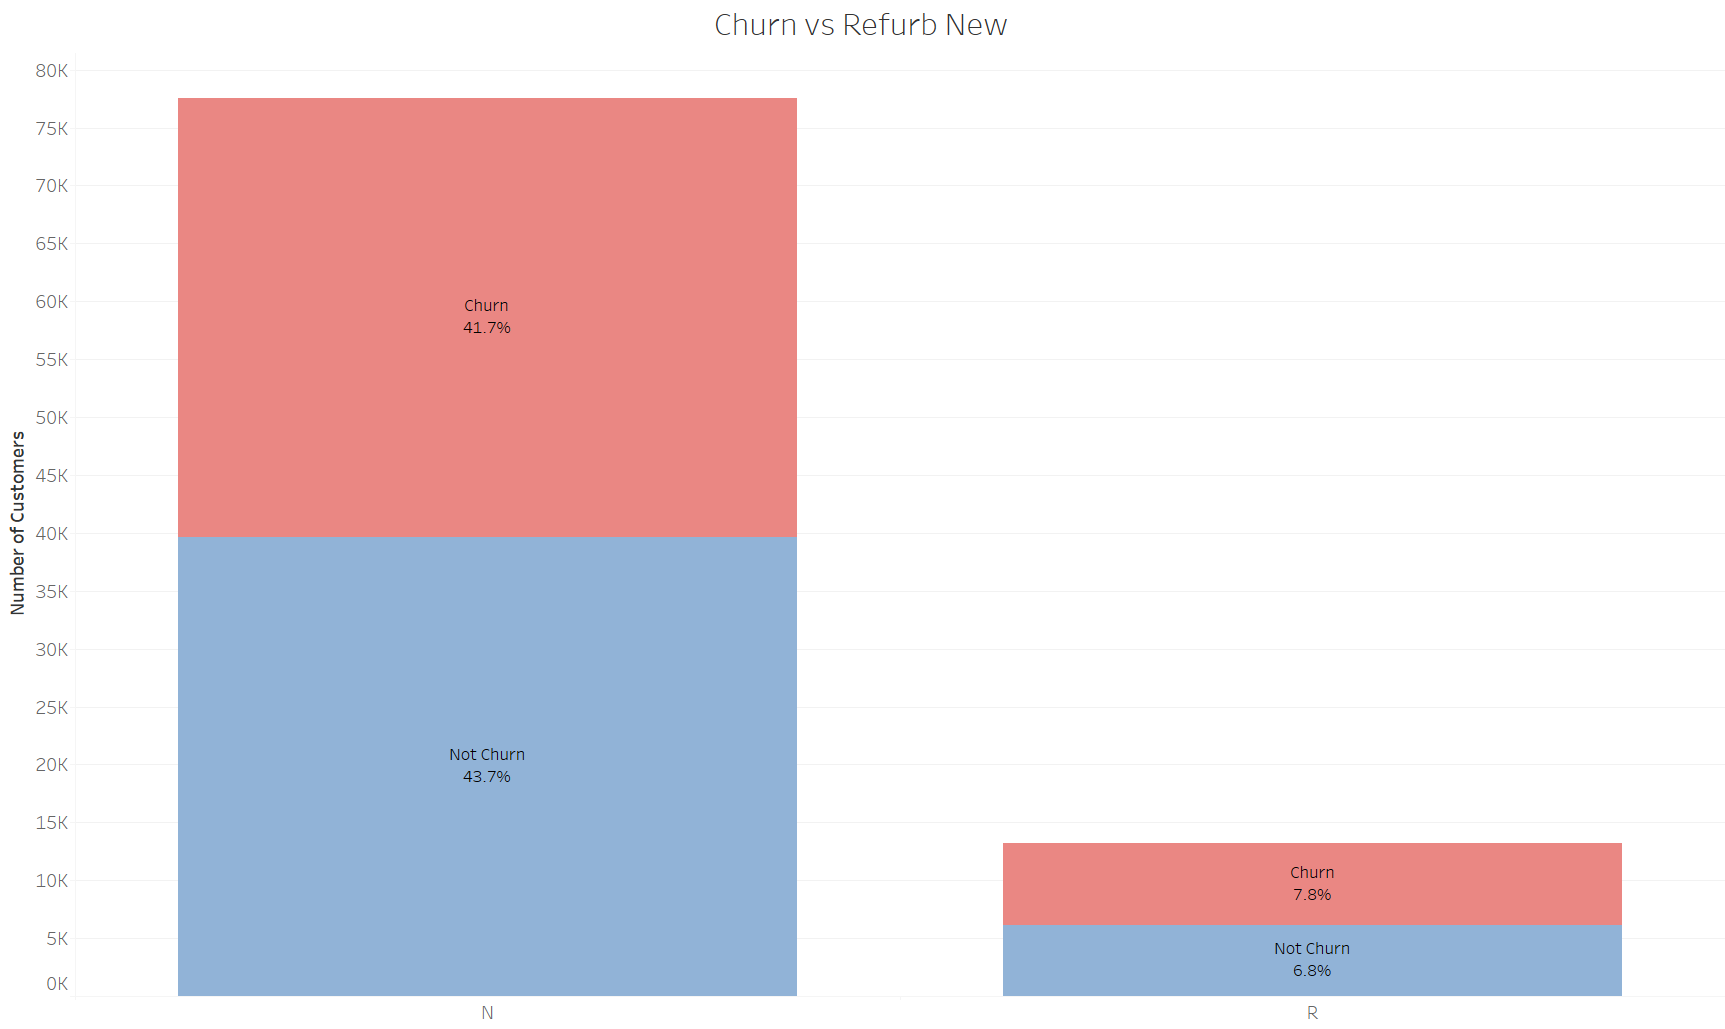

#### Insight (Chrun vs Refurb New (Refurbised or New device)):

- Here we can clearly see that customers with New device (class "N") accounts for most customers with a churn rate of 41.7%.

#### Numerical Features EDA

In [31]:
data.corr()

rev_Mean  mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
rev_Mean     1.000000  0.706083     0.600203  0.403015     0.768169   
mou_Mean     0.706083  1.000000     0.576423  0.395682     0.575162   
totmrc_Mean  0.600203  0.576423     1.000000  0.307359     0.201025   
da_Mean      0.403015  0.395682     0.307359  1.000000     0.305478   
ovrmou_Mean  0.768169  0.575162     0.201025  0.305478     1.000000   
...               ...       ...          ...       ...          ...   
models       0.224799  0.287468     0.217509  0.157295     0.142287   
truck       -0.034091 -0.052728    -0.034322 -0.031875    -0.023023   
rv          -0.008965 -0.025665    -0.015302 -0.006965    -0.002932   
forgntvl    -0.037406 -0.051039    -0.034806 -0.021269    -0.025622   
eqpdays     -0.212007 -0.314682    -0.247204 -0.118925    -0.128295   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
rev_Mean        0.772620     0.768208     0.154673   0.383761    0.086531   
mou_Mean        0.541269     0.539720     0.093448   0.126673   -0.006936   
totmrc_Mean     0.165208     0.163726     0.037740   0.043327   -0.022392   
da_Mean         0.274843     0.274821     0.039639   0.042706   -0.022525   
ovrmou_Mean     0.955712     0.953009     0.165103   0.038283   -0.008599   
...                  ...          ...          ...        ...         ...   
models          0.119670     0.118026     0.033266   0.015043   -0.004743   
truck          -0.028478    -0.027982    -0.008753   0.003328    0.006080   
rv             -0.006637    -0.006457    -0.002568   0.003017    0.006819   
forgntvl       -0.026745    -0.026964    -0.001604  -0.004933    0.005966   
eqpdays        -0.135732    -0.132253    -0.053380  -0.020875   -0.006135   

             ...   avg6mou   avg6qty   avg6rev  hnd_price    phones    models  \
rev_Mean     ...  0.619927  0.569025  0.840220   0.169240  0.226413  0.224799   
mou_Mean     ...  0.928554  0.813602  0.681382   0.232797  0.292249  0.287468   
totmrc_Mean  ...  0.571517  0.513613  0.656454   0.225733  0.220989  0.217509   
da_Mean      ...  0.370664  0.378129  0.406785   0.090172  0.164650  0.157295   
ovrmou_Mean  ...  0.484485  0.451508  0.634799   0.086686  0.142234  0.142287   
...          ...       ...       ...       ...        ...       ...       ...   
models       ...  0.300360  0.360387  0.258308   0.173594  0.890688  1.000000   
truck        ... -0.055700 -0.034378 -0.041365  -0.053016  0.002113  0.003068   
rv           ... -0.029799 -0.017765 -0.014564  -0.012578  0.003904  0.008409   
forgntvl     ... -0.055120 -0.055602 -0.043733  -0.017141 -0.009983 -0.010574   
eqpdays      ... -0.318187 -0.306601 -0.230548  -0.478635 -0.356578 -0.378542   

                truck        rv  forgntvl   eqpdays  
rev_Mean    -0.034091 -0.008965 -0.037406 -0.212007  
mou_Mean    -0.052728 -0.025665 -0.051039 -0.314682  
totmrc_Mean -0.034322 -0.015302 -0.034806 -0.247204  
da_Mean     -0.031875 -0.006965 -0.021269 -0.118925  
ovrmou_Mean -0.023023 -0.002932 -0.025622 -0.128295  
...               ...       ...       ...       ...  
models       0.003068  0.008409 -0.010574 -0.378542  
truck        1.000000  0.619616  0.037935  0.042823  
rv           0.619616  1.000000  0.045738  0.030969  
forgntvl     0.037935  0.045738  1.000000  0.045132  
eqpdays      0.042823  0.030969  0.045132  1.000000  

[74 rows x 74 columns]

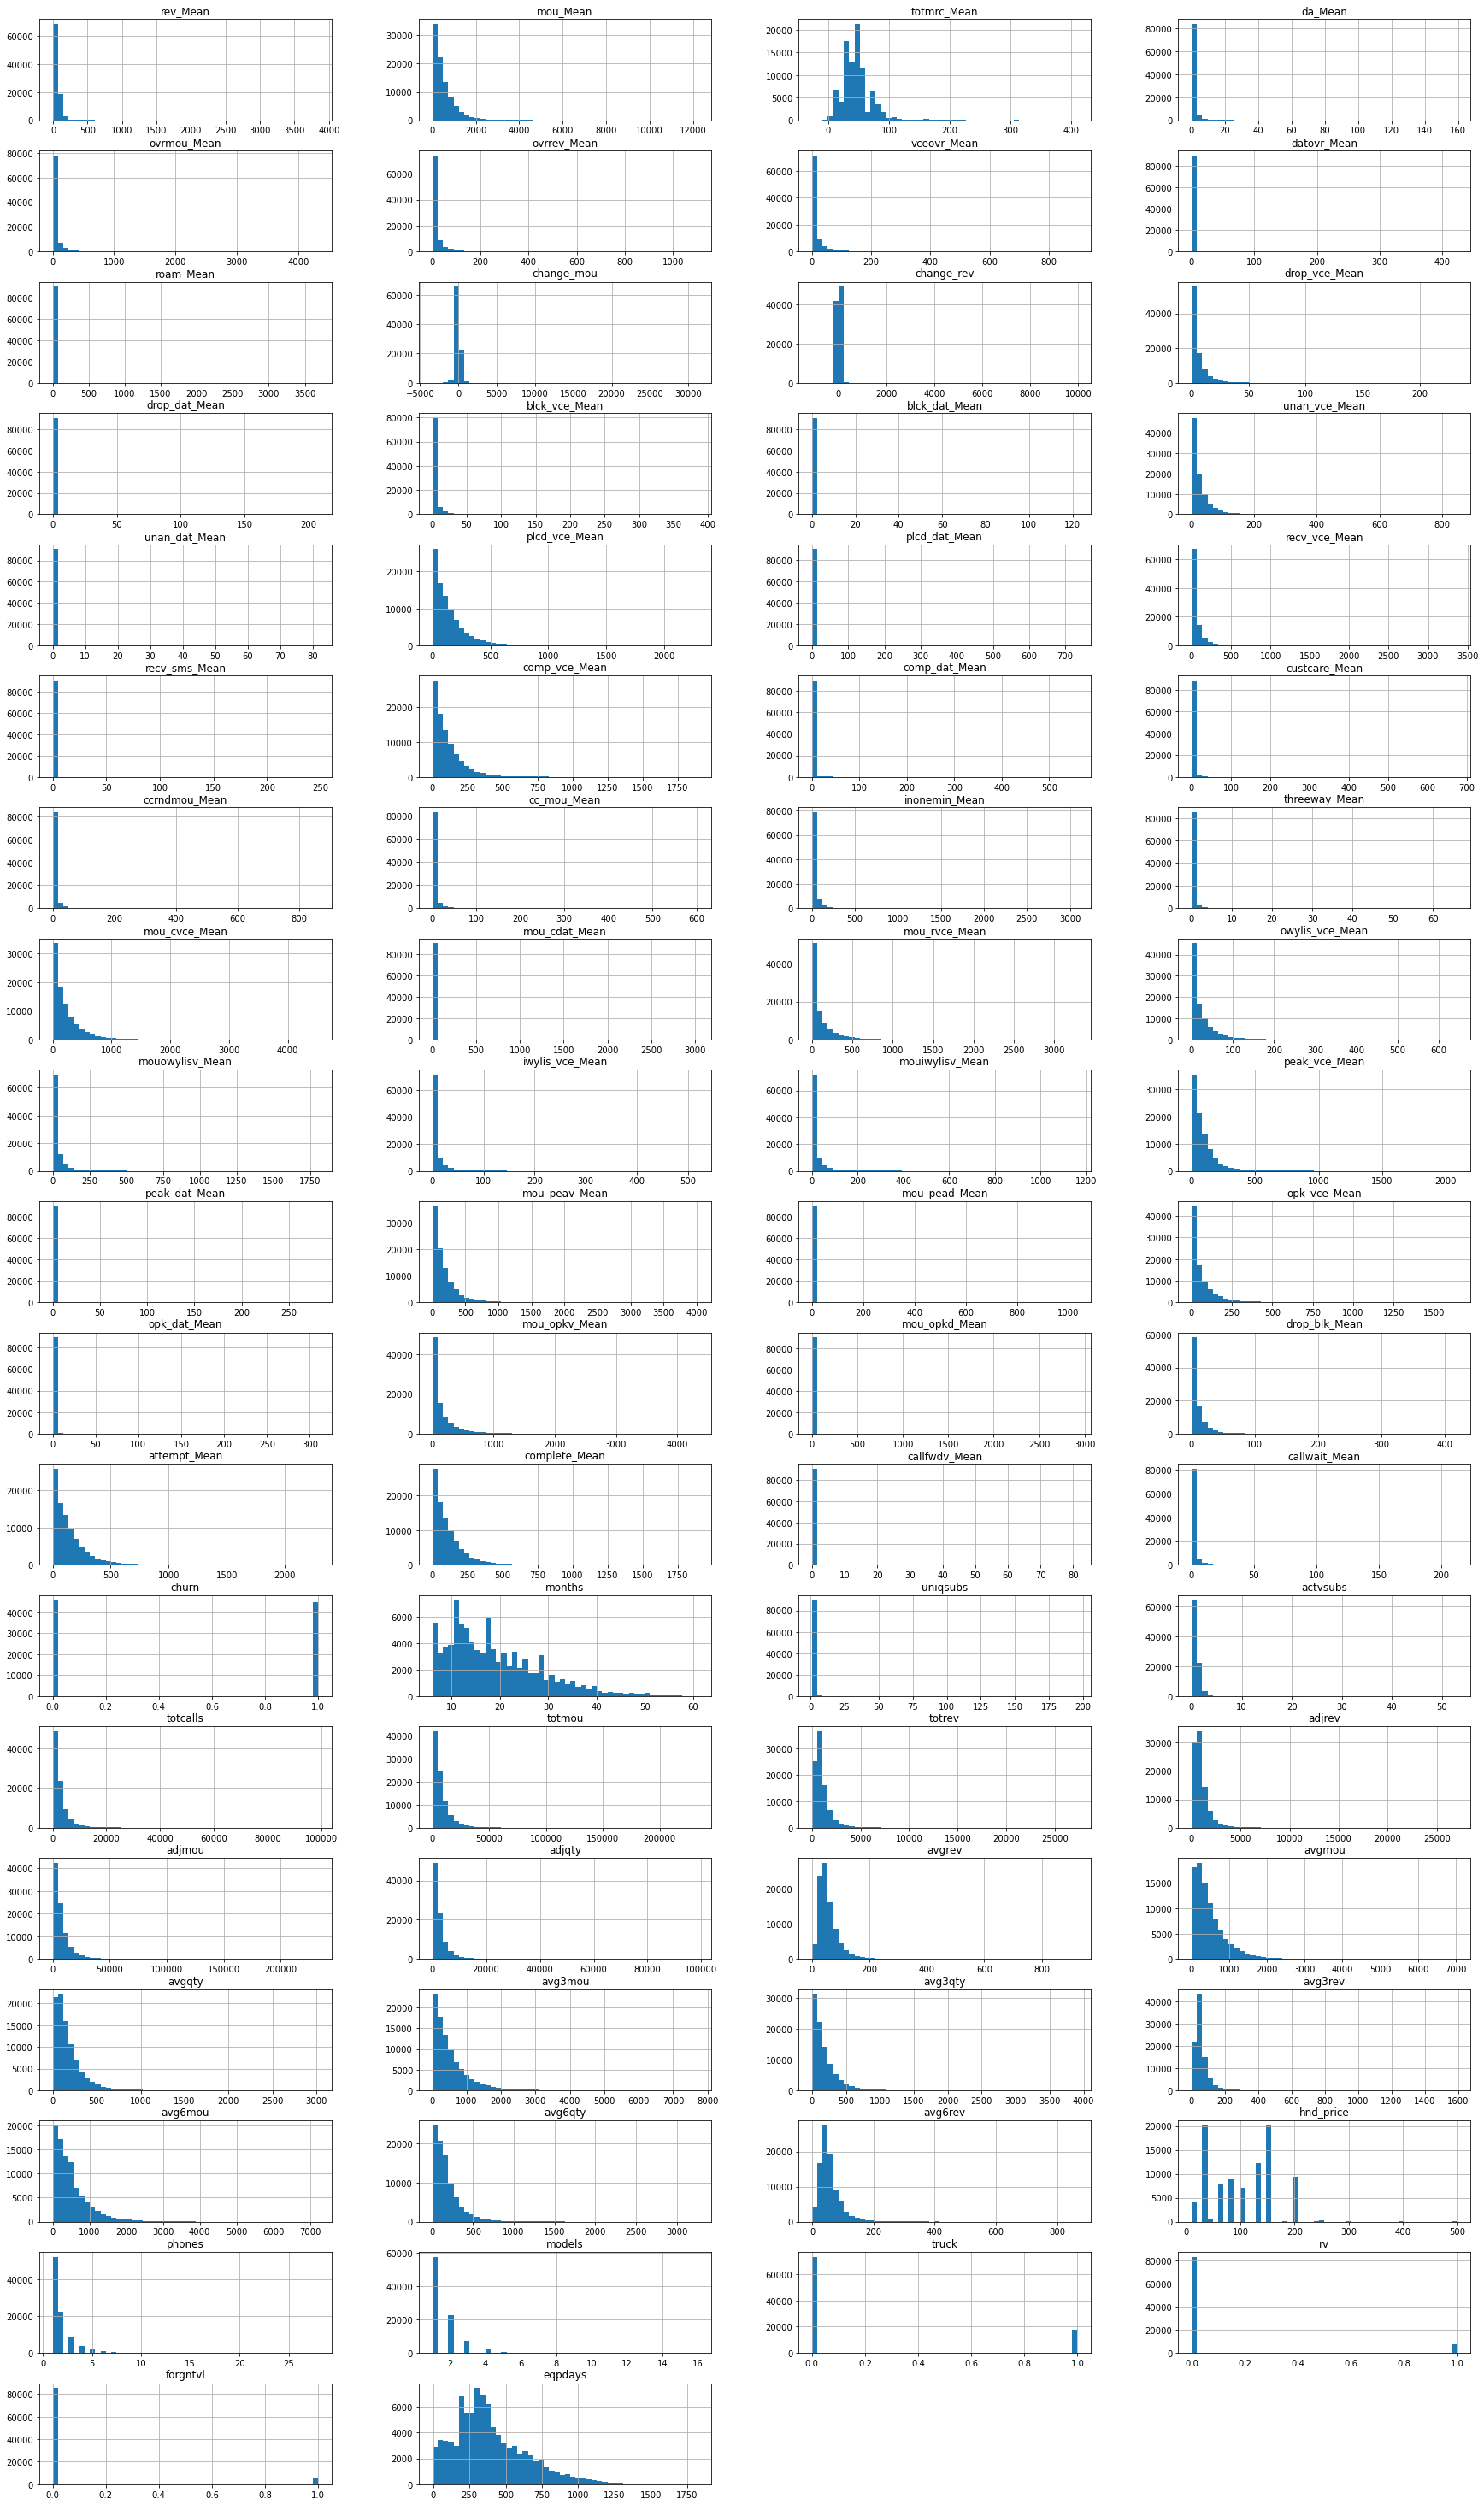

In [32]:
data.hist(bins=50,figsize=(30,70),layout=(25,4))
plt.show()

- The skewness in the features are visible by the distribution of most of the features. They are all right skewed (positively skewed).<br>
<br>
- From the above charts we can understand the type of distriution related to each feature and can use different type of tranformation techniques in order to get the data normally distributes.<br>
<br>
- Techniques like:
<br>
a) Log tranfromation
b) Square root tranfromation
c) BoxCox tranfromation
d) Reciprocal Tranfromation<br>
<br>
- We are not tranforming the data right now as we'll  create the base model and check how the data performs and if the accuracy of model seems to be less then we can use these tranfromation techniques.

<AxesSubplot:>

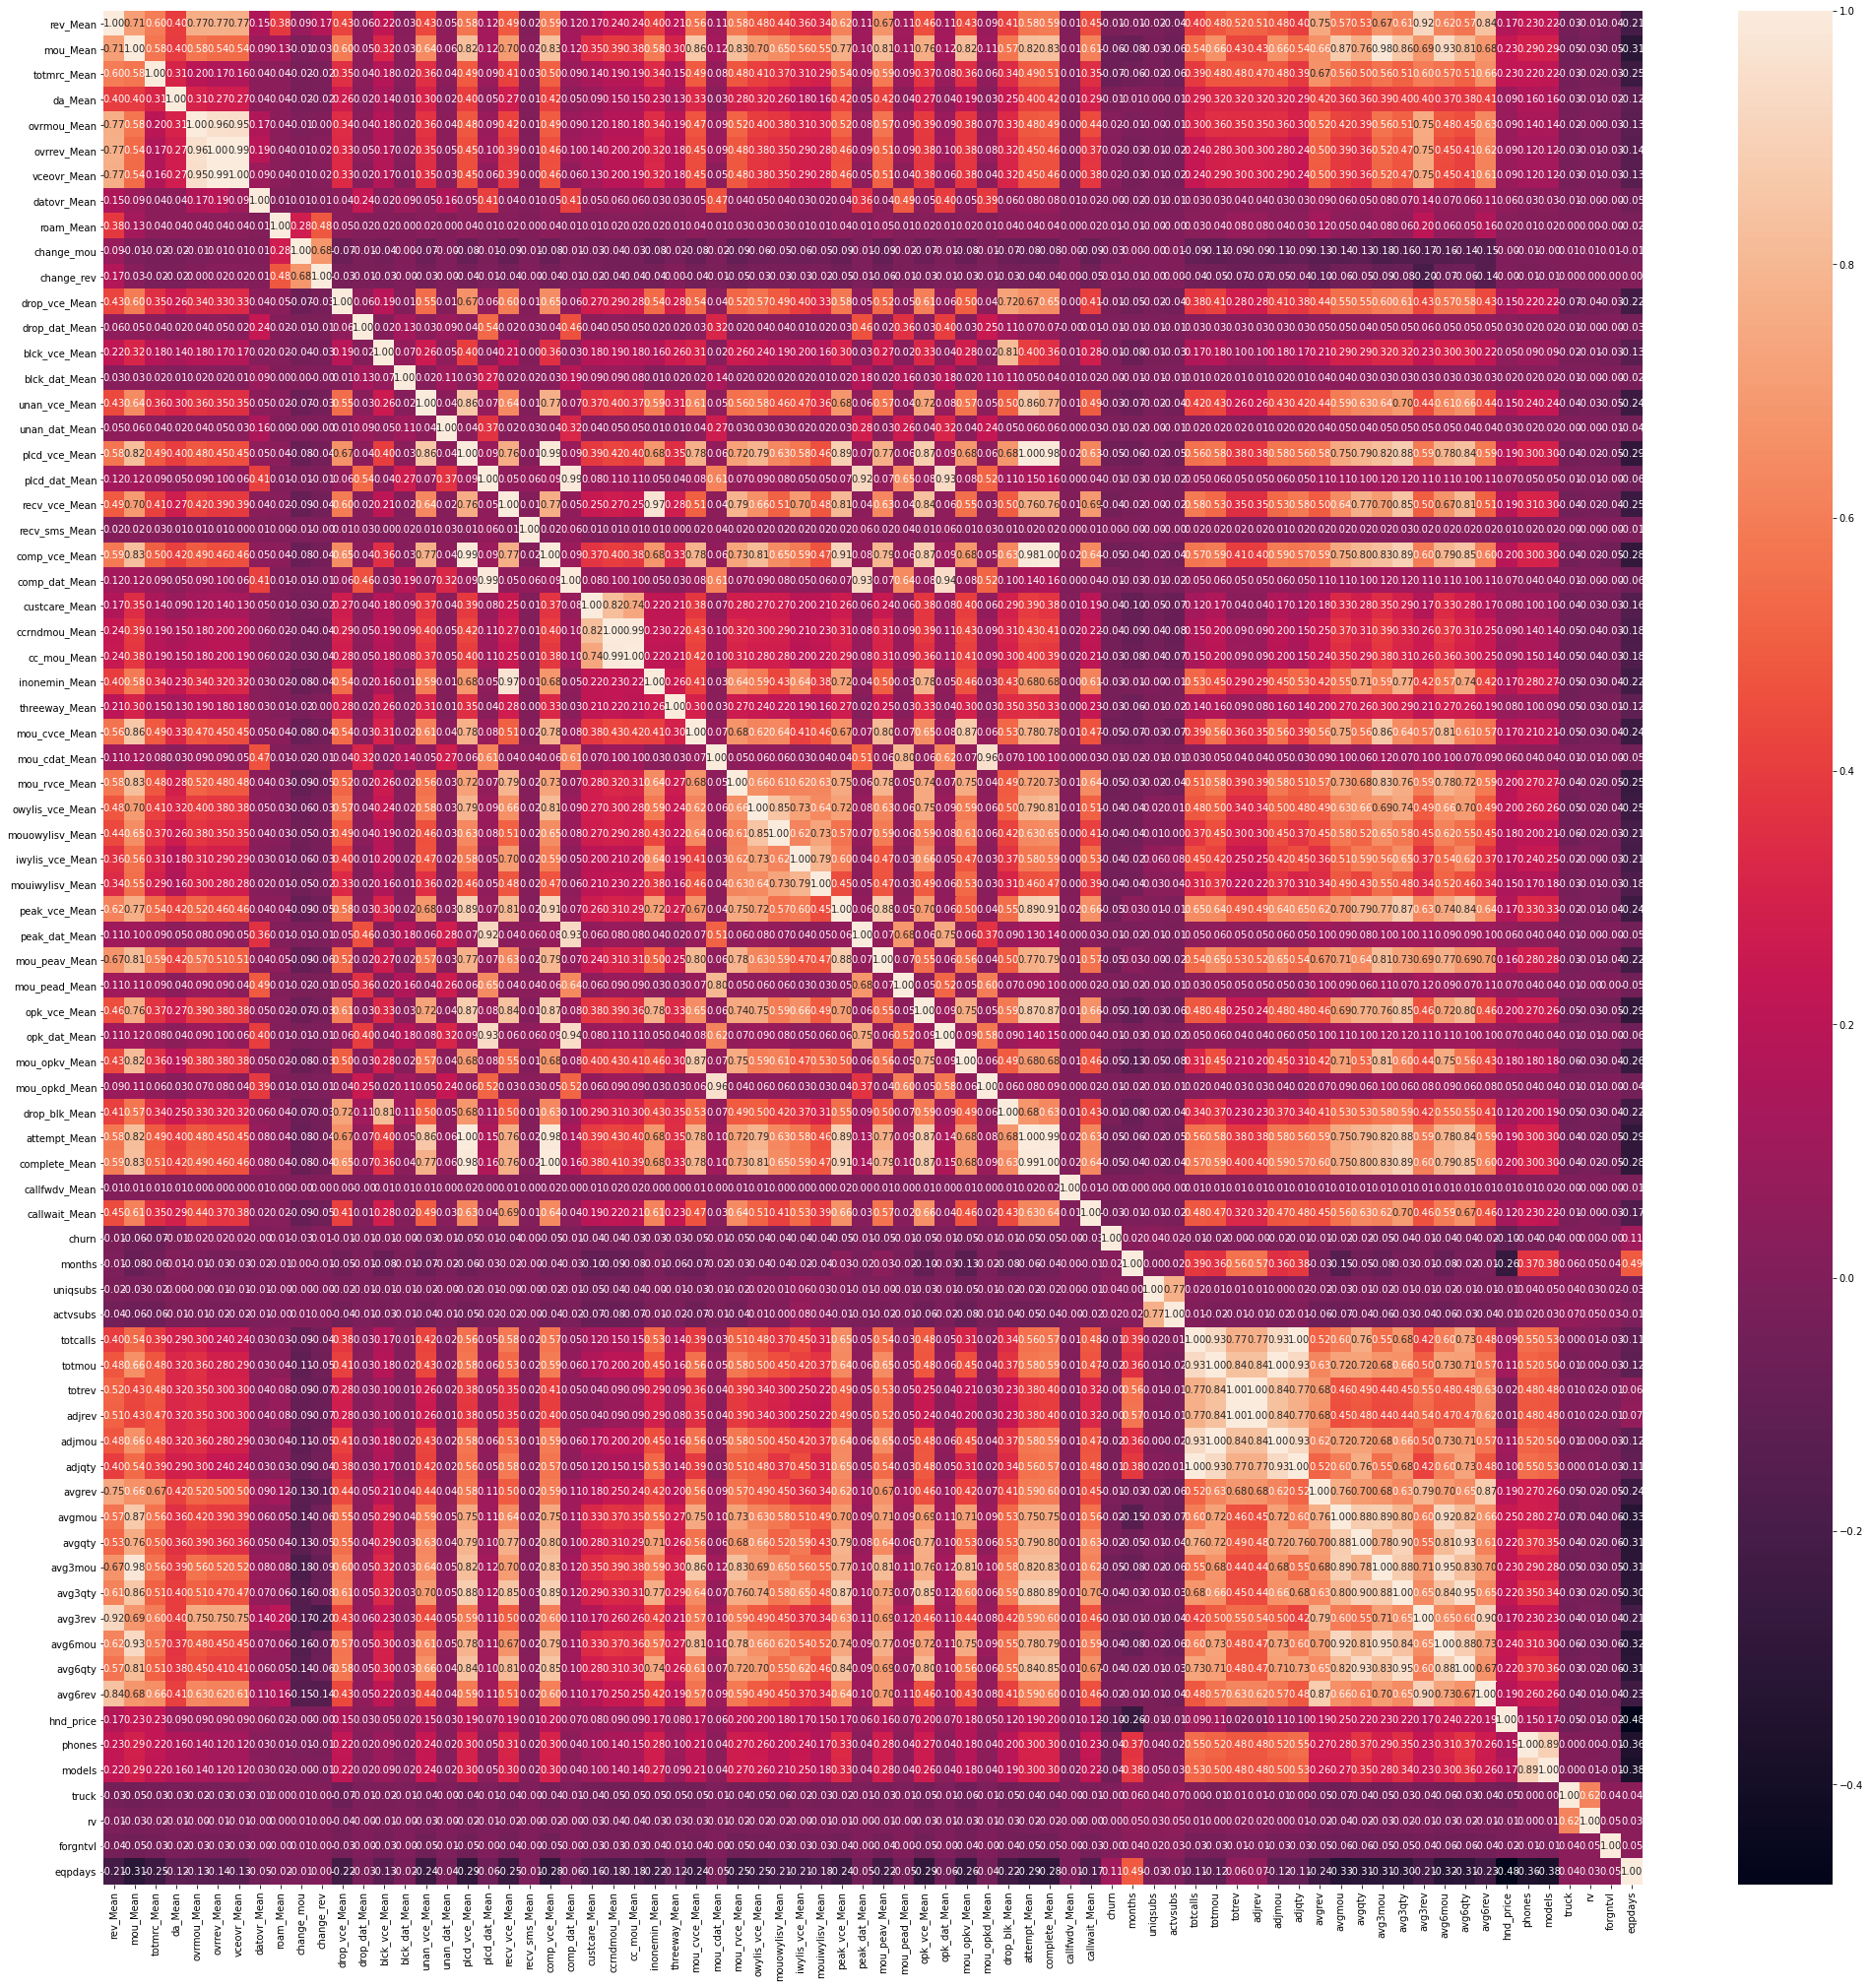

In [33]:
import seaborn as sns
corr= data.corr()
top_features=corr.index
plt.figure(figsize=(35,35))
sns.heatmap(data[top_features].corr(),annot=True,fmt = ".2f")

- From the above correlation heatmap we can be able to figure which features are highly correlated to each other.
- Here we are able to see lighter the color, features are positively correlated. Darker the color, feature are negtively correlated.
- As a general observation, not always neatively corerelated features are bad. They can still provide info on predicting the churn.
- Feature selection based on correlated features can be done in order to reduce model complexity and decrease the model training time. How the hghly correlated features can be removed is shown in the later steps.

#### Applying Label Encoder to Categorical features

In [34]:
len(categorical_cols)

16

In [35]:
data

rev_Mean     mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
0      23.997500   219.250000    22.500000  0.247500     0.000000   
2      16.990000    10.250000    16.990000  0.000000     0.000000   
3      38.000000     7.500000    38.000000  0.000000     0.000000   
4      55.230000   570.500000    71.980000  0.000000     0.000000   
5      82.275000  1312.250000    75.000000  1.237500     0.000000   
...          ...          ...          ...       ...          ...   
99995  58.719985   513.559937    46.179136  0.888828    41.072247   
99996  58.719985   513.559937    46.179136  0.888828    41.072247   
99997  58.719985   513.559937    46.179136  0.888828    41.072247   
99998  58.719985   513.559937    46.179136  0.888828    41.072247   
99999  58.719985   513.559937    46.179136  0.888828    41.072247   

       ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  \
0          0.00000     0.000000     0.000000   0.000000 -157.250000  ...   
2          0.00000     0.000000     0.000000   0.000000   -4.250000  ...   
3          0.00000     0.000000     0.000000   0.000000   -1.500000  ...   
4          0.00000     0.000000     0.000000   0.000000   38.500000  ...   
5          0.00000     0.000000     0.000000   0.000000  156.750000  ...   
...            ...          ...          ...        ...         ...  ...   
99995     13.55956    13.295062     0.261318   1.286405  -13.933818  ...   
99996     13.55956    13.295062     0.261318   1.286405  -13.933818  ...   
99997     13.55956    13.295062     0.261318   1.286405  -13.933818  ...   
99998     13.55956    13.295062     0.261318   1.286405  -13.933818  ...   
99999     13.55956    13.295062     0.261318   1.286405  -13.933818  ...   

       marital  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  \
0            S       0.0       N       U       U        U         U         U   
2            M       0.0       N       U       Y        U         U         U   
3            M       0.0       U       Y       U        U         U         U   
4            S       0.0       I       U       U        U         U         U   
5            S       0.0       U       U       U        U         U         U   
...        ...       ...     ...     ...     ...      ...       ...       ...   
99995        M       0.0       S       U       U        U         Y         U   
99996        M       0.0       N       U       U        Y         Y         Y   
99997        B       0.0       U       Y       Y        U         U         U   
99998        U       0.0       S       U       U        U         U         U   
99999        A       0.0       H       U       U        U         U         U   

       creditcd  eqpdays  
0             Y    361.0  
2             Y   1504.0  
3             Y   1812.0  
4             Y    434.0  
5             Y    458.0  
...         ...      ...  
99995         Y    773.0  
99996         Y    835.0  
99997         N    433.0  
99998         N     75.0  
99999         N      5.0  

[90792 rows x 90 columns]

In [36]:
from sklearn import preprocessing
data = data.apply(preprocessing.LabelEncoder().fit_transform)
data

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0          3453      1056         1044        1            0            0   
2          1854        56          619        0            0            0   
3          8001        41         2680        0            0            0   
4         14355      2595         5967        0            0            0   
5         22764      5652         6149        8            0            0   
...         ...       ...          ...      ...          ...          ...   
99995     15605      2353         3639        6          235         2758   
99996     15605      2353         3639        6          235         2758   
99997     15605      2353         3639        6          235         2758   
99998     15605      2353         3639        6          235         2758   
99999     15605      2353         3639        6          235         2758   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  marital  \
0                0            0          0        3129  ...        3   
2                0            0          0        3829  ...        2   
3                0            0          0        3845  ...        2   
4                0            0          0        4049  ...        3   
5                0            0          0        4568  ...        3   
...            ...          ...        ...         ...  ...      ...   
99995         1346           21        352        3777  ...        2   
99996         1346           21        352        3777  ...        2   
99997         1346           21        352        3777  ...        1   
99998         1346           21        352        3777  ...        4   
99999         1346           21        352        3777  ...        0   

       forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  \
0             0       9       0       0        0         0         0   
2             0       9       0       1        0         0         0   
3             0      14       1       0        0         0         0   
4             0       6       0       0        0         0         0   
5             0      14       0       0        0         0         0   
...         ...     ...     ...     ...      ...       ...       ...   
99995         0      13       0       0        0         1         0   
99996         0       9       0       0        1         1         1   
99997         0      14       1       1        0         0         0   
99998         0      13       0       0        0         0         0   
99999         0       5       0       0        0         0         0   

       creditcd  eqpdays  
0             1      366  
2             1     1444  
3             1     1539  
4             1      439  
5             1      463  
...         ...      ...  
99995         1      778  
99996         1      840  
99997         0      438  
99998         0       80  
99999         0       10  

[90792 rows x 90 columns]

#### Note:
The reason we used as number of categorical features is quite large as one-hot encoding can lead to high memory consumption. Also, one hot encoder causes dummy variable trap leads to the problem known as multicollinearity. 

<AxesSubplot:>

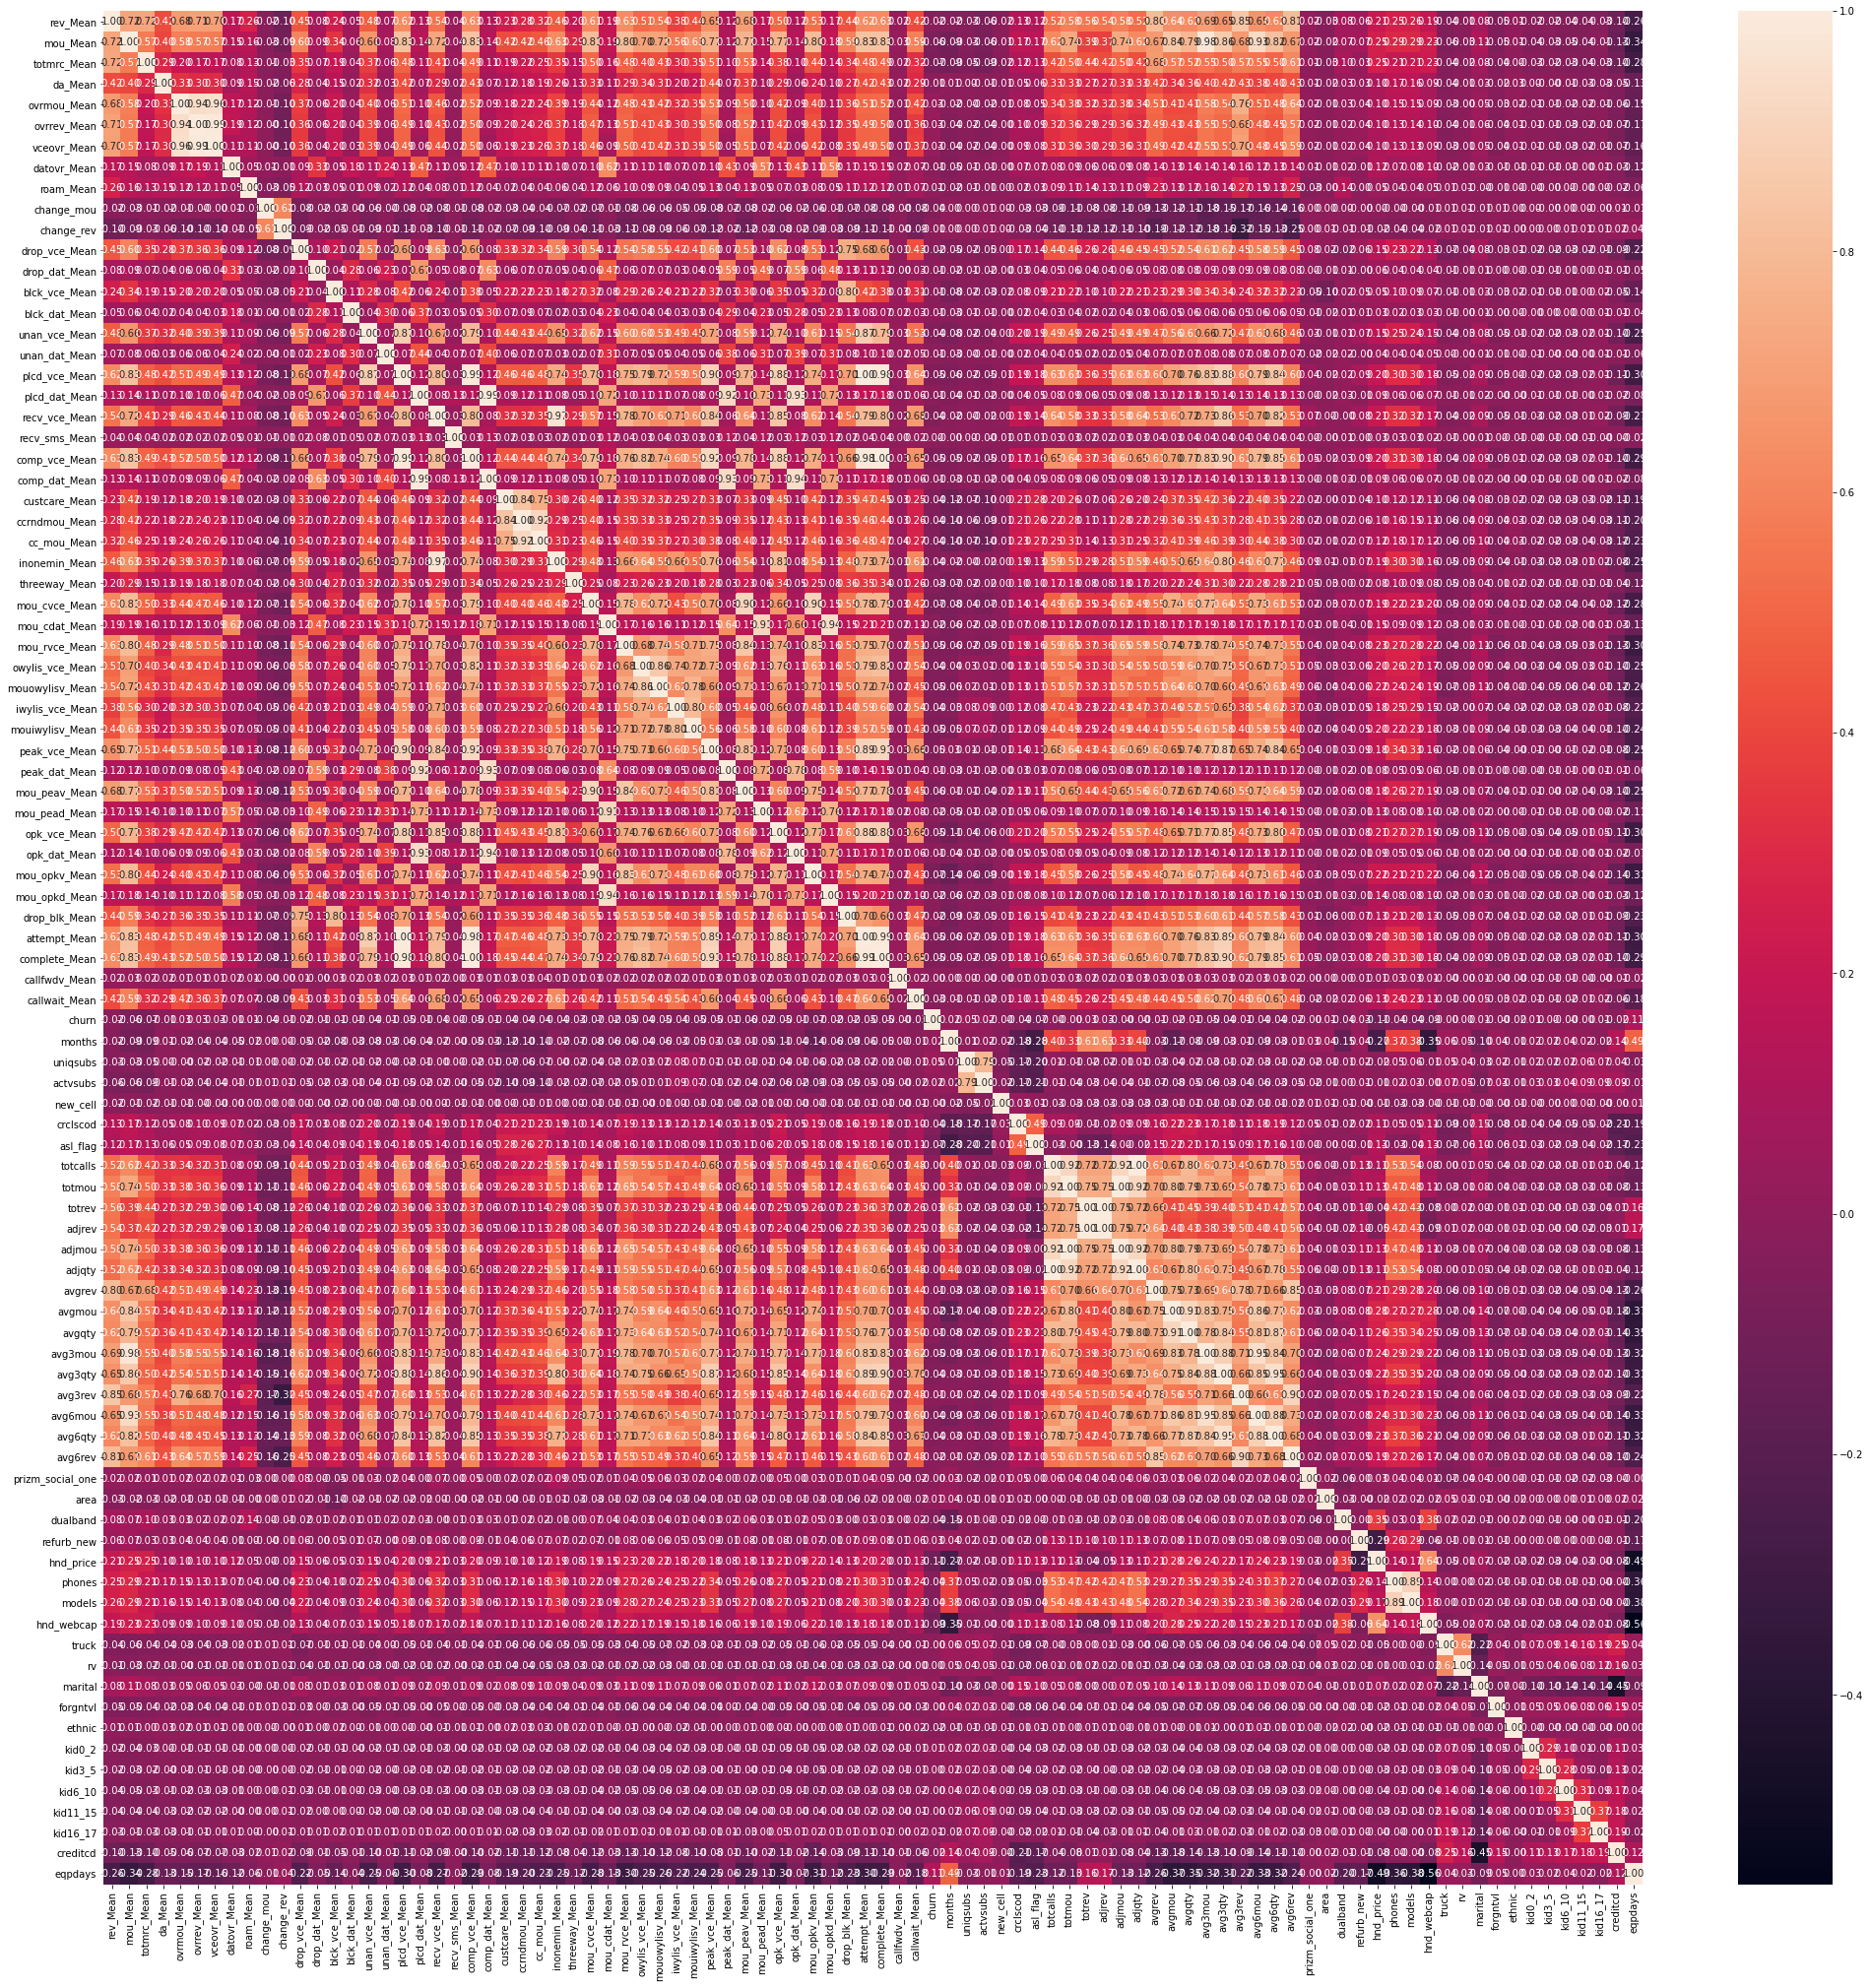

In [37]:
## plotting Correlation plot on all the features after encoding the categorical features
import seaborn as sns
corr= data.corr()
top_features=corr.index
plt.figure(figsize=(35,35))
sns.heatmap(data[top_features].corr(),annot=True,fmt = ".2f")

Text(0.5, 1.0, 'Correlation with Churn')

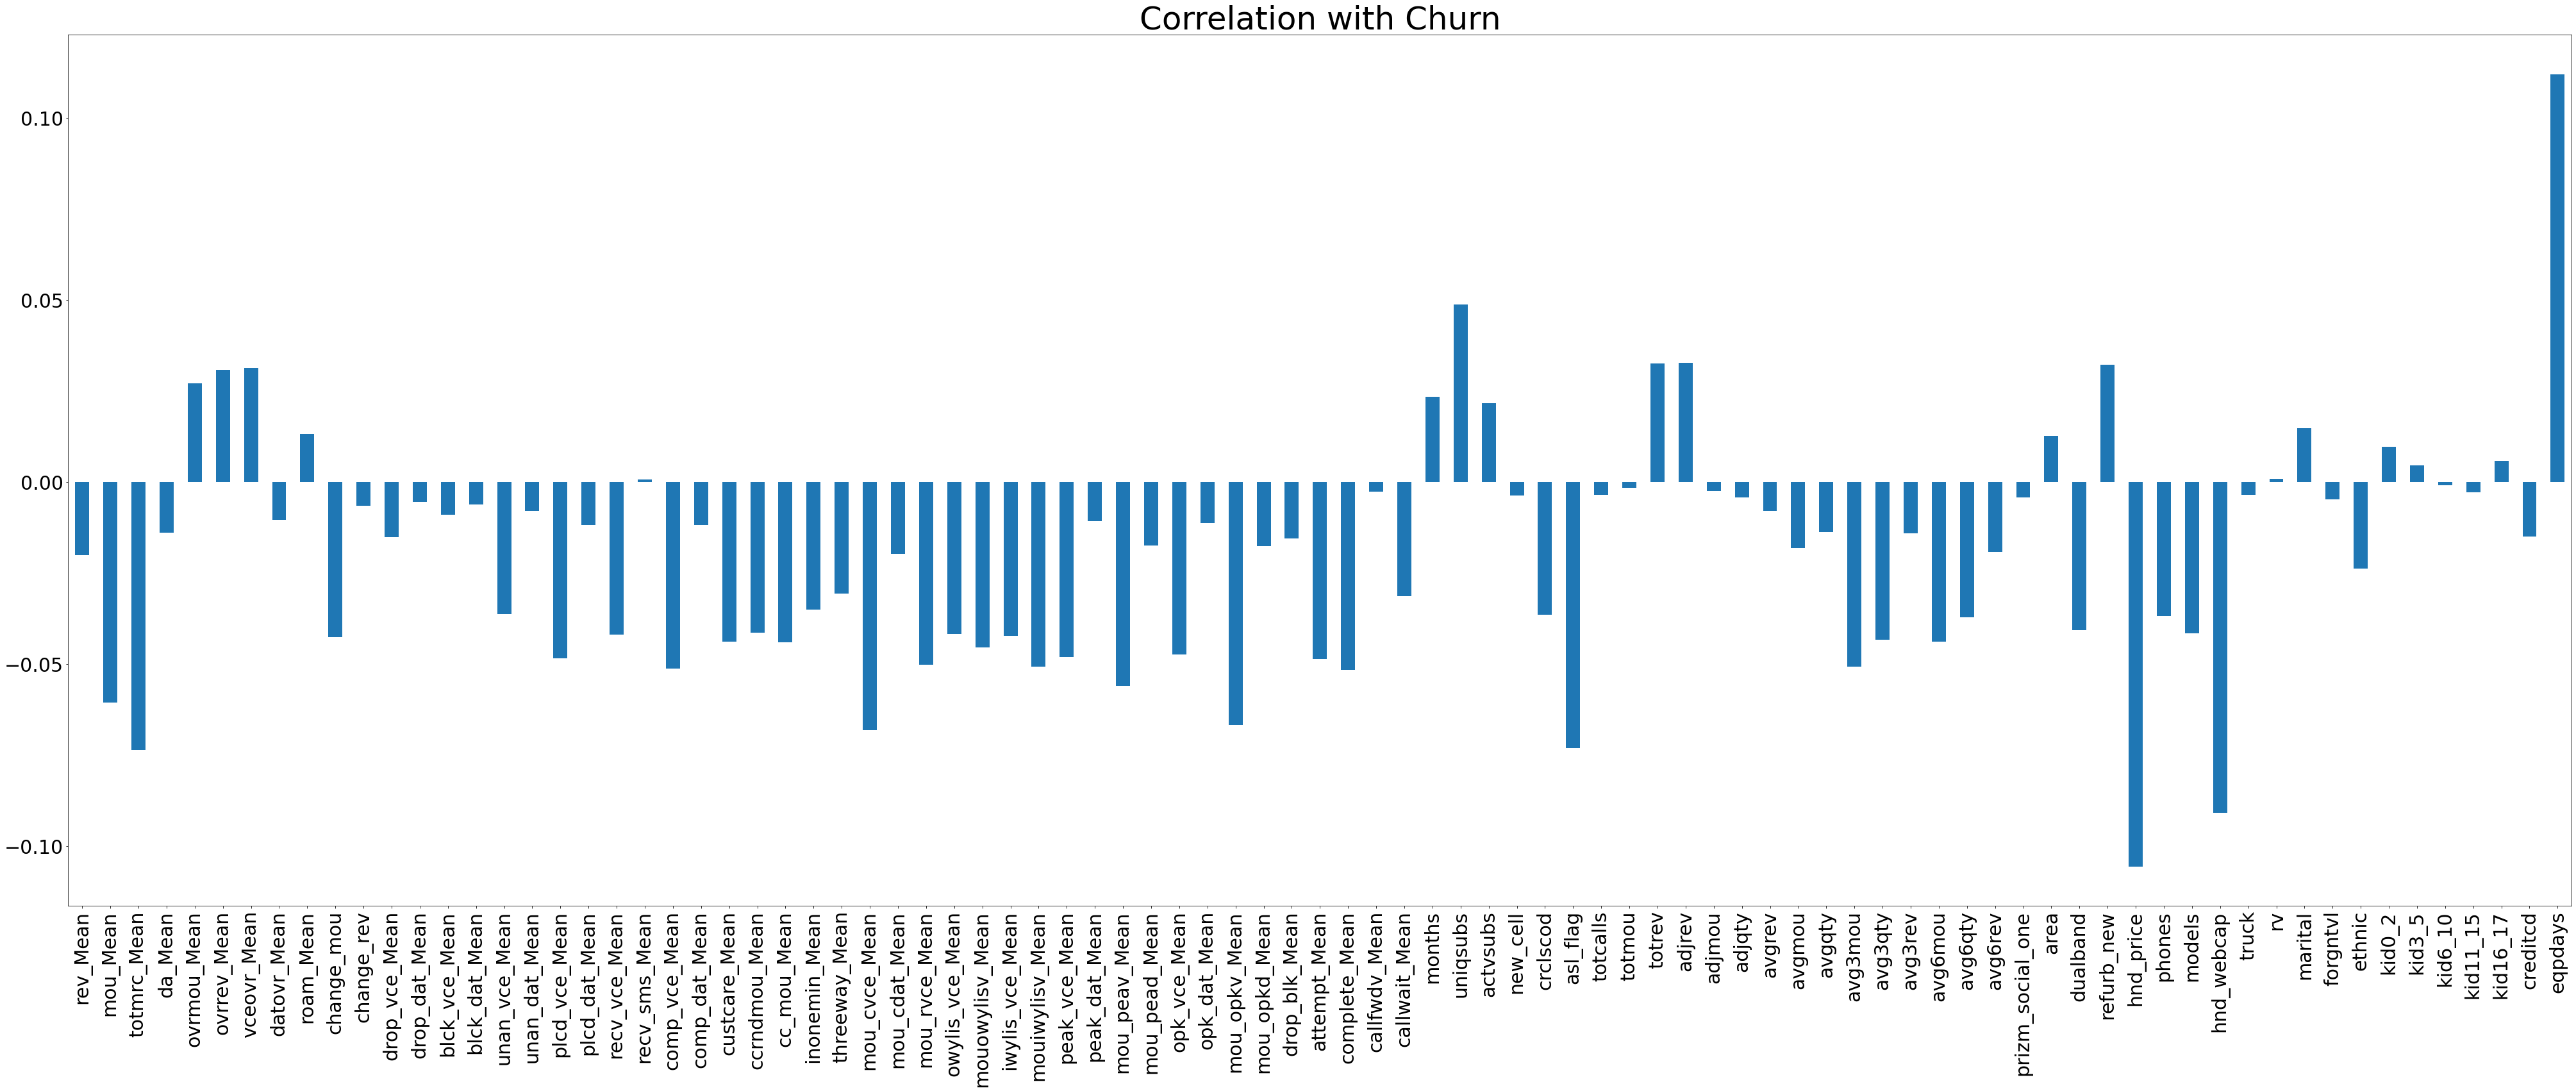

In [38]:
correlations = data.corrwith(data['churn'])
correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (70, 25), fontsize = 30)
plt.title('Correlation with Churn',horizontalalignment="center", fontstyle = "normal", fontsize = "50")

Here the EDA is completed and following are the takeaways:

- Dropped Customer_ID column form the data as its unique and doesn't add value to churn modelling.
- On the histograms, we can clearly see nuerical features are all postively skewed. If the model accuracy drops, we can use tranformation techniques to normally distirbute the features.
- Label encoding used to encode all the categorical features.
- The correlation heatmaps shows both postively and negatively correlated features. 
- Though majority of the features compared to target variable "churn" are negatively correlated which can be seen in last bar chart Correlation with Churn.

Next step is to conduct feature selection to avoid multicollinearity, reduce overfitting of the model, reduce training time and to get better accuracy of the model.

### 7. Feature Selection Methods

In [39]:
# Splitting target variable and independent variable
X = data.drop('churn', axis=1)
y = data['churn']

In [40]:
X.shape, y.shape

((90792, 89), (90792,))

This section focuses on feature selection based on 4 methods that are generally used:

- Feature Importance using Lasso Regression
- Feature Importance using Extra Tree Classifier
- Information gain (multi_info_classif_)
- Removing Multicollinear features<br>
<br>
The results if taken in account can help in reducing the number of input vatriables. We can decide how many fearures to take moving forward with churn model traning.

#### a. Feature Importance using Lasso Regression

Lasso Regression tries to minimize the cost function which will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.

#### b. Feature Importance using Extra Tree Classifier
In this we are using Extra Tree Classifier. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
y.shape, X.shape
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [42]:
print(model.feature_importances_)

[0.01477604 0.01555034 0.01627684 0.01340143 0.01267789 0.01304995
 0.01294639 0.00597686 0.01153504 0.01766168 0.01548753 0.01361872
 0.00163245 0.01269252 0.00105763 0.01333027 0.00239876 0.01265698
 0.00460613 0.01295681 0.00100025 0.01284615 0.00429518 0.01063507
 0.01033044 0.01081524 0.01290588 0.00984996 0.01456662 0.0043489
 0.01356551 0.01319748 0.01373676 0.01234396 0.01301689 0.01326214
 0.00360194 0.01427857 0.00362194 0.01315181 0.0036379  0.01454081
 0.00374052 0.01299589 0.01262776 0.01274379 0.00063277 0.01094454
 0.019109   0.01206556 0.00993133 0.01256119 0.01483161 0.0058985
 0.01536504 0.01509094 0.01651599 0.01650826 0.01520133 0.0153123
 0.0152767  0.01543857 0.01563774 0.01465271 0.01425079 0.01399911
 0.01435344 0.01429505 0.01425962 0.01493143 0.01611417 0.00839528
 0.0062396  0.01627109 0.01077587 0.0096713  0.00845086 0.00836225
 0.00550612 0.01391273 0.00525031 0.01571466 0.00424283 0.00443786
 0.00601598 0.00618095 0.00660031 0.00864889 0.02219777]


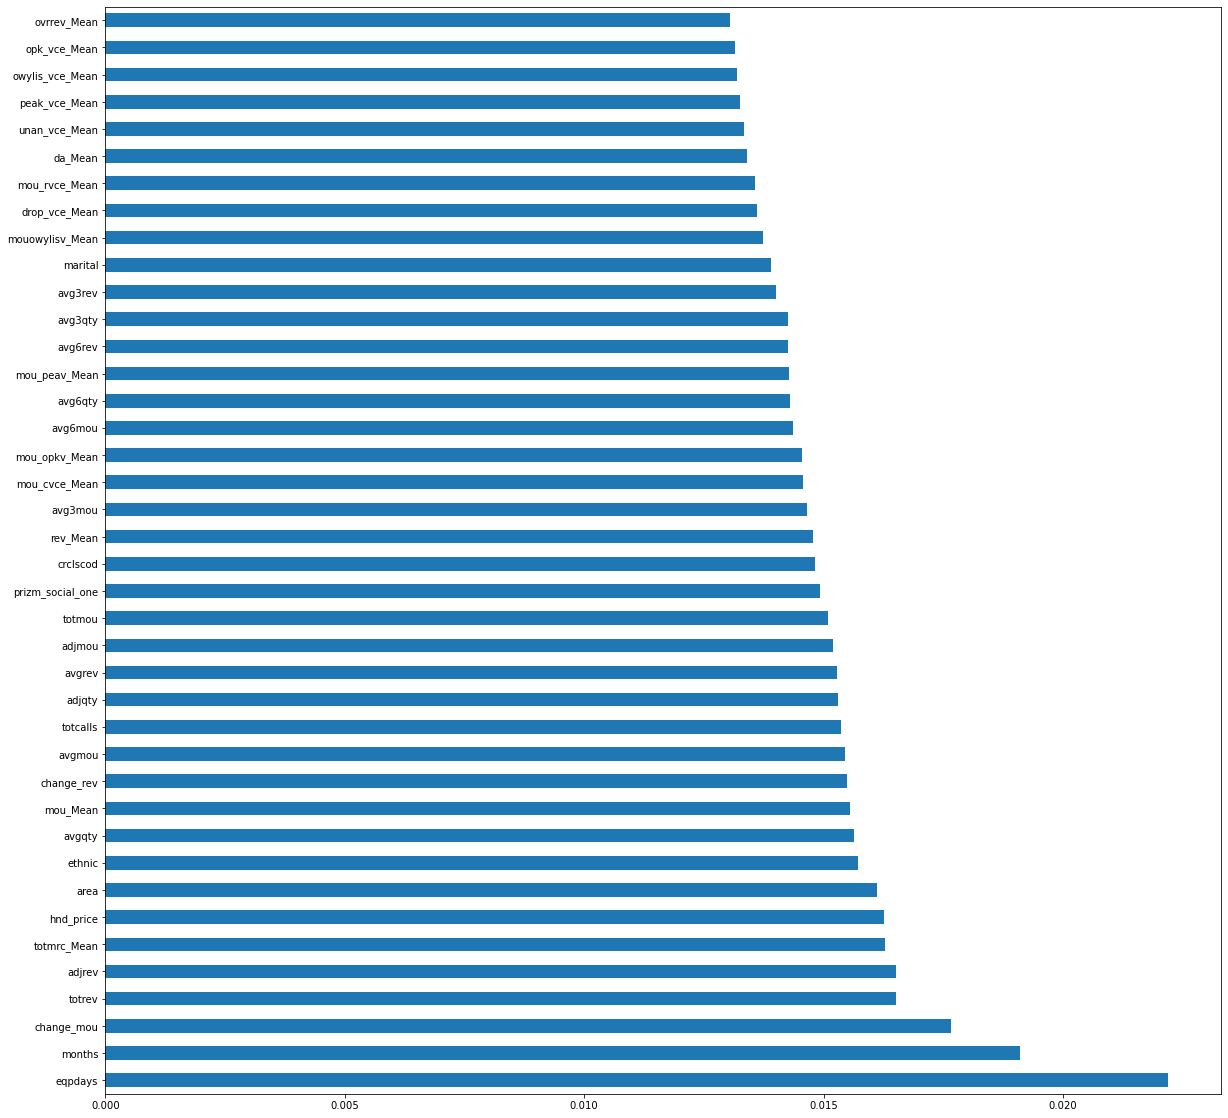

In [43]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(40).plot(kind='barh',figsize = (20,20))
plt.show()

We can select this top 40 features in order to reduce model complexity but in our case, we'll first test the complete data and create base models to see how they perform and then decide if we need to drill down to important features.

#### c. Information Gain
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [44]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

hnd_webcap       0.013152
eqpdays          0.011520
hnd_price        0.008927
mou_rvce_Mean    0.008036
change_mou       0.007660
                   ...   
complete_Mean    0.000000
callwait_Mean    0.000000
avg6qty          0.000000
avg6mou          0.000000
attempt_Mean     0.000000
Length: 89, dtype: float64

In [45]:
mi_scores_df = mutual_data.to_frame().reset_index()
mi_scores_df.columns = ['Features', 'MI Scores']
mi_scores_df

Features  MI Scores
0      rev_Mean   0.002655
1      mou_Mean   0.003086
2   totmrc_Mean   0.003902
3       da_Mean   0.000425
4   ovrmou_Mean   0.003410
..          ...        ...
84      kid6_10   0.000000
85     kid11_15   0.000056
86     kid16_17   0.000000
87     creditcd   0.006277
88      eqpdays   0.011520

[89 rows x 2 columns]

In [46]:
mi_scores_df[mi_scores_df['MI Scores']==0]

Features  MI Scores
11    drop_vce_Mean        0.0
13    blck_vce_Mean        0.0
16    unan_dat_Mean        0.0
18    plcd_dat_Mean        0.0
21    comp_vce_Mean        0.0
22    comp_dat_Mean        0.0
27    threeway_Mean        0.0
29    mou_cdat_Mean        0.0
31  owylis_vce_Mean        0.0
40     opk_dat_Mean        0.0
44     attempt_Mean        0.0
45    complete_Mean        0.0
47    callwait_Mean        0.0
66          avg6mou        0.0
67          avg6qty        0.0
72       refurb_new        0.0
75           models        0.0
78               rv        0.0
80         forgntvl        0.0
82           kid0_2        0.0
83           kid3_5        0.0
84          kid6_10        0.0
86         kid16_17        0.0

#### d. Removing Multi collinear features using Variable Inflation Factors (VIF)

Let's try to look into multicollinearity using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [50]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_vif = data.drop('churn', axis=1)
vif_scores = calc_vif(data_vif).sort_values(by= 'VIF', ascending=False)
vif_scores

variables           VIF
17  plcd_vce_Mean  89926.817090
44   attempt_Mean  87093.426030
21  comp_vce_Mean  62632.954887
45  complete_Mean  60409.741907
54       totcalls  19022.475390
..            ...           ...
83         kid3_5      1.249303
82         kid0_2      1.153252
80       forgntvl      1.102556
20  recv_sms_Mean      1.030460
46  callfwdv_Mean      1.006310

[89 rows x 2 columns]

In [52]:
len(vif_scores[vif_scores['VIF']>10])

53

We can drop the above features which are having multicollinearity to reduce the complexity and redundancy in the model.

#### Note:

We can use these feature selection techniques but we will first check on how the base models perform on complete set of data.

### 8. Feature Engineering and data preparation

In [53]:
# Splitting the data in training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
# Scaling the feature using standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72633, 89), (72633,), (18159, 89), (18159,))

### 9. Model Building - Iteration 1 (Base Models)

In [56]:
## creating model stats fuction

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score, roc_auc_score
from sklearn import metrics
def model_stats(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
    print("\n")
    print("Classification report:\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    print("F1 Score: {}".format(f1_score(y_test,y_pred, average='weighted')))
    print("\n")
    print("ROC AUC Score: {}".format(roc_auc_score(y_test,y_pred, average= 'weighted', multi_class = 'ovo')))

#### a. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0, multi_class='ovr', max_iter=1000)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_stats(y_test, pred)

[[5563 3540]
 [3747 5309]]


Accuracy Score 0.5987113827853957


Classification report:

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      9103
           1       0.60      0.59      0.59      9056

    accuracy                           0.60     18159
   macro avg       0.60      0.60      0.60     18159
weighted avg       0.60      0.60      0.60     18159



F1 Score: 0.5986473854304802


ROC AUC Score: 0.5986791900914892


#### b. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
model_stats(y_test,y_pred)

[[5777 3326]
 [3545 5511]]


Accuracy Score 0.6216201332672504


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      9103
           1       0.62      0.61      0.62      9056

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6215532737690266


ROC AUC Score: 0.6215863836389123


#### c. SVM

In [59]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5587 3516]
 [3520 5536]]


Accuracy Score 0.6125337298309378


Classification report:

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      9103
           1       0.61      0.61      0.61      9056

    accuracy                           0.61     18159
   macro avg       0.61      0.61      0.61     18159
weighted avg       0.61      0.61      0.61     18159



F1 Score: 0.6125334901223255


ROC AUC Score: 0.6125305640318165


#### d. XG Boost

In [60]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective='binary:logistic',max_depth=10,use_label_encoder=False,eval_metric='mlogloss')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
model_stats(y_test,y_pred)

[[5708 3395]
 [3522 5534]]


Accuracy Score 0.61908695412743


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      9103
           1       0.62      0.61      0.62      9056

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6190614250667448


ROC AUC Score: 0.6190663006099414


#### e. Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
model_stats(y_test,y_pred)

[[2571 6532]
 [1937 7119]]


Accuracy Score 0.5336196927143565


Classification report:

              precision    recall  f1-score   support

           0       0.57      0.28      0.38      9103
           1       0.52      0.79      0.63      9056

    accuracy                           0.53     18159
   macro avg       0.55      0.53      0.50     18159
weighted avg       0.55      0.53      0.50     18159



F1 Score: 0.5020844351802303


ROC AUC Score: 0.5342715097709798


#### f. K - Nearest Neighbour

For KNN we will first need to decide the n_neighbours which basically comes from finding the optimal K value. This can be found by plotting the graph below and checking the last elbow instance.

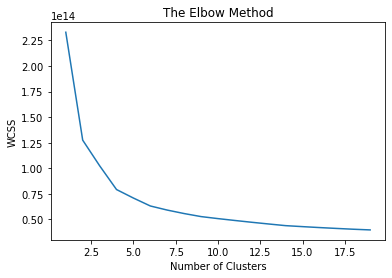

In [62]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
model_stats(y_test,knn_predictions)

[[6691 2412]
 [6017 3039]]


Accuracy Score 0.5358224571837656


Classification report:

              precision    recall  f1-score   support

           0       0.53      0.74      0.61      9103
           1       0.56      0.34      0.42      9056

    accuracy                           0.54     18159
   macro avg       0.54      0.54      0.52     18159
weighted avg       0.54      0.54      0.52     18159



F1 Score: 0.5165086907832854


ROC AUC Score: 0.5353055144034758


#### g. ADA Boost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5610 3493]
 [3331 5725]]


Accuracy Score 0.6242083815188061


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      9103
           1       0.62      0.63      0.63      9056

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6241871493917004


ROC AUC Score: 0.624228954487881


#### h. Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5559 3544]
 [3090 5966]]


Accuracy Score 0.6346715127484993


Classification report:

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      9103
           1       0.63      0.66      0.64      9056

    accuracy                           0.63     18159
   macro avg       0.64      0.63      0.63     18159
weighted avg       0.64      0.63      0.63     18159



F1 Score: 0.6344666947276294


ROC AUC Score: 0.6347337755890673


#### i. Linear Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model_stats(y_test, y_pred)

[[5567 3536]
 [3744 5312]]


Accuracy Score 0.5990968665675422


Classification report:

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      9103
           1       0.60      0.59      0.59      9056

    accuracy                           0.60     18159
   macro avg       0.60      0.60      0.60     18159
weighted avg       0.60      0.60      0.60     18159



F1 Score: 0.5990323687888032


ROC AUC Score: 0.5990645339225331


#### Iteration 1 Summary:

- By training the model on completely cleaned data we can find that result are not so good.
- The best performing model is Gradient Boost which gives accuracy upto 63.5%.
- The precision and recall of the Gradient Boost model are also good which suggests model can accurately predict the proportion of the customers that can churn.
- Other boosting models have performed better compared to other traditional classification models.
- Next step here is to apply feature selection by applying techniques mentioned in the feature selection section and see how these models perform.

| Model | Accuracy | F1 Score | ROC AUC Weighted|
| :------: | :------: | :------: | :------: |
| Logistic Regression | 60% | 60% | 60% |
| Random Forest Classifier | 62.2% | 62.1% | 62.1% |
| Support Vector Machine (SVM) | 61.3% | 61.3%| 61.3% |
| XG Boost | 61.9% | 61.9% | 61.9% |
| Naive Bayes | 53.4% | 50.2% | 53.4% |
| K- Nearest Neighbour | 53.6% | 51.7% | 53.5% |
| ADA Boost | 62.4% | 62.4% | 62.4% |
| Gradient Boost | 63.5% | 63.4% | 63.5% |
| Linear Discriminant Analysis | 60% | 60% | 60% |

### 10. Model Building with feature selection & Model Tuning - Iteration 2

In iteration 2, we'll focus on feature selection and test the models that performed better in iteration 1 along with application of cross validation techniques like Gridsearch CV.

### 1. Lasso regression for feature selection and model building

In [67]:
from sklearn.feature_selection import SelectFromModel

C = [10, 1, 0.5, 0.1, 0.01,0.001]

for c in C:
    lassoclf = LogisticRegression(penalty='l1', solver='liblinear', C=c).fit(X_train, y_train)
    model = SelectFromModel(lassoclf, prefit=True)
    X_lasso = model.transform(X_train)
    print('C Value:',c, ' selects',X_lasso.shape[1],' features')

C Value: 10  selects 88  features
C Value: 1  selects 86  features
C Value: 0.5  selects 85  features
C Value: 0.1  selects 74  features
C Value: 0.01  selects 53  features
C Value: 0.001  selects 9  features


We'll select the C value of 0.01 which gives us 54 features that are important based on our target variable "churn" and test how our churn model performs

In [68]:
lassoclf = LogisticRegression(penalty='l1', solver='liblinear', C=0.01).fit(X_train, y_train)
model = SelectFromModel(lassoclf, prefit=True)
X_train_lasso = model.transform(X_train)
cols = model.get_support(indices=True)
features_selected = list(data.columns[cols])
print(features_selected)

['mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'recv_sms_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'totcalls', 'totmou', 'adjqty', 'avgrev', 'avg3mou', 'avg6qty', 'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models', 'rv', 'marital', 'forgntvl', 'ethnic', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [69]:
X_train_lasso = pd.DataFrame(X_train_lasso)
X_train_lasso.columns = features_selected
X_train_lasso

mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  ovrrev_Mean  datovr_Mean  \
0     -0.824039    -1.645606 -0.379793    -0.260605    -0.276787    -0.203912   
1     -0.654512    -0.875296 -0.379793     0.181704     0.486628    -0.203912   
2     -0.556845    -0.261051 -0.379793    -0.534948    -0.662524    -0.108278   
3      0.825682     1.906469  0.230637    -0.537747    -0.666920    -0.203912   
4     -0.312423    -0.872132 -0.466997    -0.537747    -0.666920    -0.203912   
...         ...          ...       ...          ...          ...          ...   
72628  0.271558     2.038809 -0.030976    -0.537747    -0.666920    -0.203912   
72629  0.236641    -0.872132 -0.205384     2.603204     2.711302    -0.203912   
72630  0.551403     0.358467  2.323538     0.467245     1.072744    -0.203912   
72631 -0.272951     0.028409 -0.205384    -0.537747    -0.666920    -0.203912   
72632 -0.595305     0.361103 -0.205384    -0.537747    -0.666920    -0.203912   

       roam_Mean  change_mou  change_rev  drop_vce_Mean  ...    phones  \
0      -0.328479    0.924670    0.683683      -0.566107  ...  0.508143   
1      -0.328479    0.101748    0.235720      -0.141700  ... -0.603944   
2      -0.328479   -0.587236   -0.630799       0.514201  ...  0.508143   
3       0.107027   -1.464805   -0.002172       1.170103  ... -0.603944   
4      -0.328479   -0.041835    0.136936      -0.411777  ...  1.620230   
...          ...         ...         ...            ...  ...       ...   
72628   3.999277   -0.413650   -0.704755      -0.064535  ...  1.620230   
72629  -0.252026    3.005549    2.577487      -0.218865  ...  1.620230   
72630  -0.328479   -0.151130   -1.390434       0.128377  ...  1.620230   
72631   3.547388    0.760728    0.839343       0.166959  ... -0.603944   
72632  -0.328479   -0.457583    0.161412      -0.334612  ... -0.603944   

         models        rv   marital  forgntvl    ethnic   kid6_10  kid11_15  \
0      0.521532  1.077079 -0.252924 -2.438171 -0.211432 -0.320477 -0.343509   
1     -0.994535  1.077079 -0.252924  1.040022 -0.211432 -0.320477 -0.343509   
2      0.521532  1.077079 -0.252924 -1.100404 -0.211432 -0.320477 -0.343509   
3     -2.510602 -0.620414 -0.252924  1.040022 -0.211432 -0.320477 -0.343509   
4      0.521532 -0.620414 -0.252924 -1.100404  4.729661 -0.320477 -0.343509   
...         ...       ...       ...       ...       ...       ...       ...   
72628  0.521532 -2.317906 -0.252924 -1.100404 -0.211432 -0.320477 -0.343509   
72629  0.521532 -0.620414 -0.252924 -1.100404 -0.211432 -0.320477 -0.343509   
72630  0.521532  0.228333 -0.252924 -1.100404 -0.211432 -0.320477 -0.343509   
72631  0.521532  0.228333 -0.252924 -1.367958 -0.211432 -0.320477  2.911133   
72632  0.521532 -0.620414 -0.252924 -1.635511 -0.211432 -0.320477  2.911133   

       kid16_17  creditcd  
0     -1.544463 -1.386494  
1      0.647474  1.368214  
2     -1.544463 -1.093023  
3      0.647474  1.137351  
4      0.647474 -0.909115  
...         ...       ...  
72628 -1.544463 -0.185222  
72629  0.647474 -1.218237  
72630  0.647474 -0.768250  
72631  0.647474 -0.756511  
72632  0.647474  0.546497  

[72633 rows x 53 columns]

In [70]:
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, cols]
X_test_lasso.columns = features_selected

Because boosting algorithms worked well in our base model iteration, we'll test the feature selection techniques and apply on XG Boost, ADA Bosst and Gardient Boost to check if there is any difference to the accuracy of the model.

#### A1. XG Boost with lasso regression feature selection

In [71]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')
classifier.fit(X_train_lasso,y_train)
y_pred = classifier.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5701 3402]
 [3282 5774]]


Accuracy Score 0.631918057161738


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      9103
           1       0.63      0.64      0.63      9056

    accuracy                           0.63     18159
   macro avg       0.63      0.63      0.63     18159
weighted avg       0.63      0.63      0.63     18159



F1 Score: 0.6319082786720955


ROC AUC Score: 0.6319326953720457


- We can definitely see an increase in the accuracy of the model by usinf lasso regression feature selection. The accuracy of XG Bosst model increase from 61.9% to 63.2%. 
- Next step is to test if the model is underfitting by testing our model on training data.

In [72]:
### Testing model on training data

X_train_pred = classifier.predict(X_train_lasso)
model_stats(y_train,X_train_pred)

[[27605  9125]
 [ 8830 27073]]


Accuracy Score 0.7527983148155797


Classification report:

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     36730
           1       0.75      0.75      0.75     35903

    accuracy                           0.75     72633
   macro avg       0.75      0.75      0.75     72633
weighted avg       0.75      0.75      0.75     72633



F1 Score: 0.7528056690998034


ROC AUC Score: 0.7528125135761672


- As we can clearly see the the accruray of the model on the training set is 76% with the ROC AUC score of 76% determines that the model is not underfitting. 
- Lets tune the model by using cross validation technique Gridsearch CV.

#### A2. XG Boost with Gridsearch CV

In [73]:
max_dept = [4,5,7,9]
min_child_weight = [4,5,6]
gamma = [0,1,2,3,4]
reg_alpha = [0, 0.001, 0.005, 0.01, 0.05]
objective = ['binary:logistic']
use_label_encoder=[False]
eval_metric=['mlogloss']

hyperparameters = {
        "max_depth":max_dept,
        "min_child_weight":min_child_weight,
        "gamma":gamma,
        "objective": objective,
        "use_label_encoder" : use_label_encoder,
        "eval_metric":eval_metric
        }
print(hyperparameters)

{'max_depth': [4, 5, 7, 9], 'min_child_weight': [4, 5, 6], 'gamma': [0, 1, 2, 3, 4], 'objective': ['binary:logistic'], 'use_label_encoder': [False], 'eval_metric': ['mlogloss']}


In [74]:
from sklearn.model_selection import GridSearchCV
xg = XGBClassifier()
xg_gridcv=GridSearchCV(estimator=xg,param_grid=hyperparameters,verbose=2, cv=5)
xg_gridcv.fit(X_train_lasso,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.9s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.6s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   7.1s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.6s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.9s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   6.8s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=4, min_child_weight=5, o

[CV] END eval_metric=mlogloss, gamma=0, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.8s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  16.1s
[CV] END eval_metric=mlogloss, gamma=0, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  16.0s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.4s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   7.0s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=   6.7s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=

[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.2s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.9s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.9s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.7s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.9s
[CV] END eval_metric=mlogloss, gamma=1, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  16.2s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=4, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=

[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.0s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.0s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  15.6s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.0s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.9s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=  15.9s
[CV] END eval_metric=mlogloss, gamma=2, max_depth=9, min_child_weight=6, objective=binary:logistic, use_label_encoder=False; total time=

[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  16.0s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  16.7s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  17.2s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.1s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  16.1s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  15.5s
[CV] END eval_metric=mlogloss, gamma=3, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=

[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  15.2s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  15.6s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  15.3s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  15.7s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=4, objective=binary:logistic, use_label_encoder=False; total time=  15.3s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=  15.5s
[CV] END eval_metric=mlogloss, gamma=4, max_depth=9, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'eval_metric': ['mlogloss'], 'gamma': [0, 1, 2, 3, 4],
                         'max_depth': [4, 5, 7, 9],
                         'min_child_weight': [4, 5, 6],
                         'objective': ['binary:logistic'],
                         'use_label_encoder': [False]},
             verbose=2)

In [75]:
best_grid_xg=xg_gridcv.best_estimator_
y_pred=best_grid_xg.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5755 3348]
 [3229 5827]]


Accuracy Score 0.6378104521174074


Classification report:

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      9103
           1       0.64      0.64      0.64      9056

    accuracy                           0.64     18159
   macro avg       0.64      0.64      0.64     18159
weighted avg       0.64      0.64      0.64     18159



F1 Score: 0.63780104106176


ROC AUC Score: 0.6378249872678171


##### Insights:

- Using Lasso regression we considered the 54 features that were most important to churn which is our target variable.
- With lasso feature selection we can see there is increase in the acurracy of the XGBoost model from 61.9% to approximately 63.2% and without underfitting as testing model on training data gives us accuracy of 76%.
- The cross validation tehnique used to tune the XG Bosst model increase the accuracy to 63.8%.

#### B1. Gradient Boost with lasso regression feature selection

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_lasso,y_train)
y_pred = clf.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5537 3566]
 [3101 5955]]


Accuracy Score 0.6328542320612368


Classification report:

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      9103
           1       0.63      0.66      0.64      9056

    accuracy                           0.63     18159
   macro avg       0.63      0.63      0.63     18159
weighted avg       0.63      0.63      0.63     18159



F1 Score: 0.6326377040514176


ROC AUC Score: 0.6329180505960641


In [77]:
X_train_pred = clf.predict(X_train_lasso)
model_stats(y_train,X_train_pred)

[[22462 14268]
 [12290 23613]]


Accuracy Score 0.6343535307642532


Classification report:

              precision    recall  f1-score   support

           0       0.65      0.61      0.63     36730
           1       0.62      0.66      0.64     35903

    accuracy                           0.63     72633
   macro avg       0.63      0.63      0.63     72633
weighted avg       0.63      0.63      0.63     72633



F1 Score: 0.6341956954772757


ROC AUC Score: 0.6346162348880885


#### B2. Gradient Boost with Gridsearch CV

In [78]:
parameters = {
    "loss":["deviance", "exponential"],
    "learning_rate": [0.1, 0.2, 1],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [79]:
gb = GradientBoostingClassifier()
gb_gridcv=GridSearchCV(estimator=gb,param_grid=parameters,verbose=2)
gb_gridcv.fit(X_train_lasso,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.6s
[CV] END criterion=friedman_mse

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=sqrt, 

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   2.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sq

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.85; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=log2, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=log2, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   2.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, max_depth

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.7s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.7s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.7s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=3, max_features=sqr

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.9; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.95; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2, n_estimators=10, subsample=0.95; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=deviance, max_depth=8, max_features=log2,

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_dept

[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=8, max_features=log2, n_estimators=10, subsample=0.85; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=exponential, max_depth=8

[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.7s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimato

[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=1

[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=3, max_featu

[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=5, max_feature

[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   2.4s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=1, loss=exponential, max_depth=8, max_featu

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END

[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=deviance, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END

[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total tim

[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=8, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0

[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END c

[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total 

[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total tim

[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.85; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, l

[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, n_estimators=10, subsample=1.0; total time=   0.0s
[CV] END criterion=mae

[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=3, max_features=log2, n_estimators=10, subsample=0.95; total time=   0.0s
[

[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.9; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV] END criterion=mae, learning_rate=1, loss=exponential, max_depth=5, max_features=sqrt, n_estimators=10, subsample=0.95; total time=   0.0s
[CV

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.1, 0.2, 1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'], 'n_estimators': [10],
                         'subsample': [0.85, 0.9, 0.95, 1.0]},
             verbose=2)

In [80]:
best_grid_gb=gb_gridcv.best_estimator_
y_pred=best_grid_gb.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5501 3602]
 [3198 5858]]


Accuracy Score 0.6255300402004516


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      9103
           1       0.62      0.65      0.63      9056

    accuracy                           0.63     18159
   macro avg       0.63      0.63      0.63     18159
weighted avg       0.63      0.63      0.63     18159



F1 Score: 0.6253661886344487


ROC AUC Score: 0.6255851151272696


##### Insights:

- Using Lasso regression we considered the 54 features that were most important to churn which is our target variable.
- With lasso feature selection we can see there is decrease in the acurracy of the Gradient Boost model from 63.5% to approximately 63.3% and without underfitting as testing model on training data gives us accuracy of 63.5%.
- The cross validation technique used to tune the Gradient Boost model accuracy is 62.6%.
- The precision are recall scores of the model are also good.

#### C1. ADA Boost with lasso regression feature selection

In [81]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train_lasso, y_train)
y_pred = clf.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5625 3478]
 [3393 5663]]


Accuracy Score 0.6216201332672504


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      9103
           1       0.62      0.63      0.62      9056

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6216164268988306


ROC AUC Score: 0.62162971381896


In [82]:
X_train_pred = clf.predict(X_train_lasso)
model_stats(y_train,X_train_pred)

[[22649 14081]
 [13650 22253]]


Accuracy Score 0.618203846736332


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     36730
           1       0.61      0.62      0.62     35903

    accuracy                           0.62     72633
   macro avg       0.62      0.62      0.62     72633
weighted avg       0.62      0.62      0.62     72633



F1 Score: 0.6182161990681424


ROC AUC Score: 0.6182219164823354


#### C2. ADA Boost with Gridsearch CV

In [83]:
param_dict = {
    'n_estimators': [50, 100, 150],
    'learning_rate' : [0.01,0.05,0.1,0.3,1],
    'algorithm': ['SAMME', 'SAMME.R']
 }

In [84]:
ab = AdaBoostClassifier()
ab_gridcv=GridSearchCV(estimator=ab,param_grid=param_dict,verbose=2)
ab_gridcv.fit(X_train_lasso,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=  10.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=  10.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=  10.5s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=  10.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=  10.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=  20.8s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=  21.2s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=  20.8s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=  21.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=  21.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=150; total time=  31.2s
[CV] END algorithm=SAMME, lear

[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=  21.4s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=  33.4s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=  32.6s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=  32.5s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=  32.2s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=  32.4s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=  10.7s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=  11.1s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=  10.9s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=  10.7s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=  10.7s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [85]:
best_grid_ab=ab_gridcv.best_estimator_
y_pred=best_grid_ab.predict(X_test_lasso)
model_stats(y_test,y_pred)

[[5690 3413]
 [3391 5665]]


Accuracy Score 0.6253097637535107


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      9103
           1       0.62      0.63      0.62      9056

    accuracy                           0.63     18159
   macro avg       0.63      0.63      0.63     18159
weighted avg       0.63      0.63      0.63     18159



F1 Score: 0.6253103887132374


ROC AUC Score: 0.6253103894126465


##### Insights:

- Using Lasso regression we considered the 54 features that were most important to churn which is our target variable.
- With lasso feature selection we can see there is decreased in the acurracy of the ADA Boost model from 62.4% to approximately 62.2% and without underfitting as testing model on training data gives us accuracy of 62%.
- The cross validation technique used to tune the ADA Boost model increase the accuracy to 62.5%.

### 2. Feature selection using Extra Tree Classifier and model building

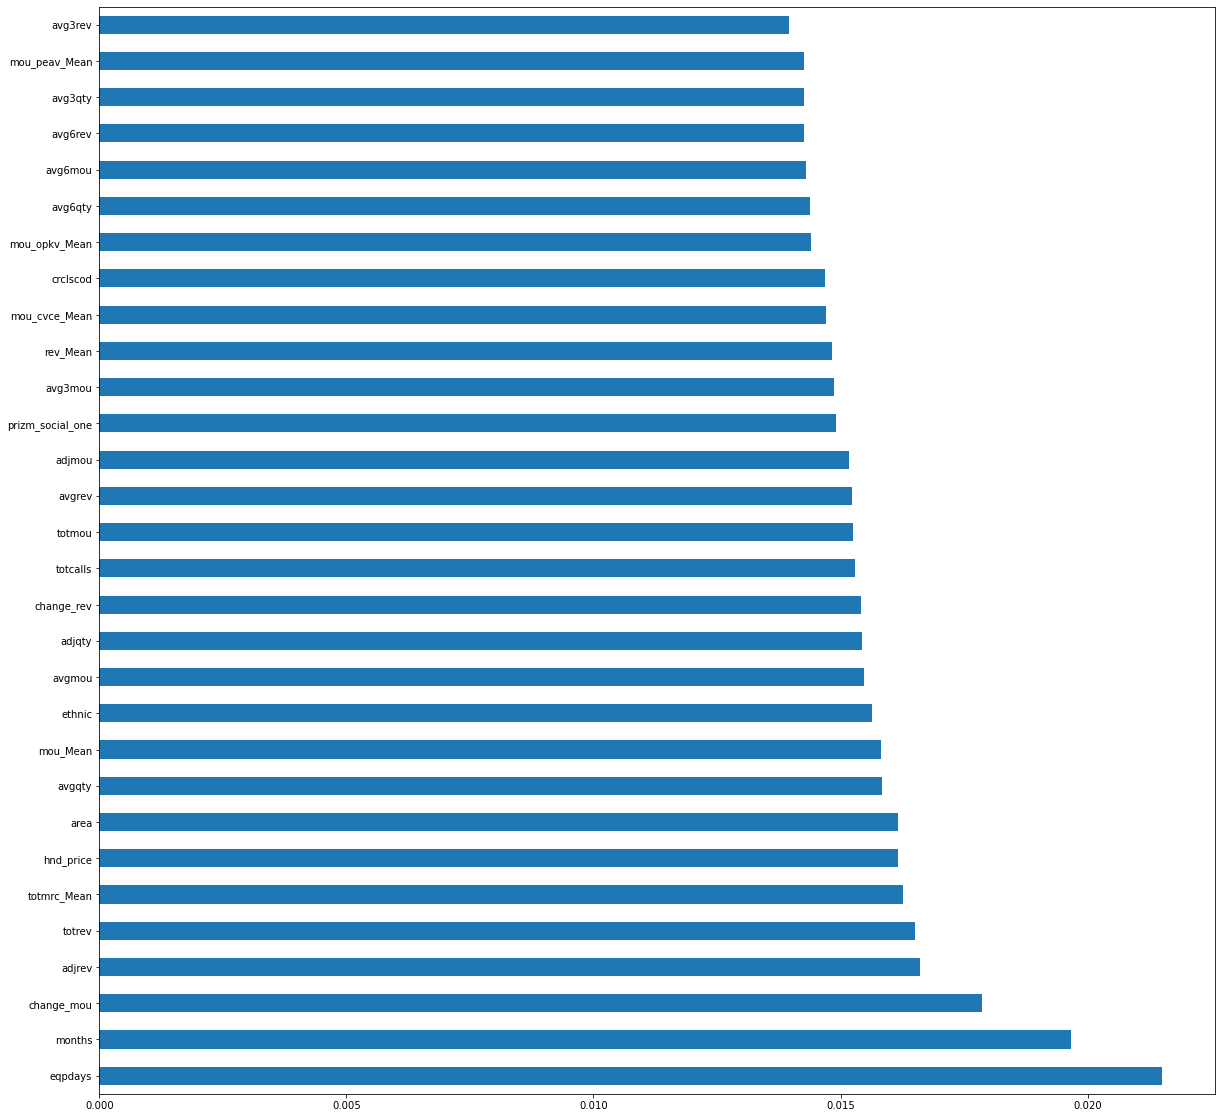

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
y.shape, X.shape
model=ExtraTreesClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(30).plot(kind='barh',figsize = (20,20))
plt.show()

In [87]:
top_30_features = ranked_features.nlargest(30)
top_30_df = pd.DataFrame(top_30_features).reset_index()
top_30_df.columns = ['Features', 'Importance Score']
top_30_features = top_30_df['Features'].tolist()

In [88]:
top_30_features_df = data[top_30_features]
top_30_features_df

eqpdays  months  change_mou  adjrev  totrev  totmrc_Mean  hnd_price  \
0          366      55        3129   55295   55442         1044          8   
2         1444      52        3829   62146   64020          619          1   
3         1539      54        3845   62219   62642         2680          1   
4          439      51        4049   64051   64201         5967          8   
5          463      53        4568   68653   69335         6149          7   
...        ...     ...         ...     ...     ...          ...        ...   
99995      778      19        3777   57316   57222         3639          1   
99996      840      21        3777   55267   55723         3639          1   
99997      438      25        3777   44729   44899         3639         11   
99998       80      19        3777   66195   66815         3639          8   
99999       10      19        3777   38145   38801         3639          8   

       area  avgqty  mou_Mean  ...  rev_Mean  mou_cvce_Mean  crclscod  \
0        13    2836      1056  ...      3453          16482         0   
2         6   12224        56  ...      1854           1199         7   
3         3    2667        41  ...      8001           1811         4   
4        10    7001      2595  ...     14355          41062         0   
5         6   30546      5652  ...     22764          47202         7   
...     ...     ...       ...  ...       ...            ...       ...   
99995     8   15228      2353  ...     15605          17210         4   
99996     8   15447      2353  ...     15605          18171        12   
99997    17    5736      2353  ...     15605              0        17   
99998    17   28998      2353  ...     15605          55711        21   
99999     8    5704      2353  ...     15605          27597         4   

       mou_opkv_Mean  avg6qty  avg6mou  avg6rev  avg3qty  mou_peav_Mean  \
0              13538      136      322       38      116          25646   
2                 65        6       11       17        7           1309   
3               1558       25       50       40        3            870   
4              35327      197      587       81      191          32040   
5              32598      851     1188       79      954          50119   
...              ...      ...      ...      ...      ...            ...   
99995          17056      159      604      101      121           5299   
99996            110      143      410       70      126          23802   
99997              0       88      713       73       85              0   
99998          37956      434      944      166      450          56415   
99999           8043       64      111       51       60          25825   

       avg3rev  
0           29  
2           16  
3           37  
4           54  
5           79  
...        ...  
99995       72  
99996       72  
99997       60  
99998      147  
99999       50  

[90792 rows x 30 columns]

In [89]:
X_top30 = top_30_features_df
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X_top30, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### A. Training XG Boost model on top 30 important features identified by Extra tree classifier

In [90]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
model_stats(y_test,y_pred)

[[5731 3498]
 [3393 5537]]


Accuracy Score 0.6205187510325458


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      9229
           1       0.61      0.62      0.62      8930

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6205421958612581


ROC AUC Score: 0.6205110734129977


#### B. Training Gradient Boost model on top 30 important features identified by Extra tree classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5464 3765]
 [3123 5807]]


Accuracy Score 0.6206839583677515


Classification report:

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9229
           1       0.61      0.65      0.63      8930

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.620430561362868


ROC AUC Score: 0.6211633820894432


#### C. Training ADA Boost model on top 30 important features identified by Extra tree classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5494 3735]
 [3349 5581]]


Accuracy Score 0.6098904124676469


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9229
           1       0.60      0.62      0.61      8930

    accuracy                           0.61     18159
   macro avg       0.61      0.61      0.61     18159
weighted avg       0.61      0.61      0.61     18159



F1 Score: 0.6098506824010774


ROC AUC Score: 0.6101347182435424


##### Insights:

- Using Extra tree classifier we identified top 30 features that were most important to churn which is our target variable.
- With these selected feature we can see there a slight decrease in the acurracy compared to base models for Gradient Boost and ADA Boost. While XG Boost increade from 61.9% to 62.1%

### 3. Feature selection using Information Gain and model building

In [93]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

hnd_webcap         0.010562
eqpdays            0.010383
dualband           0.008311
creditcd           0.007832
hnd_price          0.007643
                     ...   
mou_pead_Mean      0.000000
iwylis_vce_Mean    0.000000
cc_mou_Mean        0.000000
inonemin_Mean      0.000000
mou_cdat_Mean      0.000000
Length: 89, dtype: float64

In [94]:
mi_scores_df = mutual_data.to_frame().reset_index()
mi_scores_df.columns = ['Features', 'MI Scores']
mi_scores_df

Features  MI Scores
0      rev_Mean   0.000644
1      mou_Mean   0.002410
2   totmrc_Mean   0.005226
3       da_Mean   0.001068
4   ovrmou_Mean   0.000000
..          ...        ...
84      kid6_10   0.000000
85     kid11_15   0.001690
86     kid16_17   0.003251
87     creditcd   0.007832
88      eqpdays   0.010383

[89 rows x 2 columns]

In [115]:
mi_scores_df[mi_scores_df['MI Scores']==0]

Features  MI Scores
4       ovrmou_Mean        0.0
7       datovr_Mean        0.0
8         roam_Mean        0.0
11    drop_vce_Mean        0.0
12    drop_dat_Mean        0.0
14    blck_dat_Mean        0.0
15    unan_vce_Mean        0.0
16    unan_dat_Mean        0.0
18    plcd_dat_Mean        0.0
19    recv_vce_Mean        0.0
22    comp_dat_Mean        0.0
25      cc_mou_Mean        0.0
26    inonemin_Mean        0.0
29    mou_cdat_Mean        0.0
31  owylis_vce_Mean        0.0
33  iwylis_vce_Mean        0.0
38    mou_pead_Mean        0.0
42    mou_opkd_Mean        0.0
43    drop_blk_Mean        0.0
46    callfwdv_Mean        0.0
74           phones        0.0
77            truck        0.0
78               rv        0.0
84          kid6_10        0.0

In [116]:
lower_dependent_features = mi_scores_df[mi_scores_df['MI Scores']==0]
lower_dependent_features_list = lower_dependent_features['Features'].tolist()
len(lower_dependent_features_list)

24

In [98]:
test = data.copy()
test = test.drop(lower_dependent_features_list, axis=1)
X = test.drop('churn', axis=1)
y = test['churn']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### A. Training XG Boost model on features identified by Information Gain

In [100]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
model_stats(y_test,y_pred)

[[5712 3464]
 [3303 5680]]


Accuracy Score 0.627347320887714


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      9176
           1       0.62      0.63      0.63      8983

    accuracy                           0.63     18159
   macro avg       0.63      0.63      0.63     18159
weighted avg       0.63      0.63      0.63     18159



F1 Score: 0.627353143228127


ROC AUC Score: 0.6273994635415672


#### B. Training Gradient Boost model on features identified by Information Gain

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5425 3751]
 [3079 5904]]


Accuracy Score 0.6238779668483947


Classification report:

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9176
           1       0.61      0.66      0.63      8983

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6235105559847359


ROC AUC Score: 0.6242288361499649


#### C. Training ADA Boost model on features identified by Information Gain

In [104]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5561 3615]
 [3347 5636]]


Accuracy Score 0.6166088440993447


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      9176
           1       0.61      0.63      0.62      8983

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6165854739386353


ROC AUC Score: 0.6167224070245638


##### Insights:

- Using Information Gain we identified 24 features that were most important to churn which is our target variable.
- With these selected feature we can see there a slight decrease in the acurracy compared to base models for Gradient Boost and ADA Boost. While XG Boost increade from 61.9% to 62.7%

### 4. Feature selection using Varianle Inflation Factor (VIF) and model building

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_vif = data.drop('churn', axis=1)
vif_scores = calc_vif(data_vif).sort_values(by= 'VIF', ascending=False)
vif_scores

variables           VIF
17  plcd_vce_Mean  89926.817090
44   attempt_Mean  87093.426030
21  comp_vce_Mean  62632.954887
45  complete_Mean  60409.741907
54       totcalls  19022.475390
..            ...           ...
83         kid3_5      1.249303
82         kid0_2      1.153252
80       forgntvl      1.102556
20  recv_sms_Mean      1.030460
46  callfwdv_Mean      1.006310

[89 rows x 2 columns]

In [108]:
higher_vif_features = vif_scores[vif_scores['VIF']>10]

In [109]:
higher_vif_features_list = higher_vif_features['variables'].tolist()
X = data[higher_vif_features_list]
y = data['churn']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### A. Training XG Boost model on features identified by VIF

In [111]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
model_stats(y_test,y_pred)

[[5703 3476]
 [3468 5512]]


Accuracy Score 0.6176000881105788


Classification report:

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      9179
           1       0.61      0.61      0.61      8980

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6176018602803744


ROC AUC Score: 0.6175589870458156


#### B. Training Gradient Boost model on features identified by VIF

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5469 3710]
 [3242 5738]]


Accuracy Score 0.617159535216697


Classification report:

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      9179
           1       0.61      0.64      0.62      8980

    accuracy                           0.62     18159
   macro avg       0.62      0.62      0.62     18159
weighted avg       0.62      0.62      0.62     18159



F1 Score: 0.6170133419320943


ROC AUC Score: 0.6173960194313979


#### C. Training ADA Boost model on features identified by VIF

In [113]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[5529 3650]
 [3500 5480]]


Accuracy Score 0.6062558510931219


Classification report:

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      9179
           1       0.60      0.61      0.61      8980

    accuracy                           0.61     18159
   macro avg       0.61      0.61      0.61     18159
weighted avg       0.61      0.61      0.61     18159



F1 Score: 0.6062646275809979


ROC AUC Score: 0.606299093190106


##### Insights:

- Using Extra tree classifier we identified top 30 features that were less dependent to churn.
- Then by exclusing those features and retaining the boosting models results were, XG Boost (61.8%), Gradient Boost (61.7%) and ADA Boost (60.6%) which has marginal improvement in accuracy just for XG Boost.

#### Iteration 2 Summary:

- By training the model based on feature selection techniques and model selection technques showed some improvements in the model's performance.
- The best performing model is XG Boost with Lasso regression feature selection which gives accuracy upto 64%. The precision and recall scores of the model are also godd and has tendency to correctly identify customers that would churn.
- Other boosting models have performed better after applying feature selection but with a slight margin.

| Feature Selection Method | Model | Accuracy | F1 Score | ROC AUC Weighted|
| :------: | :------: | :------: | :------: | :------: |
| Lasso Regresssion | XG Boost | 63.2% | 63.2% | 63.2% |
| Lasso Regresssion with Gridsearch CV | XG Boost | 63.8% | 63.8% | 63.8% |
| Lasso Regresssion | Gradient Boost | 63.3% | 63.3% | 63.3% |
| Lasso Regresssion with Gridsearch CV | Gradient Boost | 62.5% | 62.5% | 62.5% |
| Lasso Regresssion | ADA Boost | 62.2% | 62.2% | 62.2% |
| Lasso Regresssion with Gridsearch CV | ADA Boost | 62.5% | 62.5% | 62.5% |
| Extra Tree Classifier | XG Boost | 62.1% | 62.1% | 62.1% |
| Extra Tree Classifier | Gradient Boost | 62% | 62% | 62.1% |
| Extra Tree Classifier | ADA Boost | 61% | 61% | 61% |
| Information Gain | XG Boost | 62.7% | 62.7% | 62.7% |
| Information Gain | Gradient Boost | 62.4% | 62.4% | 62.4% |
| Information Gain | ADA Boost | 61.6% | 61.6% | 61.6% |
| Variable Inflation Factor | XG Boost | 61.8% | 61.8% | 61.8% |
| Variable Inflation Factor | Gradient Boost | 61.8% | 61.8% | 61.8% |
| Variable Inflation Factor | ADA Boost | 60.6% | 60.6% | 60.6% |

### 11. Summary

For the telecom churn modelling, after taking all the necessary steps, we have finally arrived at the following conclusion:

- The data contained some missing fields, which were handled by mean imputation for numerical features and for categorical features we used maximum repeated values like "UNKW" for some fields. <br>
<br>
- Also, we dropped some null records where we couldn't handle the missing data. This reduced our dataset from 100,000 records to 90,792 complete and cleaned records.<br>
<br>
- Exploratoray data analysis helped in understanding the relation between the features and the target variable "churn". We discovered some patterns, like Kid0_2, Kid3_5, Kid6_10, Kid11_15 and Kid16_17 features had no significant importance in predicting churn. Though on the orther side, we also found correlation between churn and features like 'ovrmou_Mean','ovrrev_Mean','vceovr_Mean','roam_Mean','recv_sms_Mean','months','uniqsubs','actvsubs','totrev','adjrev',
  'area''refurb_new','rv','marital'and'eqpdays' which have positive correlation.<br>
<br>
- Base model training (Iteration 1) discovered the classification models that performed better than others on the given dataset. The boosting models, i.e. XG Boost, Gradient Boost and ADA Boost are the once selected. So we selected these models for Iteration 2 model training with feature selection and cross validation.<br>
<br>
- Feature selection techniques and cross validation techniques improved the accuracy of the boosting model marginally.<br>
<br>
- Based on all the model's performances mentioned in the table above, the model built with Lasso regression for XG Bosst helps us identify up to 64% of the customers who are about to churn.<br>
<br>
- The precision and recall of the model also indicate similar scores which is good to know what proportion of customer churn predictions were actually correct and what proportion of actual churn was identified correctly.<br>
<br>
- Though we have identified some customers would churn even though they are not, this would not cause much harm as providing the offers to them also helps in keeping the revenue up rather than losing the customers.<br>
<br>
- Lastly, I feel there are some improvements that are needed to optimise the model further and would require domain expertise from operational members.